# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: E:\Mumtozbek\Statistics_practice\Cauchy.csv

  0%|          | 0.00/18.7k [00:00<?, ?B/s]
100%|##########| 18.7k/18.7k [00:00<00:00, 12.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: E:\Mumtozbek\Statistics_practice\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 8.77MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values
cauchy_sample.size

1000

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Посчитаем `MLE` данного распределения:
$$\begin{array}{l}
f_{\theta }( X_{1} ,\dotsc ,X_{n}) =\rho ( X_{1}) \cdot \dotsc \cdot \rho ( X_{n}) =\frac{1}{\pi ^{n}\left( 1+( x_{1} -\theta )^{2}\right) \cdot \dotsc \cdot \left( 1+( x_{n} -\theta )^{2}\right)}\\
L( \theta ) =\ln f_{\theta }( X_{1} ,\dotsc ,X_{n}) =n\ln \pi -\sum _{i=1}^{n}\ln\left( 1+( x_{i} -\theta )^{2}\right)\\
\hat{\theta }( X_{1} ,\dotsc ,X_{n}) =\underset{\theta }{\arg\max} f_{\theta }( X_{1} ,\dotsc ,X_{n}) =\underset{\theta }{\arg\max} L( \theta ) =\underset{\theta }{\arg\max}\left[ -\sum _{i=1}^{n}\ln\left( 1+( x_{i} -\theta )^{2}\right)\right]
\end{array}$$

In [4]:
grid = np.arange(-1000, 1000.01, 0.01)

param_hat = []

for sample_size in (10, 100, cauchy_sample.size):
    subsample = cauchy_sample[:sample_size]
    likelihood_func = -np.log(1 + np.square(grid - subsample.reshape((subsample.size, 1))))
    likelihood_func = np.sum(likelihood_func, axis=0)
    param_hat.append(grid[np.argmax(likelihood_func)])

param_hat

[208.52999999890085, 207.89999999890142, 207.97999999890135]

Сравните полученные результаты с `sps.cauchy.fit`

In [5]:
param_star = []
for sample_size in (10, 100, cauchy_sample.size):
    subsample = cauchy_sample[:sample_size]
    param_star.append(sps.cauchy.fit(subsample, fscale=1)[0])

for idx, sample_size in zip((0, 1, 2), (10, 100, cauchy_sample.size)):
    print(f"размер выборки = {sample_size}")
    print(f"вычисленный параметр: {param_hat[idx]}")
    print(f"параметр от scipy.stats: {param_star[idx]}")

размер выборки = 10
вычисленный параметр: 208.52999999890085
параметр от scipy.stats: 208.52722413171603
размер выборки = 100
вычисленный параметр: 207.89999999890142
параметр от scipy.stats: 207.89950797131706
размер выборки = 1000
вычисленный параметр: 207.97999999890135
параметр от scipy.stats: 207.97829387204294


**Вывод:**

После сравнения вычисленоого параметра с помощью функции правдоподобия с sps.cauchy.fit, убедился что вычисления оказались верны. Теоретически, с увеличением размера выборки, вычисляемый параметр должен все лучше приближать истинное значениeэтого параметра.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [6]:
weibull_sample = np.loadtxt("Weibull.csv")
weibull_sample

array([ 0.29,  1.52,  0.54, ...,  0.02, 13.99,  1.85])

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

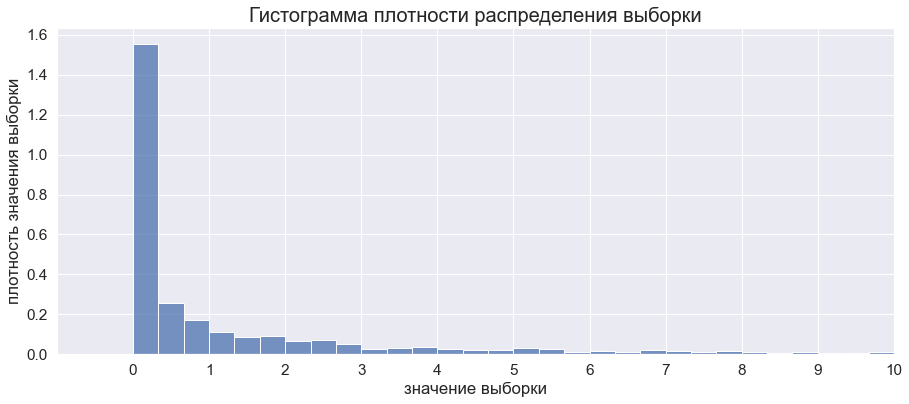

In [7]:
bins = [i / 3 for i in range(60)]

plt.figure(figsize=(15, 6))
sns.histplot(x=weibull_sample, stat='density', bins=bins)
plt.xlim(-1, 10)
plt.xticks(np.arange(0, 11))
plt.xlabel("значение выборки")
plt.ylabel("плотность значения выборки")
plt.title("Гистограмма плотности распределения выборки", fontsize=20)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [8]:
clean_sample = weibull_sample[weibull_sample > 0]
np.min(weibull_sample), np.min(clean_sample)

(0.0, 0.01)

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

clean_ecdf = ECDF(clean_sample)
pure_ecdf = ECDF(weibull_sample)
clean_x_hat = np.log(clean_sample)
clean_y_hat = np.log(-np.log(1 - clean_ecdf(clean_sample)))
pure_y_hat = np.log(-np.log(1 - pure_ecdf(weibull_sample)))
pure_y_hat = pure_y_hat[weibull_sample > 0]

C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\MUMTOZBEK\anaconda3\envs\mipt-stats\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

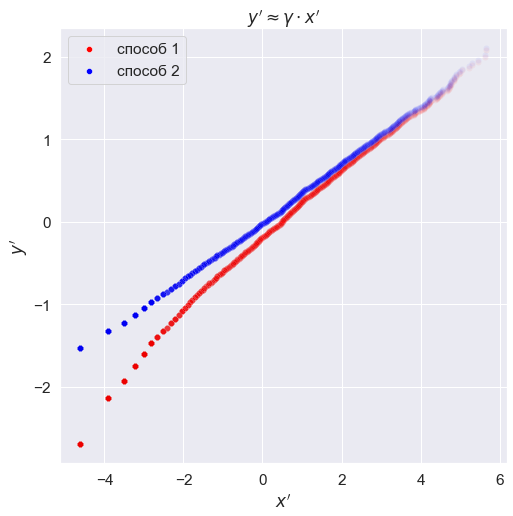

In [10]:
plt.figure(figsize=(8, 8))

sns.scatterplot(x=clean_x_hat, y=clean_y_hat, label='способ 1', color='red', alpha=0.05)
sns.scatterplot(x=clean_x_hat, y=pure_y_hat, label='способ 2', color='blue', alpha=0.05)
plt.xlabel("$x'$")
plt.ylabel("$y'$")
plt.title("$y' \\approx \\gamma \\cdot x'$")

legend = plt.legend()
for handle in legend.legendHandles:
    handle.set_alpha(1)

plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод** 

Из графика мы поняли, что гипотеза о том что это именно распределение Вейбулла верна. Раз так, плотность точки $x=0$ равна нулю, и потому в реальной функции распределения эти точки не учитываются. Значит они не должны учитываться и при построении `ecdf`. Поэтому перед тем как построить `ecdf` предварительно нужно удалить нули из выборки.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Чтобы найти плотность распределения, продифференцируем функцию распределения:
$$\begin{array}{l}
\frac{dF( x)}{dx} =\frac{d\left( 1-e^{-x^{\gamma }}\right)}{dx} =\gamma x^{\gamma -1} e^{-x^{\gamma }}\\
\rho ( x) =\begin{cases}
\gamma x^{\gamma -1} e^{-x^{\gamma }} & x > 0\\
0 & x \leqslant 0
\end{cases}.
\end{array}$$

Теперь, как и в первой задаче, выведем `MLE`:
$$
 \begin{array}{l}
f_{\gamma }( X_{1} ,\dotsc ,X_{n}) =\rho ( X_{1}) \cdot \dotsc \cdot \rho ( X_{n}) =\gamma ^{n} \cdot x_{1}^{\gamma -1} \cdot \dotsc \cdot x_{n}^{\gamma -1} \cdot e^{-x_{1}^{y} -\dotsc -x_{n}^{\gamma }}\\
L( \gamma ) =\ln f_{\gamma }( X_{1} ,\dotsc ,X_{n}) =n\ln \gamma +( \gamma -1)\sum _{i=1}^{n}\ln x_{i} -\sum _{i=1}^{n} x_{i}^{\gamma }\\
\hat{\gamma }( X_{1} ,\dotsc ,X_{n}) =\underset{\gamma }{\arg\max} f_{\gamma }( X_{1} ,\dotsc ,X_{n}) =\underset{\gamma }{\arg\max} L( \gamma ) =\\
=\underset{\gamma }{\arg\max}\left[ -\sum _{i=1}^{n}\ln\left( 1+( x_{i} -\theta )^{2}\right)\right] =\underset{\gamma }{\arg\max}\left[ n\ln \gamma +( \gamma -1)\sum _{i=1}^{n}\ln x_{i} -\sum _{i=1}^{n} x_{i}^{\gamma }\right]
\end{array}
$$

In [11]:
subsample_sizes = [1461, clean_sample.size]
grid = np.arange(10 ** (-2), 10 ** 2 + 0.001, 0.001)

param_hat = []

for sample_size in subsample_sizes:
    subsample = weibull_sample[:sample_size]
    subsample = subsample[subsample > 0]
    likelihood_func = np.zeros(shape=(subsample.size, grid.size))
    subsample_t = subsample.reshape((subsample.size, 1))
    likelihood_func += np.log(subsample_t) * (grid - 1)
    likelihood_func -= np.power(subsample_t, grid)
    likelihood_func += np.log(grid)
    likelihood_func = np.sum(likelihood_func, axis=0)
    param_hat.append(grid[np.argmax(likelihood_func)])

param_hat

[0.41799999999999965, 0.41199999999999964]

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [12]:
param_star = []
for sample_size in subsample_sizes:
    subsample = weibull_sample[:sample_size]
    subsample = subsample[subsample > 0]
    param_star.append(sps.weibull_min.fit(subsample, fscale=1, floc=0)[0])

for idx, sample_size in zip([0, 1], subsample_sizes):
    print(f"размер выборки = {sample_size}")
    print(f"вычисленный параметр: {param_hat[idx]}")
    print(f"параметр от scipy.stats: {param_star[idx]}")

размер выборки = 1461
вычисленный параметр: 0.41799999999999965
параметр от scipy.stats: 0.41806640624999947
размер выборки = 3145
вычисленный параметр: 0.41199999999999964
параметр от scipy.stats: 0.41191406249999946


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

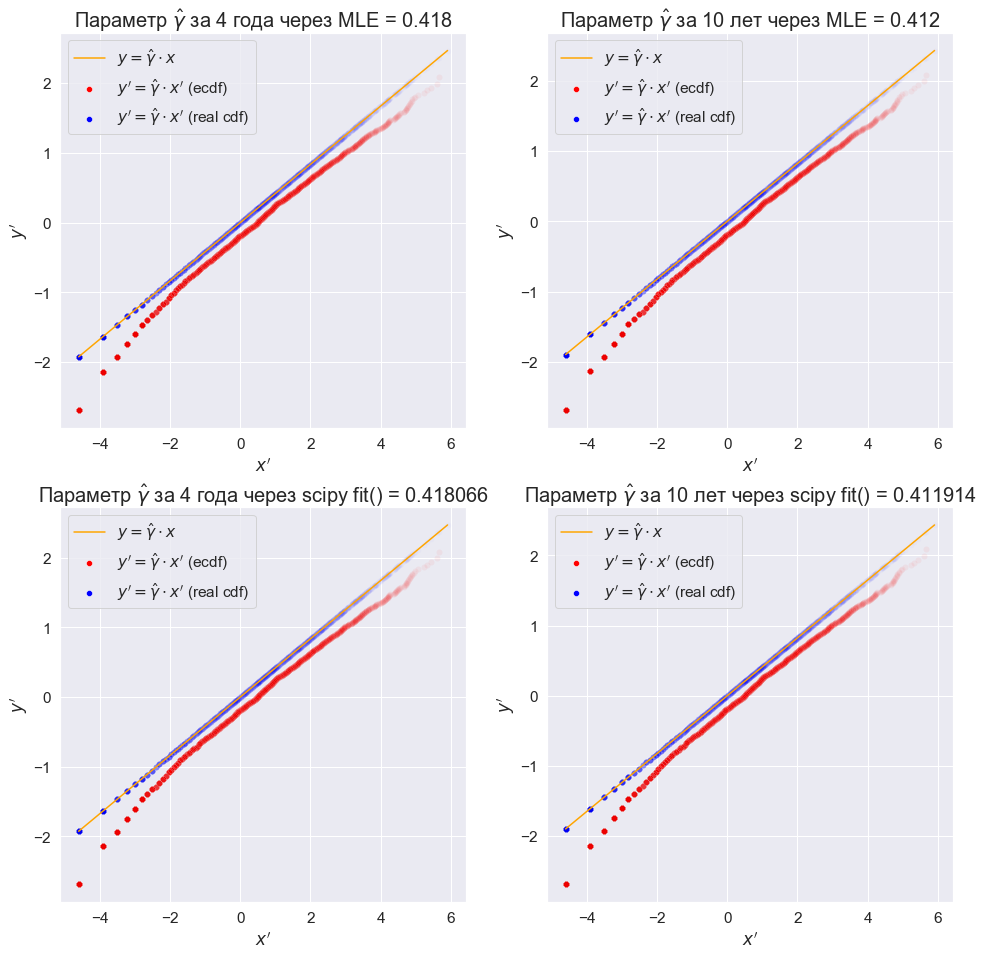

In [27]:
lower_bound = np.min(clean_x_hat)
upper_bound = np.max(clean_x_hat)
grid = np.linspace(lower_bound, upper_bound, 3)

params = [param_hat, param_star]
indices = np.transpose([np.repeat([0, 1], 2), np.tile([0, 1], 2)])
title_texts = [["за 4 года через MLE", "за 10 лет через MLE"], 
               ["за 4 года через scipy fit()", "за 10 лет через scipy fit()"]]

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
for i, j in indices:
    sns.scatterplot(ax=axes[i, j],
                    x=clean_x_hat, 
                    y=clean_y_hat, 
                    label='$y\' = \\hat\\gamma \\cdot x\'$ (ecdf)', 
                    color='red', 
                    alpha=0.05)
    sns.scatterplot(ax=axes[i, j],
                    x=clean_x_hat, 
                    y=np.log(-np.log(1 - sps.weibull_min(c=params[i][j]).cdf(clean_sample))), 
                    label='$y\' = \\hat\\gamma \\cdot x\'$ (real cdf)', 
                    color='blue', 
                    alpha=0.02)
    sns.lineplot(ax=axes[i, j],
                 x=grid, 
                 y=params[i][j] * grid, 
                 color='orange', 
                 label='$y = \\hat\\gamma \\cdot x$')
    legend = axes[i, j].legend()
    for handle in legend.legendHandles:
        handle.set_alpha(1)

    axes[i, j].set_ylabel("$y'$")
    axes[i, j].set_xlabel("$x'$")
    axes[i, j].set_title(f"Параметр $\\hat\\gamma$ {title_texts[i][j]} = {round(params[i][j], 6)}", fontsize=20)
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA9cAAAO7CAYAAABeQXcIAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOzdd3hU1dbA4d/0tElvhCSE0HvvRUDEysX6KViwV7AX9FqvvV9BvWIDsSB2RUE6AtJ7TYAQSAKk956ZOd8fm0QCCZn0tt7nyaOcmTnn7JPJrFn77L22TtM0DSGEEEIIIYQQQtSYvrFPQAghhBBCCCGEaO4kuRZCCCGEEEIIIWpJkmshhBBCCCGEEKKWJLkWQgghhBBCCCFqSZJrIYQQQgghhBCiliS5FkIIIYQQQgghakmSayGEEEIIIYQQopYkuRYtxty5c5k7d25jn4YQQgghkLgshGh9jI19AkLUhW+//Za3334bAFdXV6699tpGPiMhhBCi9ZK4LIRojXSapmmNfRJC1EZ8fDz/+te/ePLJJ3E4HLz++uv89ttvhIWFNfapCSGEEK2OxGUhRGslybVo1hwOBzfeeCPh4eG8+uqrADz++OOcOHGCefPmodfLzAchhBCioUhcFkK0ZpJcV9OsWbN4//33nXru4MGD+fLLL+v5jERz9Prrr/P5558zb948hgwZ0tinI+rA6Z8NDzzwAPfee2+lz33ppZfKPhtWrFhBaGhouX28+uqrXHnllec83k8//cSTTz7p1LlFR0c79bzastlsfPXVV3z33XckJCQQEBDAlVdeyZ133onJZKrRPp39W0lKSuKSSy5h+vTp3HzzzWc9npGRwX//+19WrlxJRkYGgYGBXHTRRUyfPh1XV9canZtoGiQui9qq6vOjPj7bRMOR+Ny043NKSgqzZs3ir7/+Ii0tDS8vL4YNG8YDDzzQLEe7yJzrGjr//PPp1q1bhY9lZ2czb968Bj4j0Vzs3r2bL774orFPQ9SjZcuWVRq8NU1j6dKldXaswYMHM3jw4DrbX2385z//YcGCBQwYMIBx48axfft2Zs6cSXR0NDNnzqz2/pz9W8nLy2P69Onk5uZW+viUKVM4cuQIQ4YM4bLLLmPHjh189tlnbN++na+++gqjUcJhcydxWdREVZ8fUPefbaLxSHxuWvE5JSWFa665hpMnTzJixAguueQSYmNj+f3331m7di0LFiwgIiKi2ufXmOTbRA2NHz++0p6rhIQECeKiQsXFxfz73//Gbrc39qmIehIQEMD+/ftJSEgo6/E+3Y4dO0hKSsLNzY38/PxaH2/w4MFMnz691vupre3bt7NgwQIuvPBC3nvvPXQ6HZqmMWPGDH755RdWrVrF2LFjnd6fs38rx48fZ/r06ezbt6/S5yxYsIAjR45w00038e9//xtQX6Iee+wxFi5cyMKFC7niiiucPjfRNElcFtXlzOdHXX+2icYj8bnpxedZs2Zx8uRJZsyYwS233FK2/bfffuOxxx7jtdde46OPPnL63JoCmfgiRAP66KOPiI2NZfjw4Y19KqKenH/++QAsX768wseXLFmC1Wpl4MCBDXla9e7rr78GYNq0aeh0OgB0Oh0PP/wwOp2O77//vlr7c+ZvZe7cuUycOJGoqCiGDh1a6fP27NkDwFVXXVW2TafTcc011wCwc+fOap2bEKL5c/bzo64/20Tjkfjc9OLz8uXL8fX1ZerUqeW2/+tf/yI8PJx169bhcDiqdX6NTZLrBnTw4EEee+wxzjvvPHr27En//v257rrrWLJkSbnnzZgxgy5dupCWlsZjjz3GwIEDGTx4MPfeey+HDh2q9X67dOnCX3/9ddZ+li9fXvb4metS5ubm8tZbbzF+/Hh69uzJqFGjeO6550hLS6tw/xX93HjjjTVqX0WWLl1Kjx49uOaaazh+/HiFz5k5cyZdunRhwYIFFT6uaRpz5szhoosuok+fPlx44YV88skn2Gy2s57r7DU+l6ioKD7++GPuuusuOnbs6PTroPJrWxogkpOTefbZZ8vO77zzzuPZZ58lOTn5rH1t27at0t9RRQGlNm3/6aefKnw/Adx444106dKF7Ozssm3OvM9Ovx7Ovoec3W913hOVGTp0KF5eXpUOLVu2bBnjxo1rUvP0xo0bd86/3S5dujBjxoxz7mPr1q34+PjQuXPnctuDgoKIiIhgy5YtTp+Ps38r8+bNo23btnz11VdMmjSp0ud5e3sDcOLEiXLbk5KSAPD19XX63ETLInG59cZlZz8/6uqzrarP2TMTvrr8/VZE4vPZJD5XrS7js91u56677mLatGkVFjo0m82UlJRQUlLi9Pk1BTIsvIHs3r2bG2+8EbPZzIQJE/D19eXYsWOsWLGC+++/n48++uisIRl33HEHKSkpXHXVVSQmJrJs2TI2b97MV199RdeuXWu8X4PBwIoVKzjvvPPKbf/jjz8qPPecnBymTJnCwYMHGTZsGBMmTCAhIYHvvvuOtWvX8u233xIYGMj48eNp27YtAEeOHGHRokXl5puUPlad9lXGz8+P4cOHs2bNGj799FOee+65co/Hx8fz6aef0qtXr7K7U2f64IMPmDVrFt26deP6669n+/btvPXWW2RlZfHoo4+WPa8m1/hMdrudp556inbt2nHXXXfx5ptvnvP5lbn22msJCAgo+3f79u2Ji4tj8uTJpKamMnz4cC6++GKio6NZsGABK1euZP78+eUKQpQGoilTppRLKiqaO1MXbXeWs++z0znzHqrOfp19T5yLyWRi7Nix/Pbbb6SmpuLv71/ueh4/fpynn36aH374oU6uW1246aabyMnJOedzKpvLCmqIWGJiIn369Knw8bZt2xIbG0t6enqViWx1/lZeeOEFhg8fjsFg4OjRo5U+76qrruL777/n1VdfxcvLi+7du7N7927eeustrFZruTvaovWQuNy647Iznx91+dkGKlm48847y23bvHkzmzdvLretvn6/NSXxufG05PhsMBjOumNdKiYmhiNHjhAeHo7FYjnneTU1klw3kPfeew+bzcZPP/1Ehw4dyrYvWrSIhx56iN9///2sQJCZmcmvv/5a9mZfsmQJ999/Py+//HJZJcOa7Ldfv36sXLmSF154oWx4SEFBAatXr6Zt27Zn9Ti/8847HDx4kGeffZbrr7++bPuKFSu49957efnll3nvvfcYP34848ePB1Rve+mHfGXzTZxpX2UGDBjABx98wJAhQ9i7d+9Zj7/00kuUlJTw3HPPVdgbVlhYyJw5c+jUqRMLFizAYrFgs9mYMGEC3377LY888kjZtanJNT7TZ599xoEDB/jmm28wm83nfO65TJ48+awP0alTp5KamspLL71U7gvLN998wwsvvMDTTz9dLnEunUd0xx13EBISUrb9559/LtdLDbVve+k1dGZIj7Pvs9M58x5ydr/VeU9UZcKECfzyyy+sWLGCa6+9tmz7n3/+iYeHByNHjqyz4L1582ZmzZpV6eOjRo2ib9++59xHRdU7qyMzMxMAq9Va4eOl23NycqoM3tX5Wxk1apRT59ezZ0/mzJnDww8/zJQpU8q2h4SEMH/+/Arn3omWT+Ly2VpTXHbm86MuP9sALBbLWdd+1qxZZyXX9fX7PZ3EZ4nPp29vrPhcEYfDwYsvvojD4eD//u//aryfxiLJdQO5+eabueqqq8oFAaCsdP2Zw18A7rnnnnJv9AsvvJABAwawefNmEhMTCQ4OrtF+x48fz2uvvcaePXvo3bs3ACtXriQ/P5/rr7+eTz75pOy5NpuNX375hU6dOpX74AM1d6V///4sW7aM3NxcPDw8qnNJnGrfuZjNZjp06EBMTEy57StWrGD16tVcd9119OrVq8LXuri48Pfff5Ofn1/WI6bX69Hr9RQWFmKz2cqGBdXkGp8uNjaW999/nylTptCvX79zPre6EhMT2bhxIwMHDjzrTsCUKVP46aef2LhxY7niHVlZWQB4eXlVuf/att3NzQ2gyl7Xmr7PqnoP+fv7V2u/zr4nqjJy5Ejc3NxYunRpueC9dOlSxo0bV6sOljNVdNfjdFartcrgXVuloyEqa1fp9qKionPup77+VtLS0njnnXdISUlh7NixtG/fnr1797J582aeffZZZs+ejaenZ50dTzQPEpfP1lrisrPq6rOtusesr9/v6SQ+S3w+fXtjxeczaZrGs88+y4YNG+jZs2eld7abMkmuG0hpD05KSgpRUVHExcURGxvLtm3bACqsuDdo0KCztvXu3Ztt27YRHR1NcHBwjfY7cuRILBYLK1asKAviixYtomvXrkRGRpZ7bmxsLPn5+djt9gp734qKirDb7URHRzNgwIDqXBKn2leVyMhI9uzZUxb0CwsLeeWVV/Dx8eHhhx8+52tdXFxwcXHhwIED/Pnnn2zfvp34+Hjuvvvuch/SNbnGpTRN49///jd+fn5Vnk9N7N+/H6DS4hv9+/dnz549REVFlSXXiYmJeHh44O7uXuX+a9N2oGzo18qVK7nnnnvKfbhrmlb2/zV9n1X1HsrJyanWfp19T1TFYrEwZswYli1bRk5ODlarlX379hEfH+/02pfOmjZtWq2rkc6dO9epYWeld0jO5OLiAlDpvKji4mKAc64nXZ9/K4888gjbt2/n3Xff5ZJLLinbPnfuXF599VWeeeaZs+66iJZP4vLZWkNcro66+Gyrrvr8/Z5O4rPEZ2j8+Hw6m83GM888w08//URYWBgffvhhnXZ2NBRJrhvIyZMnefHFF1m5ciWapqHX64mIiGDAgAFlCdKZgoKCztpWOj+k9A+tJvt1dXVl+PDhrFixgoceeojc3FzWrFlT4QdA6TDhI0eO8P7771favtK7odXhTPuqUvql4/DhwwQHBzN79mwSEhJ4+eWXnbozC3DgwIGyMv96vb7cnGao2TUu9fXXX7Nt2zY+/vhjp5LZ6ipdN7Cy4T6lc5UKCwvLtsXGxtKuXTun9l+btgO0a9eOCy+8kCVLlnDVVVcxatQocnNz2bZtG4cPHy57Xk3fZ1W9h2q636reE86YMGECixYtYtWqVfzrX/9iyZIluLu712qoVH2ZN29epQWISl1xxRWVBm8PDw/0en2l61iW/j1X9j6F+vtbSUxMZMOGDQwaNKhcYg3q7tf333/P0qVLa30XSDQ/Epdr1r6qNPW4XB118dlWXfX5+z2dxGeJz9C48fl0BQUFPPDAA/z1119EREQwZ86cCt9DzYEk1w1A0zTuvPNODh8+zF133cX48ePp1KkTLi4upKamVloCv7Cw8KyepNI/Ah8fnxrvF9SQm6effpr4+Hi2bt1KcXExl1xyyVnDV0r/iCZNmsQbb7xRm8tQ7fY54/Qg3q5dOz777DP69u1brQJFV155JZMmTSIhIYHp06fz4osv0rt3b3r37l2rawyUVS09s4BJqZtuuglQQ+ZqMu+z9PdTUVVw+CcollZLBrUsUWWFLU5X27aXeuuttwgLC2PhwoV8+eWX+Pv706tXL/Lz88uqN9f0fVbVe6im+z3Xe8JZ5513Hi4uLixbtqwseI8dO7ZJ9sKuXLmyVq83m82EhISQkJBQ4eMJCQn4+PiUex+eqb7+Vk6ePAlw1t2/Uh06dODw4cMkJSVJct2KSFyuWGuIy9VRF59tp3NmXnB9/n7PJPFZ4nNjxudSWVlZ3HHHHezatYvu3bvz6aef4ufnV+39NBWSXDeA6OhoDh48yIUXXshDDz1U7rHSeUmnD8EptWfPHkaPHl1u244dOzAajfTo0aPG+wUVxJ999llWrFjBunXr6NOnD6GhoWcF8fbt22M2m9m3bx+app0VGObOnUt+fj6TJ092OvA62z5nlAbxmJgYNmzYgM1m47nnnqsygMXHx7Ns2TLGjBlDZGQkBoOBdu3aceutt/LEE0+wefNmevfuXatrDKo3sbRq5+nWrl3Lrl27uOKKK2jbtm2N53uWFjfbunVrhY9v2bIFnU5XtlzCiRMniImJqfQD8nS1bXsps9nMY489xmOPPVZu+4033lgWvGv6PqvqPeTq6ur0fnNzc516TzjLzc2NkSNHsnbtWnbv3s3Ro0fPugYtyYABA/j111+JjY2lffv2ZduTkpI4duwYY8aMOefr6+tvpfROSWXVSo8dO4ZOp2vWgVxUn8TlirWGuFxdtf1sO50zyXV9/n7PJPFZ4nNjxmdQw//vuusudu3axeDBg/nf//7X7Du6ZZ3rBlDaE3ZmgY3MzMyy3rqK1umbNWtWuWEcS5YsYdOmTZx//vl4e3vXeL+g1nXt27cvP//8Mxs2bDhruGQpi8XCJZdcwuHDh5kzZ065xzZt2sQbb7zBjz/+6PRQr+q0zxnh4eEYDAb+/PNPVq9ezeTJk+nevXuVr0tISOD111/n7bffLheESyucln5A1OYag+phnT59+lk/pXeOr7jiCqZPn17j5DokJIQhQ4awb98+5s+fX+6x77//nu3btzNkyJCyeXI//vgjZrP5rOVeKlLbtldHTd9nVb2HqrNfZ98T1TFhwgQKCgp4+eWXcXNza5JDzurK5ZdfDsC7775bVn1W0zTeeecdNE0rVzimIvX1txIWFkaPHj3YvHnzWevIfv/990RFRTFy5EinP3NEyyBxuWKtIS5XV20/20oVFxc7dWe0Pn+/NSHxuflrqvEZVMX4HTt20K9fPz755JNmn1iD3LluEBEREfTu3ZutW7cyZcoU+vfvT0ZGBsuXL6e4uBhXV1cyMjLOel1cXByXX345Y8aMISkpieXLlxMUFFS2WHxN91tq/PjxvPHGG+j1ei6++OJKn/fEE0+wY8cOXn/99bJiK0lJSSxduhSj0cgrr7xS4bIaVamqfc4wm82EhoZy7Ngx/Pz8eOCBB5x6Xek6kMuXL+eqq65i6NChHDlyhFWrVhEQEMCECROA2l/jhvCf//yH66+/nueff56lS5fSpUsXDh48yN9//01gYCAvvvgioALd3LlzCQwM5KuvvjprP9nZ2RQVFTFr1iymTp3a4G2vyfvMmfeQs/t19j1RHePGjcNkMrFz504uu+wyp9dq/Pjjj/n5558rfOz666/noosuKvt3VUt9AFxyySVnVdWta8OHD+eSSy5h0aJFXHvttQwZMoQdO3awdetWLrzwwnI949nZ2XzxxRdYrdZaLzPijFdeeYUbb7yR6dOnl1ULj46OZu3atQQEBJy1Hq9o+SQuV0zi8tmq89lWkfnz53PgwAFSUlKcrrJcX7/fmpL4/A+Jz3UnJSWFr7/+GlAjXk5fFeF0d955Z7Na61qS6wag1+v58MMPeeedd/j777/Zt28fwcHBjB49mnvuuYe3336b5cuXExcXR3h4eNnr3nvvPb799lt+/PFHXF1dufzyy3nwwQfLJvjXdL+lSoP4wIEDz1k0wNfXl++++47Zs2ezbNkyvvzyS3x9fRk3bhz33ntvWcXJ6qqqfc6KjIzk2LFjPProo073mhkMBj788EP+97//sWzZMr766it8fX2ZNGkSDzzwQFkPfW2vcUOIiIjgxx9/5IMPPmD16tVs2bKFwMBAbrzxRu65556y4a6lBUNyc3PPWTzk/fff54orrsDT07NB216T95kz7yFn9+vse6I6rFYrw4YNY82aNVx44YVOvy42NpbY2NgKHzv//PPL/buqpT5ATR+o7+AN8MYbb9CxY0d+/vlnvvjiC0JCQrj//vu54447yg35y87O5v3336dt27YNklx37dq17G/k77//5q+//sLPz49rr72WadOmlRX+E62HxOWKSVyumLOfbRX5/vvvOXDgAJGRkTzxxBNOHa++fr81JfH5HxKf686uXbvKqpj/+OOPlT5v6tSpzSq51ml1OTFF1IkZM2bw888/88svv5TNqW1J6rp9kydPZufOnWzbtq1s3UZxti5dulS5LMRPP/3Ek08+WeOiFA2lpf+NCCGalpb+mSNxWdSVlv63IkRVZM61aNY0TSMqKor27dtLABdCCCEamcRlIURrJsm1aNaOHj1Kfn6+9I4KIYQQTYDEZSFEaybJtWjWDhw4AOBUJdLWbtq0aRUupXC6bt26MW3atBpXLxdCCNG6SVwWQrRmMudaCCGEEEIIIYSoJblzLYQQQgghhBBC1JIk10IIIYQQQgghRC21ynWuMzLycDia5mh4Pz8P0tJyG/s0mhy5LhWT61IxuS6Vk2tTsZpeF71eh4+Pez2cUesjsbn5ketSMbkuFZPrUjm5NhVrjrG5VSbXDofWZAM40KTPrTHJdamYXJeKyXWpnFybisl1aVwSm5snuS4Vk+tSMbkulZNrU7Hmdl1kWLgQQgghhBBCCFFLklwLIYQQQgghhBC1JMm1EEIIIYQQQghRS5JcCyGEEEIIIYQQtdQqC5pVpaAgj9zcTOx2W4MfOzlZj8PhaPDjNnVyXSpWk+ui1xswGs1Yrd6YTOZ6OjMhhKhbEpubHrkuFavJdTEYjHh4eOPqKqsPCNGcSXJ9hoKCPHJyMvD2DsBkMqPT6Rr0+EajHptNAtWZ5LpUrLrXRdM0HA47RUUFZGQkY7X6SCAXQjR5EpubJrkuFatJbC4pKSYzMwVA4rIQzZgMCz9Dbm4m3t4BmM2WBg/eQtQ3nU6HwWDEzc2Kt7c/eXlZjX1KQghRJYnNoiXT6XSYzRa8vQPIzc1s7NMRQtSCJNdnsNttMlRWtAomkwWbraSxT0MIIaoksVm0BiaTuVGmPQgh6o4k1xWQXnHRGsj7XAjRnMhnlmjp5D0uRPMnybUQQgghhBBCCFFLklwLIYQQQgghhBC1JMm1EEIIIYQQQghRS5JcCyGEaHU0DRwO9V8hhBBCNL6WEJsluRb14tFH7+eSS84nMzOzsU9FCCHKsdvBkZuA3Q42m/q3EK2BxGYhRFNlt2loufHNPjZLci3q3KpVy0lNTeXiiy/lww/fa+zTEUKIMprdhjXqEYI3dseYuwdo/r3kQjhDYrMQoqnS7MVYox4kaGMPjHlRQPONzZJcizqVn5/HRx+9z7PP/oe7757OwYPR7Ny5vbFPSwgh0JVk4LXzKtxPfEJu2P3Y3HuUPdYcA7gQzpLYLIRoqnTFqXhvn4T7yTnkhD+Mza1z2WPNMTYbG/sERMvi5ubOggW/lP177txvGu9khBDiFEPeITx3/h+GgngyuvyPgjbXl3tclpcVLZnEZiFEU2TI2YfXzuvQFyeS0e0TCoKuLfd4c4zNklwLIYRo0UxpK/DcfTPoTGQO/J0i61Bw/PO4Xt88A7gQQgjRXJmT/8C69w40gweZA/+kyGNAi4jNMiy8Bbvzzpt56qnHztr+1VdzufTS88nOzq7T4z388DSuuuoyoqOjym3Pzc3lsssuYO7cT6u1v6ioA4wcOZDFi38v25afn8fUqZO5997bKS4urpPzFkK0UJqGS9xHeO24GodLGBlDVmPzHorBAEYj5f4rREOR2CyEaNU0Dbcjb+K1azJ2985kDvkLm9eAFhObJbluwXr27EVU1P5y29LSUpk3bw633XY3np6e5R7TNA2bzVblj1bJBIipU2/HbrezcOEv5bbPmfMxLi4uTJ58Y7XOv2vXbowePZYvvvgMu92OzWbj6adnUFJSzGuvvY3ZbK7W/oQQrYOmgcNWgseBB7FGP06x/0VkDFqKwzW87Dk6XfPtFRfNm8RmIURrpGngKCnAuudW3GNepDD4GjIHLsbh0qbsOS0hNsuw8BasR4/efPfdfFJTU/H39wdg9uwPCA4OZtKkK896/uLFv/PKKy9Uud+ZMz+if/+BZ23v06cvo0aNITY2pmxbXNxRfvzxO5599iUsFku123D77Xdx881T+PPPRezatZNDh6L56KPP8fT0qva+hBAtm6ap5Tt0xWn47r8JS+Zacts9QkGnZ0AnfcmiaZDYLIRoTcpic+EJ/PZOxpS7k5zI5ymMfKh5Z9GVkOTaCZYT3+By4qsGOZZOd3ZlvMKQGygKmVLtffXs2QuAqKh9jBx5HgcO7GPx4t955533MVQw1mLEiFF8+um8KvcbHt6u0sfatWvH6tUryv49c+Y79OzZm3Hjxp/13FWrlvPMMzMq/UIAEBnZkXHjLuDNN18FYNas2bRtG1rlOQohWhe7Xf3osqPwP/B/GItOlhVHMQItL3wLic3lSWwWQjQ1pbFZn7GFgANT0DvySO/5LUX+F7fY2CzJdQsWFBRMQEAg+/fvY8SI0bz33tuMHDmaQYOGVPh8T08v3N09qtxvRcG/VHh4BBkZ6WRnZ7Fv3142b97IZ59V/OXHbLbg6+uHyWQ65/HCwsIpLCxkypSb6NatxzmfK4RofTRNrYdpSVuC74Fb0fSuJPb6A4fPYHSnHm+BneOimZLYLIRoDUpjs2vit/gcnI7N3IbEHr+ieXVv0bFZkmsnFIVMqVHvdE0YjXpsNkfVT3RSjx5qbteSJYuIjj7Al19+V+lzazv0DFSwBYiJOcysWe8wceLldOrUucLnjhgxit9+W3LOY61YsZR58z6ne/ceLFmyiNtuuxOLxaXKcxRCtB6aQ8M9/gM8Y56m2L0XKd3mY7eEYjgVuFti8BYSm88ksVkI0ZRoDjvWmBewxv+XQs9RpHSdh8Pk1+JjsyTXLVyPHr344ovPOHIkhmuumUxoaFilz62LoWdBQcGYzRZmzXqX9PR07rjj3hqdN8CuXTt4+eXnufvu6VxwwQVcc83l/PTTD0yefEON9ymEaGEcRXhGPYzriS8p8J9EWuePsOvcgZZRGEW0TBKbhRAtmc6Wjfee27CkLiEv5DbS27+BAzUapqXHZkmuW7iePXuRm5uD2Wxm6tRbz/lcLy9vvLy8a3U8vV5PWFgYBw9Gcf/9j+DtXbP9HTt2lBkzHuHSSycxefINGI16Lr74Mr7++gsmTboSNze3Wp2nEKL50jT1oy9JxXv39ZgyN5Ab8QTZ7Z5Er9OjO9UrbjS23OAtmjeJzUKIlqY0NhsLjuC16zoM+YfI6vw2eSF3YAD0rSQ2S/nUFs7b2weAO++8x6k5W3UhJCSU0NAwrrzymhq9Pj09jUcfvZ9evXrz4IOPlm2/6abbyMvL5Ycfvq2rUxVCNDN2+6mqo1n78Nk0BmP2DrJ7zaGg078xmvQYDGAyqZ+WHLxF8yaxWQjRkpTGZkPqX/hsHou+KIms/r9Q3O6OsjWrW0tsljvXLdzcuZ/QpUs3LrnkXw12zOTkJAYMGITRWLO3l6+vH99//9tZ24ODg1m1akNtT08I0UyVFS5LXYTPgdvRDFZS+/6J5tsfHS17DpdoWSQ2CyFaitLY7Hb8E7wOPY7NrSPpvRags0a2ytgsyXULVFRUSEzMYdavX8eKFcv46KPP0esbZpCCzWYjNvYIEydOapDjCSFaD82h4RH3X6xHnqfE2pf0nvNxWELKiqMI0ZRJbBZCtESavQSvg4/jfuIzCn0vJKP7Z2hGz1YbmyW5boG2bdvKE088RHBwG55++gW6du3eYMeOiztKcXERHTt2abBjCiFaNk0DzVaIZ9T9uCZ+S37gVWR2+RAMrkDrDN6i+ZHYLIRoSTQNKErDZ8+NmDPXkRP2IDmRz4FOLQvYWmOzJNct0PDhI1m7dkujHDsysiPr1m1tlGMLIVoeux0oSMJ33xTM2VvIjvg3ue0eL4vaLbniqGhZJDYLIVoKux302fvx3XsdhqKTpHf9mMLg68oeb82xWZJrIYQQTU7pHC591m58916HviSd9B5fUhgwCYPqFG9187iEEEKIxlQam01Ji/CJuh3N4E5qv0WUeA6S2HyKVAsXQgjRpJRWHTUm/ob/jgmgaaT2W0JhwD/zRVtzr7gQQgjR0Ox2sJVouB55G999k7G5diKl/2pKPAeVPUdis9y5FkII0YRoGjjsGh7H3sTz6EsUeQwkudt89G5BlMbr1h64hRBCiIakaeAoKcA7ehpuyd+T538VaR0/xGBxldh8BkmuhRBCNBmarQDvA/fhlvwD+UHXktZxFg5c0J2qOiq94kIIIUTD0hWcwH/3FMw528lu/yxZbR9B03RoEpvPIsm1EEKIJkFfeBLvXZMxZu8gu/3z5IY/hEGnQ6+BwSDBWwghhGhoxqyteO6cgs6WQ3rP+RT6X4oBJDZXQpJrIYQQjUbT1I8pZzteuyajt2WT2esbCvwuLXuOwUBZoRQhhBBC1K/S2OyS9B2e++/DYQ4mfeDPFLv1KHtOtWOzzXaqUqkejC03BW25LRNCCNGk2e0qzrok/4R31D1o5gAyBi3Dbu2J8VRgb+1VR4UQQoiGZLeDw+7AGvsfrHHvUOw9guw+X6KZ/WsemwsK0NltZf/UDEZwda37k28CJLkWQgjRoEqX8rDbHHgeew3rsdco8hxKRs+v0bsFoKOWSXUr6R0XQggh6kppbHYU5eAbdTsuaYvJa3MLWZ3exGgy1zw222zlEmsAnd2GZrO1yBjd8lokhBCiybLZVK84tnx8ou/GPe0X8oOvJ7Pzf0FvKStcVmOtqHdcCCGEqAulsVmfH4v//usw5R8ks+Ob5Le9E3T/FC6rEYejetubOUmuhRBCNAibDYqLwVB0nIADkzHn7SI94mUKwqeh06uoXavEupX1jjclubm5zJw5k+XLl5ORkUH79u257777OP/88xv71IQQQpxDaWy2ZK0lIOpG0Bwk9/gZm/+Ysphcq9is11dvezPXMlslhBCiSbHboagITFlbCN41BlNhDIldviM7ZDraqVUya11xtJX1jjclTz75JKtXr+all17il19+YcKECUybNo0NGzY09qkJIYSoRGlsdj/xGUH7JuEw+XO850oKvMagaeo5tY7NRqMaRXYazWBssZ3eza5V0jsuhBDNh8MBBQVQUgIeqd8RdPQ+7OY2JPb8jRK3bhhOTYuuk6U8WlnveFORkpLC0qVLmT17NsOHDwfg7rvvZsOGDfzwww8MGzaskc9QCCHE6ex2FZvtJSX4xz2Bd/Kn5HlNIK3rZ2hGr7qNzTYbGAxopQtit/B6KM3uG4f0jjdPjz56P5dccj6ZmZmNfSpCiAZSXAw5OZCd5cAz9j+0ib2dArdBxHZeRZFLN0DFV4OhjiqCt7Le8abC1dWVTz75hIEDB5bbrtPpyMrKaqSzEs6Q2CxE61NQANnZkJ+RRtCBK/BO/pT0oPuJa78Au94LqMPYXFCArrAAXXEROluJyupbeExuVsl1ae/4U089xfDhw2nXrh133303gwcP5ocffmjs0xOVWLVqOampqVx88aV8+OF7jX06QogGYLNBfj4U5+XSLu4GglLfItX7Zo5F/gIWP3Q6MJvrIca6uqK5uKKZLWgurlLMrAF4eHgwevRoPDw8yrbt3LmTjRs3MmbMmMY7MXFOEpuFaH1KSiAvD3TZUXSMGYt7/kaOtfkfKaEvYTQZ6jY2V1IHBZutkhe0DM2q66C0d7x///7ltkvveO2sXr2CZcv+5OWX36zzfefn5/HRR+/z6qtvERbWjjvumMrOndvp27d/1S+uofpsjxCiaoWF6o61IyeOyPjrcC3eT0LQ66T7343JqMNgABcX1Step05fgstsruOdC2fFxMQwbdo0+vTpw7XXXuv06/z8PCp9LDlZj9HYuPcDGvr4K1euYOnSxbz22lt1vu+8vDxmz36f119/h/Dwdtx6643s2bODfv0GVHtfzl6X+mxPU1TT94terycgwFrHZ9N0tOS21VZ9XhtN++eOtW/B7wTETMGhdyO1z1+YfYbi6QImk+qPrrPYXFwMRRWkmhZLtWJ0c3vPNKvkurR3/HSlveNPP/10I51V87du3RrCwtrVy77d3NxZsOCXsn/PnftNvRzndM60x263c999d3DffQ/Qq1efOj8Hm83GmDFDeeqp57jkkokAREXt56WXnuf48XiGDh1BUlIiTzzxNF26dK3z4wvRWPLyIDMTXHI30fH4FPRaMQeCfiDPczxmVNC2WOohsZYluJqELVu2MG3aNEJCQpg9ezYmk8np16al5eJwaBU+5nA4sNkarzCd0ahv8OOvWbOa0NDwejmuxeLKt9/+UvbvOXNUbK7usapzXZxpT0uJzbV5vzgcDlJScmp87KYsIMDaYttWW/V5bex2yM2FrEyNgNT/Epb+PHnmPkQHzceR1xZzSQ5Wq4rNBQW1ONDpHdxGo7pzXXj2DjUXGxiLnNplTa+LXq87Z4dtfWpWyfWZpHe8buzatYP33vuw0dtdFWfPz5n2zJ8/j+DgYPr161dXp3cGdWy9Xld2HnPmfILBoOfrr7/H3d2dI0cO88orzzN37tfV+gJ6ptr83lpyD3lLbVddqI9ro2nqbnVeHgTnf0Fg/J3YzOHEd1yIm1dXvM0q1/XwUL3jdcpmA5cKtru6Vmtsm7xnaue3337jqaeeYvDgwcycObPcMHFRfbt27eCdd95v7NOoM86059tvvyIoKKheEuvKfP75J+j1OubNW3AqNsfw8svP8dlnX9UqNgvRFDgcKjZnpRcSnjidwLwFJLtcyWH/DzG5uGE2g7u7+qlV7c9KOrg1g/Hs7S18znWzbZ30jlftzjtvxt8/gFdeKT88+quv5jJ//pfMn/8zeXm5BAYGERISWuftfvjhaRw7dpRXXnmrXA9wbm4u1113BVdffS0333y7U/syGvXs3buP22+/kX//+3kuvvgyQA07v+ee23F3d+e///2QtLTUKtuTm5vL3LmfMXPm7Hr7XZfu1+HQyv4/JyeHTp26EBISCkC/foMwGIz8/vtCJk68vEbHqe37paX2kEvveOXq49qUVh1NS7XTJul5grPfI8NyHgcDvsBo88Wco3rFDQZ1V7vOFRejKz67F1wzFzs99Kw59o43JQsXLuTxxx9n4sSJvPLKK5KUnEN1YnNYWHidH78uYzNAVNQBp2PzudqTm5vLvHmfM3Pm7Jo3rgZyc3Po3Llr2bn5+vphNJr4888/ahybhWgK7HZV+yQ/LZEuCZOxFm/jqOfTHPd+DLNFh8UCXl6qH7pWhcsqmVut2WwqwT7zjnYL17RvVVbit99+45ZbbqFHjx58+eWXeHt7N/YpNUk9e/YiKmp/uW1paanMmzeH2267G09PT3bs2MZll02q8PWapmGz2ar80bSKOyqmTr0du93OwoW/lNs+Z87HuLi4MHnyjdVqT9eu3Rg9eixffPEZdrsdm83G00/PoKSkmNdeexuz2XzO9pT69dcf8fHxK/elori4mA8/fI/LL7+Y8eNHcvvtN7F27eqyxwsKCpg58+2yx++++1Z27dpZ9nhychIzZjzMBReM5sorL2XlymXljnn11RPZvXsnf/75ByNHDmT79q0AjBs3nm++mVet6yBEU6Jpp6ZV5WbT8cRk2ma/x3H329nj9xMlel80TfWIu7jU4YpYNps6aGlRFFmCq1ElJibyzDPPMGTIEB577DEyMzNJSUkhJSVFqlBXQGJzxSQ2C1F3SmOzLmM73Y6dh1tJFHt9v+aY9XE0dOj1aiSZxVKLxLo0FhcXV/y449TNH6OxniqYNk3NrpXNqXdcj4b7iTj0SYk4goPJaxOOg7pYb8Y5PXr05rvv5pOamoq/vz8As2d/QHBwMJMmXQlAXNyxSnuoFy/+nVdeeaHK48yc+RH9+w88a3ufPn0ZNWoMsbExZdvi4o7y44/f8eyzL2GxWKrdpttvv4ubb57C0qWL2bNnF4cORfPRR5/j6elVZXtKrV37FyNGjCy37aWXnuPYsaM888x/CAoKZtOm9Tz33FPMmPEMEyZczHPPPUlsbCxPPPE0YWHhLFjwDY8+Op2vv/4BX18/HnlkOm5u7syaNZuSkmLeeuvVcvv/5JN5PP74g7RpE8IDDzxSdr7Dh4/io4/e5+jRWCIi2lf7egjRmDTtVH6bG0v7Q9dhLjxIrN/bnPC4A7NB3an29VUBvE6W2gIZetYELV26lIKCAjZu3MioUaPKPda/f3/mz5/fSGdWMYnNEptLSWwWLVFpbLYk/kBAzL2UGAPZF7yMHGNPLAY1NcvXV3V81zg2nx6LbTYosYHrGfOzWmkHd7P65lFR73gpk8nUpO5g69HwWvknxltuVuMlXV0xzplL1riLGiyI9+zZC4CoqH2MHHkeBw7sY/Hi33nnnfcxnKomdPfd0yp9/YgRo/j006p7bsPDKy8e1q5dO1avXlH275kz36Fnz96MGzf+rOeuWrWcZ56ZUekXAoDIyI6MG3cBb7/9GgCzZs2mbdvQssfP1R5Qw6APHNhXbqhXQkI8K1cu49NP59G1a3cAQkOv5ejRo3zzzZd07dqN9evX8eab/2XYsBEAPPjgo1gsFnJycoiNPUJs7BG++eYHwsMjAHjyyWe5/fabyo7h4+OD0WjEYrHg5+d/2vWJwGQysW/fHgngolmx2dSQM1PG3wQduB40B7HtfybDPAazQwVvLy+VWNfJwRwOcDhk6FkTdNNNN3HTTTdV/cQmQGKzIrFZkdgsWhKHQ91E1hwOvI69hFfCW+R7DCe+3ZdoBOBqVzeQPT1rWe/zzGHgRiPYS1SsPhV7W3MHd7NqdXPqHXc/EfdP8AYoKMB4y824b9hMTkj9VOY+U1BQMAEBgezfv48RI0bz3ntvM3LkaAYNGuLU6z09vXB3r/qbseEcZX/DwyPIyEgnOzuLffv2snnzRj777KsKn2s2W/D19atyNEJYWDiFhYVMmXIT3br1qPL8TpeVlYXdbsfHx7ds28GD0QBMn35XuefaTg05jYk5DECPHr3KHjMYDEyb9iAAmzZtwM3NvSx4A3Tp0s2pURUGgwGr1ZP09LRqtUOIxlRcrJbb8kyZh3/sQ5RYIkjosAC7W0c8HKrXvHS4Wa2d3jteXAx2x9m946cPPRPiHCQ2KxKbz01is2huiorUx5q9MIe2cXdizfqDLP+pJIa9jd5oxvXULBF391quVGmzqS8ApyXSAFhc0fQGta2Vd3A3q5Y3q97xpMSz69kXFKBPToIGCuCggk5U1H6WLFlEdPQBvvzyO6dfW9uhZ0BZgZCYmMPMmvUOEydeTqdOnSt87ogRo/jttyXnPNaKFUuZN+9zunXrzpIli7jttjuxWCoqE1wx3anxLw7HP0XANE39/6xZs/HwOLta8NGjR6rc75lz23Q6HUYnP1gcDjv6Vjp0RjQvmqaKo+Tl2gg+8TR+qR+S5zmOlM5z0Zm8Mev/ial1ElfP7B3X69EVF6s71KcfQP5+hJMkNisSm6smsVk0F0VFav1qXd5RIuKuw6UoisS2r5Mbcjdmo5pfXSexubSz22ZDV1iIZjKA5bRb4K1oXvW5yBWoJ47gYDXm4vQg7uqKIzCoQc+jR49efPHFZxw5EsM110wmNDTM6dfWxdCzoKBgzGYLs2a9S3p6Onfcca/Txz/Trl07ePnl57n77umMHTueyZOv4KeffmDy5Buc3oe3tzcmk4nMzPSybZGRHQFITU0pG3oGMG/e52RlZXH55VcBcODAfoYMGQaoLwBTplzFDTdMpXPnLhQU5BMTc5gOHdS+YmOPUODEYoF2u52cnJxyw9GEaIpsNrVOZm5GFu1P3IJ3/nJSfO8mNfwVXExGjEY1FFyvr6P51RX1jhuNKpif/gW8FQ89E9UnsVmR2HxuEptFc1FQABkZYMpYR8fEG9FhJybsJ4r9xmE5lVDXKDZXtGZ1aWe30ajqnJTY0Ay2sn9LLFbkKtSTvDbhGOfMLTevyzZnLnkhdb+sxrn07NmL3NwczGYzU6feWq3Xenl54+XlXavj6/V6wsLCOHgwivvvf6TG8+KPHo1lxoxHuPTSSWUB++KLL+Prr79g0qQrcXNzc3pf3br1ICoqisvUiiG0bx/JyJGjefvt19E0jcjIjqxfv47PPpvN/fc/TFhYOGPGjOPdd9/k0UdnEBQUzIIF35CVlcXgwcPw9w+ge/eevPzyczz88AyMRgNvv/26Uz3ehw4dxG6307Nn7xpdFyEaQlERZGVBSUYMXU5ei0vJEWL83iPD7xZcNRV/jUZVwKxOnKt33OKKZjz1TaGVDz0T1SexWZHYfG4Sm0VzkJcH6engnTqHiNRHKDS2JyroW+wunXA9LS92OjaXJtRFReUScc1QwU5cXdBsNhWPXVwkFp9GrkQ9caAja9xFuG/YjD45CUdgEHkhDVuRFMDb2weAO++8x6k5WvUhJCSUoqIirrzymhq9Pj09jYcemk6vXr158MFHy7bfdNNtLF78Oz/88C033eT8l5NRo8awcOHP5ba98MIrfPzx/3j77dfJzs6iTZsQHnzwMa644mpAFUH54IP3eP75pygqKqJLl268++77BJ662/Hmm//l3Xff5OGHp+Hi4sLUqbdy4kRCleeyffsWIiM7VOuuhRANRdPU3erMTDCl/0WPlBvR0LM38DfyPUZiPtUTXqu4WpPecRfnh5sKcTqJzf+Q2Fw5ic2iKdM0yMmB9DQbbZNmEJLzMWmW8UT5fY7erKZoWSzVjM3n6NTW2W1oFd32Nholsa6ATqtsIcQWLC0tF4ej4mYnJh4jOLjh5l2dyWjUY7M5qn6ik1588RmOHj3KJ5980Whzh2677Ua6du3GY489VeN91OV1yc7O5pprJvLWWzPp1atPneyzpm644Rquu+6GKtf/rExtr0tjv9/rS0CAlZSUnMY+jSbJ2Wtjt6tR2RkZ4Jn0Ge3THyPf2JGdngtwuLXHYlGja729a1F1tKJltQwGdMVF5Z/XAL3jNX3P6PU6/PwaJzlqaSQ2NyyJzZVrzNjc2O/1+iSxuXLVjc1ZKem0i78Z78LVxLlPI9brRSwuBszmf1bqcPqjxWZDl5ujOrptdnQOOwDaaTFXM1vAbq9wKcz61Bxjs3Q1tEBFRYXExBxm/fp1rFixjI8++rzRgrfNZiM29ggTJ9YsQNUHT09Ppky5iQULvm7UAL5hw99omsZFF13aaOcgREU0TQXwkmIboYkzCMj4mDSXCez1/BzN6InZWMvE2maD4mKVRJ+WLEvvuGjJJDafm8RmIc6tNDaTHU3XY9diKk7goO//OOl6fdlMKS8vVRG8Ook1GRnoigvBYDw1mqwEzK7l6pug14PZLEteOkHKILZA27Zt5a67bmHJkkU8/fQL5QqBNLS4uKMUFxfRsWOXRjuHilx//VSSkpLYtWtnoxzfbrcze/YHPP30C05XLhWiITgcUFICjqIM2h66ioCMjznpPZ3ooAWY3DyxWFRS7edXw8Q6Jwdddha63Fx0hYVQdEZxIb1e9YafRgqliJZAYnPVJDYLUbHS2GxKWUL4gXHo7TlEh/1Bhs/1uLio/md/f7BaqzHHuqAAXW4O+qJCdTu86FSHt0OnkuxTGXq5GGw0SlXwKsiw8DM09nCcuh561lLIdamYDAuvmAw9q9y5rk1BgYqtlqJDBEf/H6biOBLD3yPR7QbsdhVn3d3B07MGcdVmg6ws9IX5Z/WOlxt65uJaNve6IXvHm+PQs5ZGYnPzI9elYjIsvGISmytX2bVxOFThspJiDb/UWfjFPUORWy8SIueTT1hZmLRa1VBwp9ls6AoLIL9A/ddepJJqFxcwGHFYzOBubfQ71M0xNku3gxBCCDIzIS0NfItXEnLiZtAbie/8O3bfYXidqghusaifai+1VVCArqgQXV4ulBSD0aR2VGj7J4mmgt5xIYQQopUqLlbVwLMyCumc8QD+efPJ8rqCpPYfYnJ1x0NTQ8VdXNTN5GrvPCsbna1YxWF0oNOhGY1gcQEPq8ThGpKrJoQQrZjDAcnJkJSoEVowm465T1Jg6kpc+28xe7fDYlLxtcbrV5dW/y4uAYft1IQxwGgAFxc0vUHdrZZhZkIIIQSghoAnJkJuSiJ9sq/H27aFo9anyAx5AqtFh6k2sbmgAF1ONrrsrFNDv3Vg1KtM3WBEs0iNk9qQKyeEEK1UcbG6Y33yeAmdsx8jwvY5SaZLOOD9CVadFaMDTKZqFEapiMMBObnoivJVgm0vAZtd3bkGNFdXqMZauEIIIURLVboEZmoqFCXuYHDuZExkssPjS9LdJuF5arBXjWOzzaZqnuTng61YdXibLODijma2oLm513sF8JZOkmshhGiFHA4VwLNT0hiQfRN+trVE6R/mkOVZXNBTUqLy31oXM87JQpeZoXZks4FODwYDmtGA5u6hJooJIYQQrVxph3dmJnhm/Ej/3Hspwp+VxqUU0htXh0q+axWbi4vVHevCfNXRrQPsNjSLWQ0Fr/b4cnEmSa6FEKKVsdvV/OrC5Cj6Jv8fZvtJNhs+5qTLdZjUUtM1rwZ+upwc9Nk55XvHDQY0dzc0Tx+5Yy2EEEKgipYlJkJ2loPQjJfpVPQmqbqhbDB+jc0YgNmg8t5ax+asDMjOVGPJ7fZT2boqLy4rc9QNuYJCCNGK5OXByZOgT1xK74xbsetcWO/2B+m6wZjNKmgHBanltmrFZkOXlQH5ueV6x/HwADd36R0XQgghUHesbTYozM2lR8ZdBBYt5JjxRvZY3sFkseBiUIO8AgLUah01lpWBPisLCgoBDcwWMBnBYkFzs8pw8DoiybUQQrQCpfO48nI1rCfep0PW02QberLFdT4OlzA8TariaHBwNZfzqEx6GrrsbFWV5fTecYcDzSTFy4QQQojSKVou9qP0SZqIu20/+11eJcZ4L0aTDjc3lVD7+tYy983JQX8iEfJyoaQQNB3ojeDujubhKSPJ6pB8uxFCiBaupEQF76yMYjqm345P1uckmv7FPs/Z6IzuuJpVXA0MVAl2reXkoM/JhqJCdXC9QfWOG/Q4PNxlnrUQQohWr6QEcnKA5PW0PXEDmqOE7Z4/kOk6HqtBJdN+fipk1qr+ic2GLj0Vck91eOtNaiSZXgcmE5qnp3R41yG5kkII0YIVFqqh4EVZqXROuAGvovXEuj9OlOkpjHo9JoNKrH196yixttnQpaZAfh4UFQAG0Bzg5qp6x3386uAgQgghRPNVGptdT3xBWOLDlFjas9NrPvmGTpiNKqH286urDu8sdGnpkJMLmg3MLmpIuIsLDk8v6fCuY5JcCyFEC1VcrIK3PnsfXY9dh9GeRHz4fGKLL8VFpzqqrdY6GG52upMnVXJdUgJ2B+BQ2bvZgubjK73jQgghWi1Ng6IiyM2xERD/FP5pH5HpOo6M7j9gzDXiCbi7q7onBkMdHNBmQ5eSpO5aFxequGyzga8/mpcX+EqHd12TbzlCCNHCaBoUFKjhZu6ZiwlPuA27zoP9bRbjGjwGa0YOBoOax1Xr4Wany8pAn5JcvnfcoEqcSu+4EEKI1qy4WE3RKsrJICLhZjzzV5HodR9x/i8SaPHBWJiDq6uqe1IniTVA0gl06RmnlsLUgUGnpmq5uKH5+kuHdz2oq69UQpzTo4/ezyWXnE9mZmZjn4oQLVpJiVrOIz5Owz3uv0TEXUeBqRMHwldT5DEAi+WfqqNeXnWYWNts6BKP/9M7XlisKoWbTGhWq/SOC9EESWwWomHk5MCxY5Bx7CAdY8bhkb+Ow/4fEB/4KnqDEaNRjSBzcwOTqRYHstkgP1/9JJ1An5IK+QVgO1X/xM0NPL1w+PlKh3c9keRa1LtVq5aTmprKxRdfyocfvtfYpyNEi1VUpBLrpBOFRCTdTfvMZ0myXMHugMXo3ENwcwMfH/VTJ/O4Tpd0Al1qBhQXle8dN5rQvHykd1yIJkZisxD1T9MgO1stgWlKXcaA1PMxOLLYbP2dEy43Yj5VUNTbW3V4Wyy1OFhGBroTCehTktTPySS13WQEo1llfS6u6kuAdHjXG0muBatXr+Df/36sXvadn5/HRx+9z7PP/oe7757OwYPR7Ny5vV6OVao+2yNEU1VSAhkZUJCRzMDsywgtnk+U+d/ssc4BoxsGgwrcHh51dLe6ot7xoiIoLFKPmUxgseDwPpXNCyGqRWKzEM2b3a6maGWkawSkvc/A3GvI14ezxvUvsi3DMBhUqKyT2Hw8AX3cUXTJyZCVBRmZgENl925u4GIBiyu4uOKoswqmoiKSXAvWrVtDWFi7etm3m5s7Cxb8QmRkR0wmE3PnfkPfvv3r5VilnGmP3W7n7rtvZc+eXfV6LiNHDmThwl/qZF82m42RIweyaNHCsm0HDuznhhv+j7Fjh/Hkk49y6603EB0dVSfHE81HXh6kpYE9dTf9U8Zgte1hu9s8YlyfAJ2ubH612VxHB8zJQZeSjD497ezecTd3MJvA1U2NPW/Tpo4OKkTrIrG5/khsFvXNbld3rDPTigg/eS+dc5/ihGEiGzyWUmwKQ6dT+W2dxOZjR9HHHYOMNHXQvBywl4DNrjJ2Dyt4+6rh4MFB4B9YJ20UFZNxeoJdu3bwzjvvN/Zp1Bln2vPtt18RFBREr159Guis6senn85Gr9cxb94C3N3dOXIkhpdffo7PPvsKU60m7YjmIi8P0tPBM+s32ifeSbHOh79dl5Bn7otBr4J2nXZSZ2SgT0tVa1ibTOobBA7QUL3jRUXgMIOHFUdAXS2cLUTrI7G5+ZLY3LoVFKiRZMXZyXRJvh7Pok0ccZvBAeMMDEY9Jv0/S23Vahg4QMIx9LGxUJivkmk0td1kUTHaxVXFYZ0Oh5urJNYNQO5ct2B33nkzTz119hCsr76ay6WXnk92djYnT54gMDCIsLDwOj/+ww9P46qrLjurtzY3N5fLLruAuXM/rdb+oqIOMHLkQBYv/r1sW35+HlOnTubee2+nuLjYqfbk5uYyb97nTJkytXoNaoJyc3Po3LkrYWHh+Pr6MXDgYIxGE3/++Udjn5qoZw4HZGZC4kkNv8Q36XjyBvKM3dnquwq7V1+sVjWHKzRU/bdOZGSgP3kcUpMhKxNyMlUyrSG940I4SWJzxSQ2i5YgMxMSEqA4aRe9jp+He/Fu9vl+QZz3U3j76PHxgZAQCAtTS27VyrFj6GNiID8PcvOgpOjUUlvFYHeg+frjCA7C4eePI1BickOR5LoF69mzF1FR+8ttS0tLZd68Odx22914enqyY8c2LrtsUoWv1zQNm81W5Y+maRW+furU27Hb7WcNvZoz52NcXFyYPPnGarWna9dujB49li+++Ay73Y7NZuPpp2dQUlLMa6+9jdlsPmd7Sv3664/4+PjRpUvXsm0jRw7k008/4uqrJzJx4gRiYg5TXFzMhx++x+WXX8z48SO5/fabWLt2ddlrjhw5zOOPP8hFF41lzJihXHPNv/j66y+q1aaCggJmzny77Bh3330ru3btBCA5OYkZMx7mggtGc+WVl7Jy5bJyr7366ons2rWTP//8g5EjB7J9+1YAxo0bzzffzKvWeYjmpbhYFUeJP1pAeMJttMt8kUSX/2Nfm0WYvYLx9ITgYBW8PT3r6KBpKehjY9SBc3MgJxvyC9V8LoPxVO+4WkPEEdIGAmU4uBAVkdhcMYnNojmz2eDECTh6FCzJP9MvdQIOh47NXkvJ8rwCd3cVj9u2hcDAOhgKfmqONXm5KiZrdrBrYDGDuxVHcBBamzbg5aMmdMsosgYjw8JbsB49evPdd/NJTU3F398fgNmzPyA4OJhJk64EIC7uGDfffHuFr1+8+HdeeeWFKo8zc+ZH9O8/8Kztffr0ZdSoMcTGxpRti4s7yo8/fsezz76EpQZjYW6//S5uvnkKS5cuZs+eXRw6FM1HH32Op6dXle0ptXbtX4wYMfKs7T/++B1vvTUTTdOIjOzAc889xbFjR3nmmf8QFBTMpk3ree65p5gx4xlGjx7LQw/dx4ABg/noo88xGAz8/vuv/O9/sxgwYBBdu3Z3qj3PPfcksbGxPPHE04SFhbNgwTc8+uh0vv76Bx55ZDpubu7MmjWbkpJi3nrr1XKv/eSTeTzxxEMEB7fhgQceKbsGw4eP4qOP3ufo0VgiIto7dR6i+SgqUgE8L/Uk/XMm423fzh7DcyS4PIynTofZqOqHeXioot114ngC+rhYSMuAwkJVCdxiUZXBS1zQ/PzRvDzBYFJVwSWIC1Epic0Vk9gsmqucHDUM/OQJB5F5r9Hd8Rrp+sGs03+DSReIp6aW2apVNfDCQpXBG42Ql4M+Pl4tmp1fCJpD3bH2soKLG47QMGgXUZdNFNUgyXW90nHihJmkJD3BwQ7atCmmbC5EA+jZsxcAUVH7GDnyPA4c2Mfixb/zzjvvYzi1Ov3dd0+r9PUjRozi00+r7mUND6+8QEm7du1YvXpF2b9nznyHnj17M27c+LOeu2rVcp55ZkalXwgAIiM7Mm7cBbz99msAzJo1m7ZtQ8seP1d7ABwOBwcO7GPixMvPemzChIvo0aMnAAkJ8axcuYxPP51XFoxDQ6/l6NGjfPPNlwwaNJRrrpnMFVdcjbu7BwC33343X3/9BTExh50K4HFxR1m/fh1vvvlfhg0bAcCDDz6KxWJh9eqVxMYe4ZtvfiA8PAKAJ598lttvv6ns9T4+PhiNRiwWC35+/mXb27WLwGQysW/fHgngLUxGBqSmQlHiDoYUTsZMFltc53NCfynuZhVz/fzqYKjZ6Y4noI89ApnpaoK3Zgdc1DJbru5oPr5ogUGSUItmRGKzxObKSWwW1ZGbC3FxUJyfR9/cuwnVfiVGu559lv+i6S0YDGp+tZdXLcJk0gn0eQVgMKg6J1npqnPb4QCDHjCBqxFcLTg6RkJo/RRCFM6R5Lre6Fi50pVbbjFQUKB6rObMMTBuXAENFcSDgoIJCAhk//59jBgxmvfee5uRI0czaNAQp17v6elVFpzOpfTLQEXCwyPIyEgnOzuLffv2snnzRj777KsKn2s2W/D19auy2EdYWDiFhYVMmXIT3br1qPL8TpeVlYXdbsfHx/esx0JD/5kLdvBgNADTp99V7jk2mw1QwfOKK65m+fKlHDoUTUJCPIcPHwLUlwRnxMQcBqBHj15l2wwGA9OmPcg333yJm5t7WfAG6NKlm1OFUAwGA1arJ+npaU6dh2j6NE0VLTt2DPzzf2Zw4d0Uav4sYSmaqRdmg+oNDwysg8S6ot7x7GwoOLXdroFFr4aCe3qiBbeRxFo0IxKbQWLzuUhsFs5KT4fjx6EwLY5hJZPx0vaxVXuFKO7Dx6zDbIagIBWbz/HneG7HjqI/kQB6nVqr2uFQCbYOcDk1tlyvB4sJR3iEJNZNgCTX9eTECXNZ8AZVOfCWWwxs2GAmJKSowc6jRw81t2vJkkVERx/gyy+/c/q1tR16BpQVL4mJOcysWe8wceLldOrUucLnjhgxit9+W3LOY61YsZR58z6nW7fuLFmyiNtuuxOLxfkv9rpT42QrCrIupyUImqYenzVrNh4e1rOem5aWyp133oyPjy8jR45m8OBhdOvWnSuuuMTpc6kqGJ85X06n02E0Ovcn63DY0dfJYsaisZWUqGnOxxMcROS+Rm/dayRrQ1lt/5oiXQA+qAQhKEgNBa+VSnvH1RdXjEYw6cDNFYKDcISFqS55IZoJic2KxObKSWwWVdE0tfzlkSPgnr+RscVTMFDM8pLvyXS7ABe9WjwjIAD8/WuRWCedQH/kIKRnqjvU7h5gNoLLqf+azGAqBqMRLTAQ2smIiKZAkut6kpSkLwvepQoKIDlZT0hIw51Hjx69+OKLzzhyJIZrrplMaGiY06+ti6FnQUHBmM0WZs16l/T0dO64416nj3+mXbt28PLLz3P33dMZO3Y8kydfwU8//cDkyTc4vQ9vb29MJhOZmennfF5kZEcAUlNTyg0jmzfvc7KysggICCArK5Nvv/25LBCX9nZXVkTmTO1OfQgeOLCfIUOGAeqLxZQpV3HDDVMpKMgnJuYwHTqoc4mNPULBmW+qCtjtdnJycsoNRxPNU0GBSqxPxOXTv+Qe2ul+5rBjChvs7+FuteBiVME7IKAOctxz9Y67uqq71nozmM1obULQIjpIYi2aHYnNisTmyklsFudSUqJGkR07BiEFXzLC/CA5jnBWORZQaOmMl4caAh4aqkJnjWuf5Oai37dPlR4vyAeDWX1Y+fuDmw6s/uCwg92O5uWJFhCkOsBFo5PfQj0JDnbg6kq5IO7qCoGBzg1Lqis9e/YiNzcHs9nM1Km3Vuu1Xl7eeHl51+r4er2esLAwDh6M4v77H8G7hmsCHT0ay4wZj3DppZPKAvbFF1/G119/waRJV+Lm5ub0vrp160FUVBSXXVb5c9q3j2TkyNG8/fbrp4qodGT9+nV89tls7r//YXx8/CgqKmLFiqX07dufuLhjzJz5DgAlJcVOnUdYWDhjxozj3Xff5NFHZxAUFMyCBd+QlZXFwIFD6d69Jy+//BwPPzwDo9HA22+/7lSP96FDB7Hb7fTs2dup8xBNU3Y2REVBXspxxhom46/fxYail4jSTcdiUcPNAgNVAK/1sqlO9Y5bQKdDCwhAi4iUoeCiWZLYrEhsrpzEZlGZggJVDTzmsI3+uqfpY/mQuJKxrCici4unT1lcDgxUnys1lpOD7uB+KJ2WhR10p0aQedvQvLwgMAhKitH0RpXNS2LdZMhvop60aVPMnDmGM+Z12QkJce7Dva54e/sAcOed9zg1R6s+hISEUlRUxJVXXlOj16enp/HQQ9Pp1as3Dz74aNn2m266jcWLf+eHH77lppuc/3IyatQYFi78ucrnvfDCK3z88f94++3Xyc7Ook2bEB588DGuuOJqNE0jOvomPvxwJnl5ubRpE8Jll01i3bo17N+/l6uuutapc3nyyWf54IP3eP75pygqKqJLl268++77BAcH8+ab/+Xdd9/k4Yen4eLiwtSpt3LiREKV+9y+fQuRkR2qdSdENB2apqqBHz4MWsoWLvWYglGXzx+53xJnvxgfH/V5Ehqq7ljXOrGuSe+4JNaimZLY/A+JzZWT2CzOlJsLhw7B8dhMxppvIcKygu1597Au/2U8rEZcXaFNG7WGda3icloK+iOHIDYOsrKgpFitxOFqAhcTWmAQWniEmmett0pS3QTpNGfHybQgaWm5OBwVNzsx8RjBwXVVDEBVJE1O1hMY6DgVvM99uY1GPTZb3fWgv/jiMxw9epRPPvmi0eb53HbbjXTt2o3HHnuqxvuoy+uSnZ3NNddM5K23ZtKrV5862Wdjqei63HDDNVx33Q1VrikKdf1+bzoCAqykpOQ09mlUm82miqMcPAi+Od8x3uM+8uxt+DFtATn6bnh4qLnV4eHqvzX5ky53bU71juv27jutd9wALm7Qtg1ah06tpne8pu8ZvV6Hn1/jJEctjcTmhiWxuf7UJja31LgMzTc2Z2RAbCxkxR9ivPlavAzHWJH1DnsKpuLurkJj1661W786IMBKyvY96I/EwMkTqpM7I0MtfYlRrVcdEoSj3yDVs95KNMfY3DK/JTUZGiEhRQ06jwugqKiQmJjDrF+/jhUrlvHRR583WvC22WzExh5h4sSqE72G4unpyZQpN7FgwdfNPoCfacOGv9E0jYsuurSxT0VUU+n61bFHHHQpeokB1rc4VjCCX9K+AosfVquKp127qkBea2kp6A9HQ+xRyMpUE8mkd1y0ChKbJTY3LInNzZPNBklJan61e/YKJrncjB0T3yYvJKF4OG5u4OkJnTqpO9Y1/nO22WDPHvS7dqoS5JkZp5a7PDW23N0D/PxxdOrSqhLr5kpKFrZA27Zt5a67bmHJkkU8/fQLTq3rWF/i4o5SXFxEx45dGu0cKnL99VNJSkpi166djX0qdcZutzN79gc8/fQLTlcuFU1DZiYcOABHDuYyuPhGBljeYk/BVH5I/5VinR8Gg+oR79ChjhLr+KPod+2A6EMqsc7LBTRVvMziBoFBaOHt1fBvs1kSayHqgMTmqklsFk1FTg7s3w9btmh4J33AOP1VZNvD+Dp1NWmG4Xh5qTy3Vy9o166GiXVhISSeRLdnJ+zdC6mpKh47HKrHXW8Eb28IaYujR3do36GOWynqgwwLP0NjD8ep66FnLYVcl4rV9ro09vu9vjSnoWeJiapwWUFqPBe7XYefcR9r815he949uLiowmUhIdClSx0U5y4sJCA5jrQ9+yHttN5xTVM9534+4BeEo3vrC+LNcehZSyOxufmR61Kx2lyXxn6v16fmEpvz8lSuG3+siFEuD9PT9Uui8yeyNGc2RhcPXFxUh3f79jW4kVxYqH6y0tHn5ENGKiQn42crIC0zD+wlqqMbvQr6bcNwdOkCIaH10NKmrznGZulCE0KIRpKWBvv2gSFjE1d5TMGoK+Kn9O85oV2At7eKq+HhdVARvLAQUk+iP5EIWamQnAI5p3rHS2zgYVVj24LaqCAe0boSayGEEAJUXD50CBKPJjPR4wZCLRv5O+tx/sp4CqtVj5eX6vBu1w48qpu7JZ1AfzIRsnMhP0d1bBcVA3YVj3GA3gQWI7i7Q1h7HJ07gZ8MBW9OJLkWQohGkJSkhoL7Zn3DOM/7ybaFMj9tEVlaF7y8VNXRiAjw9a3hOpmn945nZENGOqSnglZaFVkHRhNYDODuBkFBOLp2g7CIumukEEII0UycPKkKl9lSd/N/Xtfhpk/jx6S5HC6+EldXNS2rY0do27YGhcuOHUN/YA9kZoO9GOwOMBjVvGoHKlO36cBoAFcXtPBItE6d62DImmhoklwLIUQD0jRVHCU2xk6nghfoZ/0vsfnn8UvaF9gNvlgsqhJ4x461mF99Zu+4wwHFJZT1jusBd1eVtXu4Q1g7HJGRENTAFZ6EEEKIJiAzUy0r7ZP7K8Nc7qLA7sOchD9J0/phNv9TETwsrJplSHJz4UQC+gP74eRxVTxUrwOdHtzcVHJtsoCHK3h4gcUNR1AwtIuQeifNlPzWhBCigZSUqEKgifE5DLffTqhlMTtyb+P3k2/gbjXh5qJ6xLt1q0ViXVHvuMkIllO9466u4NCD1QJuLjjahkOnLrJ2tRBCiFanpEQtJ33yhIMO+a/TVfcqyY5B/Jb1DfkuQfi6qvnVkZFqRJlTI8lsNsjPh4R49HnZaqja8QSVaBsM4NDA3UUl2C6uYPWAYD80oyuatx/4+NR7u0X9keRaCCEaQHa2mstVmHqU0YXXYSWa9SVvs9N2B96+anpV+/ZqHle1R4HZbOoASSfQHzx4du+4hxXc9KA/rXfc0xNHm7YQElYv7RVCCCGastRUSEiAgpw8+hbeQzi/cESbzN+29zB4uOCtU3VP2rVTZUmckpGBLuEouvgEyM1WiXRBvorTmgMwgmZXsTkkBC0iEs3DAzqGo2UVyd3qFkB+gxXQNA1djSY5CtF8tMKFAhpNQoIaCu5d/DdDbTeg0+yscPxEkmFsWcDu1EkVLqvWPC6bDdLT0CUkoCvIg6REOH4cCgrK945rmsrerZ4Q7IfD6AF+fnK3WjQrEptFSydxueGkpMDhw1CSGc95+in46XazsfglDpum4+mjQ9PUFK2ICCfzXZsNUhLRR0fBsTjIzFKVvz2s4LCBQQ+u7qeGgeshIBhHp64QemqcuZsb5Nnru9miAUhyfQaDwUhJSTFms6WxT0WIelVSUoTRWJsS1KIqdjucOAExMRBaNI/BuofIpR1/5i+gyNIJq4eKqcHBqme8WnlDRga6uCPo4uMhP++f3vGSEjWv2nBG73i79mhe3tAlAjIK6qnFQtQPic2iNSgpKcZgkK/m9cluh4wMVbjMnL2JCwxTMFDE4oLvSDFdiHfp4hlBqqCoweDETgsK0CXEoTuwD+KPQWGxisd2hypQZrWCzqD+38cXrF44IjuoHnXR4shf8Bk8PLzJzEzB2zsAk8ksveSiRdE0DYfDTmFhAXl5WVitMq+nvmRnQ3IyJMTZ6Vr4NL1MH3DcMY7lBXOwWH3w91SBOyCgGsPNQFUAT05CHxMNx+IhK7t877jFrBJrN7eKe8dlyJlohiQ2i5ZM0zRKSorJzEyRuFyP8vNVUh0fD6HFXzPK5QFyHW1ZYVtEjrELLhYVl0ND1WAvpz5mUlPR7d6BLumkSqyz80CvgYsHlOSpTm4XF/D1R/P2UZ3dHp4yr7oFk29ZZ3B1dQcgKysVu93W4MfX6/U4HI4GP25TJ9elYjW5Lnq9AZPJjI9PICZTddeSEM5ISVHrZGalZnGe8RbamZazq/ButvMKRhcjBoMqjBIcXM1cNzMdffwxiDoAx+Oh2AbFxWf3jptN4OUtveOixZDY3DTJdalYTa6LwWDEavUpe6+LulVYCLt3Q3ycnWEuz9DP9X2OFY1hUfZcjG5qpQ5fXxWbnV6/+lAU+r17IDpKxeGifCgoArMBXE4l2B7e0D4SR5swtXO9Xjq5Wzj57VbA1dW90T7cAgKspKTkNMqxmzK5LhWT69L0pKXB9u1QnB7DJO9r8TYcYUnGe0Tbb8FqVTE1JERVH61WfE1NRb9jMySchBMJ6ta4XgfeXuV7xwMD1fDvoDbSOy5aFInNTY9cl4rJdWlasrJg716Iicrk8oBb6eC6nB15d7E8/RW8fU34+alh4KGhatCXU/bsRr9lE6SmQGIiuFggv0DF3KIilal7e+Po2g269pAaJ62IJNdCCFEHHA6Ii4Ndu8CUvobr2tyIDvg+9Vfii0fh76/uVLdp80/ntVNsNjh6FP2+HbB3v9qWkwk2TSXXmgaePuAdiNalK1pIGPj6Se+4EEKIVu/IERWX8xIPc0Pba/G3xLIwaSaHtJtxdQdvb+jRQ/3X6bi8dQP63bsh9ogK/sVFarurC7i6QUAgtG+Po2NX6NChnlommir55iWEELVUXKyC95490JHPubzto6QUdeCb4wtwuEXi4qLmVnfrpuZxOa2gAF3UXnQ7d0PScUg6AW7ukF+outd1OvD2BW8/HD16qgNIQi2EEEJw6BBs3AieeSu5K+Jm7A4D7+5eSIpuBP7+6mZyp07qJrPTNq5Dv/5vyMmB+OMqFpuNKh67uEBwCFqHDmi9+qiMXbQ68i1MCCFqoaQEdu6E7dtsjPWcwcjAj9mTegGf7P8cN28v/N3UcLMuXaqZWNts6LZtRLd3r1rLq7gEbHbIL1K9425uajmtTp1xRHSQ3nEhhBACVRE8Lg62bdPo5PiISyKfIjG/Kx/um0+2PQI/PzV6u3dvaNu2GjvesA79mr/g5HEoLACTCfKyweQLAf4Q0R6td1+0jp3VkluiVZLkWgghaig7Wy2zdWhfBtcF3Uwn6ypWnJjO94f+g4urARcXtcRW9+416MBevwbd5vWQkaPW8zLowc0VLKcqgYeH4+jWA3r0rkb1FSGEEKLlysuDo0dh/95iRhgfob/fF+xKu5QvDn2MZrBitUJ4OAwerDq+nWKzweZ16NeuU4n18ZMq7moO8PEDf1/o1RtHn37QNkxGkLVy8tsXQogaSE6Gw4chK/4QNwRei7fxGF8d/oCNyTfi7qEKd/fqBf36qf+vlr9WoN+4CY4nqCHgBh3YSqDEAmHBEBqGo08f6N6rXtomhBBCNDe5uWqKVtKxVC6z3kC4y3qWnXyU3489jU6vx8WihoEPHFiNxDr5JLrtW9Bt3wknT0BGOri7qYP5+YG/H/TohWP4aPD3r8/miWZCkmshhKgGTVOJ9Y4d4JK5kmu8b8auGfg4ZiFHcobj6qqmXdUosS4shHWr1Hyu9Aw4cRw8vVVi7e0DPl7QvSuOXv0gPKKeWiiEEEI0L1lZsH8/ZMTu4Vrfybgbkvk2/nO2JF+Nr5+6mRwZqRJrp0eS7dyGfscOOBQNWZmQkw1mCxQVqkTa3QpduuEYdZ4k1qKMJNdCCOEkm00l1nv3agRnf8z5vjNIKe7C1wkLSC9pR1CQSqY7dVJDwas1MuxojAriO7ZCUhKU2FTgzs6B4CAIDoTuvXEMGSVBXAghhEB1eCcmqqrg5qSFXB9wJ4V2L+bE/8nxwv74+6uCZT17QkQEmM1O7njrevRr/laFRNMywFYIDh04bGpFDn9/6FV6xzqwPpsomhlJroUQwgklJXD8OBw9UkLvosfp5fMZ0XkX8+OJT3EYrHh7q/nVPXqoyuDVsnEt+h3b1DeE1BTIzQOjAQwmVSTF2wt698ExcoyqDi6EEEK0ckVFcPAgxMVpdLW9yVDrSyQUDODbE/MpIBh3d1W4bNAgCAlRBb2rZLPB3p3o16yBmCNq+HdONrh7gNmkRpD5+MHggTj6D5HEWpxFkmshhKhCfj4cOACpx9MYa7yJti5rWZf+EGuynsXgYsDFBGFhMGBADedXr18LqWmQlw8Feap4mQ61Mx8vtMFD0EafL4XLhBBCCCAtTcXlY0fyucjrXrq6/cS+/Gv5NXEWGFxws6gp0T16VKMieEYGup1b0e3aAdFRkJIOJr2a61WQB207Qkgojn79YNBwtV2IM0hyLYQQ53D8OOzdCwWJ0Vwd8H9YjcdZlDGbXTmTMZnVahuhodC5czUT69xc2LIe/dq1kBCnhn/bSsDqqe5ae/lAQBDagL5oI8bKsh5CCCEEEB8PW7dCbspxrg2eTBuXXaxI/w9bch/AzUOHm5u6Ux0Z6cRIMptNFSlLTEIftRuiDkByCiSlqLhbVAwmHbQJgQ6dcAwdAb36NEg7RfMkybUQQlTA4VC94jt3gl/RUm4IuRWbw8K843+QphuCpyd4eqqh4GFh1bypHH9UDQPfvh3ijkFqKnh6gE0H+QXQpTNEROLo2Rv6D5RlPUSzMnv2bFavXs38+fMb+1SEEC3MkSOwcSNYcjdzR+gUTPoC5sR8S2zxxfj5qWJlXbqouGyxVLGzjAx0u3egSzoJSYlwLB7QwO4AF4u6W+3nB17eEBmJ47yx0Llb/TdSNGvyjU0IIc5QWAi7d8P27Rp9LB9wWejTnMzvwZwj31JiDsPP75/hZoGBoNc7sdPcXEhPhZMn0R8+ANHRkJoOKSmnlvUoAB9v8LRC1244ho2C9pH13VQh6tTXX3/Nu+++S79+/Rr7VIQQLYjNBocOqT7p0JJvmNTufjKLQ5i5byFptm54eanRY926Qfv2Vcyvzs2Fkwnod25Xd6pLiiE1Q40ay88HD6vK0h1WNWm7e08cg4ZIYi2c0qyTa+kdF0LUtcxMtU7moehiLvR+mMF+89iZOpEvDs5GZ/bAy0VVHu3SBYKDndxp7GH0+/eoKuDpGXDyOOjNKvq7uau51sFB4OkFPXvgOG8ctA2rz2YKUaeSkpJ47rnn2LRpE+3bt2/s0xFCtCBZWSqx3rfXzlCX5xgZOJOD2aOZvfcLsPhhtUJ4uKp70qZNFTuL3o8+7ijExqrEuqBQjQ5zOCA9HYLbqBLkXj5g9YC+fXH06q+GqQnhhGabXEvvuBCirsXFwb59kBSXyrUBNxBpXc+S44/x06F/4+6hx8MDOnaEvn3VHesqpaZCTDT6PbvVzkuKVSAvLAB7Hvh4guarhoQHBUG/gTiGDpPEWjQ7+/btw93dnd9++40PPviAY8eONfYpCSFagMRENT0rOSGLf/ndRmePpaxNuoNf4l9D52LC3R26doU+fZyYX715I/rNG9QosuQUKCwCWxG4uIJOD57eYLSoCdseHjg6dIIhw6RwmaiWZpdcS++4EKI+xMfD5s2gy97PbaHXYjUmMvfgZ+zOvgYfX1XXpE8f6N3bycJlm9ajPxIDScfh4CHVK262ABoU5Ks1MvVGCAwCDyuOQQNgwDCpCC6apXHjxjFu3LjGPg0hRAuyf78aBm7LiOHGdtcR4BLDT/HvsjbxNqxWFZc7dYL+/Z2Iy5vWoV+5XMXjEjsUF6i47O0HeoNapSOoDfTqjRYSghbcFsLCG6SdomVpdsm19I4LIeqS3Q5RUaryaEDxYq4Nu40iuwcfHlzMsdyBeHioYeC9eqk51gZDFTssLITVy9Bv2gJFeWq9ELtNrV3t66uCuJ8/ePpAUCD4+uHo1Bn6DWyQ9grRVPn5Ne2OpYCA6q6z1zrIdamYXJeKOXtdoqJUch3ECi7veA0aej6NWUYSYwgLU/3TffqoKVpV3lj+8UfVe37ooCpc5uMDDrsaDu5uUWPJvb1h4EA47zwwmxulkKi8ZyrW3K5Ls0uupXdcCFFXsrNhzx7Yu1djgNtMLmz3LAn5ffk0ej7FxhB8fCAiQiXWTq2TmZmO/u81sHIFnDyhgrcDQFPDzTTU3eqwMLRevdHCIsAvQH1LEKKVS0vLxeHQGvs0KhQQYCUlJaexT6PJketSMbkuFXPmutjtsH49bNmi0d/jY66MmEFiXhc+OjCfPF17rNYcrFbo3l3VPcnJUT+V+v1n9EuXQnYGHDkKXp5qma2gQNABEZHQqQuOyI7QvSfk2SGvoC6b7RR5z1SsptdFr9c1Wodts0uu64L0jjdPcl0qJtelYlVdl6Qkdbd6354i/hV0JwP95rEr4xp+PD4Xg9WNQKtKqgcNUh3aVSoshF+XwYYNcDxezbcODARbseoF9/WirLt94EAYPLjRltiS90zF5LoIIUTjycmB1ath6+Zi/i/yMcaEzmFH8sV8FvUpFncrVg/o3FndsQ4KcmKHq/5Ev/RPSEhQtU7MJlW0LCgYLK7QoQOO4aOhRy+ZkiXqTKtMrqV3vPmR61IxuS4Vq+q6JCTA0qWQdCyZe3pMoZPPZn489BRLTzyBn58dsyGHyEhVvKykRK2WVaVv5qFfskh1u8fEqsQ64QSEh6nlPTp0ge49cES0h7B2kNHwPeMg75nKNMfecSGEaCnS0lSHd/TuNO7veQNdff/m54OP8OWuZwgM0uPjppbZGjQIPD2r2FlSIuzYhH7zJjh+Ak4mqk5ui1lNzg70h27dcQwfCYOGNUj7ROvRKpNrIUTrdfiwGnJWlLibp/pfh9WcxrtbvmB9whX4+6vO61691I+7uxM7zM2FJb+jX70CkpPVHWxfb0hOhHYRam5Xj944zr8AQsOl6qgQQghxmpMn1ZTorGP7eLTXdXiak5i59VO2pPwffv5q9NiYMU7WPdm8Hv2ObXAwWo0gS08DH1/ISAeTEdoEQ7/+OCZMVAtiC1HHJLkWQrQKmgbR0bBxIwQWLWRavzvILfHm2bV/crygH97eahmPkSPVsLMqAzjAju3o9++GzZvUsh55uap3vKBATQYLCIRBw3CMHAWRHeu7iUIIIUSzcuAAbNsG/oV/cF+nOyiwefDC34s5nD4Aq1XdaB45Uq3UcU6ZmbBtA/otW1Q1tNxsSM9QHdzZ2RAYDFZ3GDQExxXXQGBVC2ILUTOSXAshWjybDXbvVgVSBrm9zYWR/yEmcwBvbJxPdkkw7u6qYNm4cWrYWZUKC2HZYvS7dsLx45CSBHl54OUN2Vng6QVBwTjGXwDnX+TkpG0hWobXXnutsU9BCNHE2e0qLm/bptHP/BYXtXuR2Oz+vLN1PhmFbfDyUiVKBgyAIUPOsSObDbZuRL9vD8Qfhx1b1VSsggIwmSArCyI7gIsFunXFMf5iSaxFvZLkWgjRohUVwc6dsGdnAZf63Ec/nx/YlHQNn+97H7vZFX8vVRF8wAAnEuvCQjh2FP3WTbB5A5w4ATY7ZKar7vUSOwSHgLs7jnHj4arrGqCFQgghRPORnq6W2dq3u4DLAu6lr/ePbEm5hs/2vo/Vx5VIV9UnPXJkFSO3446i27AG3c5dqmM7LVUVCk3PVNOzCvLB6g3BgdC5G45BQ6CzMz3oQtRcs06upXdcCHEuycmwaxckHErkhraTCXPbxh8Jz/LLoUfw89fh4gIdOqjC3b6+Vezs6GH023dA7GE4Fg9Hj4HJADm54OYB+fnQpZtKsvsNgElXNUgbhRBCiOYiKgp27IDMkyeYGjGZMI+d/Bb3PCsTH8LipsNsVsts9eql6oJW6q8V6Ldvhv1RkJEBFhewaepOdaA/FNnAxw8i2uEYcz4MGCqjyESDaNbJtRBCVGbbNti+HVzyd3B75GTcjFl8duhrDuRMxNdXFSsbNkwFcZOpip2tWYl+y1aIi1UlTYuKAE3919uqhp+FtIUO7aFPPxwDhkjhMiGEEOI027erlTrc8rdwf88pWAx5fLDnW/ZnXYyPj4rFPXtC//7nqAhus8HCn9CvWq46t+Pj1RJbeblg9VQJtdUbQj2hTTCOMWNg4PAGbKVo7SS5FkK0KJoGa9fC8uXQwfQzt3a/m5xiP17evJQMepUl1oMGqSCu051jZ7m58PvP6LdvhxMJaiybr5+aX61D7cjFBXwDoHdPHOMuVIXLJLEWQgghADW/etMmdcc6tORbbuk7nYzCNry84TfS7d0IClKjx3r3Vj+VFhRNPonuz0XoNm6Ao0fUtKwSOzgAdxcVe82uMKAftGuHo3tPiOjQkE0VQpJrIUTLUVQEf/8NO3dqDLe+ypWdXuVg+mDe2fINNlMggYHg56fmV3fpUsXODh9Ev3wRrPkbSoohK1NF/KREaBOihoEHBKk71pGROEaPgbZhDdBKIYQQonnIyFDLbO3YbueiNk9wQec32Jsyijc3zAOLH76+EBqqRpKFhlayE5sNNv2thoFv3wFp6WqZLRc3MJ9KZaze0C4cR/9+MGQU+PpLR7doFJJcCyFahMREtcxW9P58Jre/nQH+37E6bjL/2zYTV3cLPlbo2FHdsQ4OPseOMjNhx2b0mzfBvn2QeAIMeiguAZMFXC1qua22oTBgII6OnaFjZ7VAthBCCCEAOHgQ1qyBhNhsbu9+G/0Cl7A09jY+3vYGRrMJqxk6dVKFy9pUVsA74Si6NavQ7dqliogmJoJOD+4eahSZ2QrhYdC7P46hQ2DoqAZtoxBnkuRaCNHs7dyp7lhnnjjO/X0nE+G1i6/2vciP++/HbNZhMqmhZkOGqLWsK7VvD/otm+BglFoUuyAfcvPAxQwWi5oQ5h8EvXriGDAYBg6VnnEhhBDiDLt2werVkHPyCI8PuI5Qz0N8vONDFh++oWx6Vu/eMHq0Woq6Qn+vRr99G+w+VQ28oFCNGrNYwNUF3NwhwA8GDcZxwcXQsaohaULUP0muhRDN2rZtsHIlmHO28szgKbiacnl9w69sSxxDmzYqgPftC2PGqBvOlVqzAv3ff0PCMUg4CXk5Krn294WMTFVdJSQUx8iRcOFlEHSu299CCCFE63TgAKxaBV6Ff/HEyJvQgBlLf+VwzqV4eeXg7w/9+sHw4eDqWslO/vgJ/epVEBcPCcfBywrFxWpydk4O+AeCtxeOESPh0itk9JhoMiS5FkI0W3v3qp7xSMP33DLsPjIKg3jyj19Isw/ByysHLy8YNUoNBa9Uaios+wP9hvUQF6cqjrq4qQrgrq6qEktoGLQLwzFyLFwuS2wJIYQQZyopUdOztm2D7sZPuK7f4yRkd+Lldd9yPCsSf381LWvsWNXprddXsqOv56JfvRISEtToMb1OrdTh4wcGE0S0g67dcAwaDudf0JBNFKJKklwLIZqd4mJYvx527XQwyuslLm33FnuTh/P6+q/ILPDHzw/CwmDcOLXUVqV2bUX/9xpYtwFysyEtVfV+JydDUJA6ULt2ENoWx8hRMPbCBmujEEII0VxkZqpq4Nu2lHBxwOOMCf2MLScu4o11n6IZPfH1ha5dYcQI6NbtHDv64lP0K1ZAfg6kp4HeoJJrd3f13w7t0Xr3QRt3IYSFN1TzhHCaJNdCiGYlLU3N5dq5NZdr2t5F/8CFrDh6E7M2voPZxYyvL/Tpo4abRUaeY0e7dqJfsgSi9kNGGuTnqXW5cnPB21vdtW7XDvr2xzFsOHTv1VBNFEIIIZqN9HTYuhWOHEjjtsib6Oy1lt+PPMSXu57F6GrAalWFy66++hyjt3Nz4fef0K9dDSePqxU60IGtBFxcITAIOnTEMW4cnHcBGCWFEU2TvDOFEM1GcrJaKzMpNp77Ol9HiNs+vj7wKr9G34untw6rVd2pvvrqcww3Azh6BP2KP2H931BUAEdiIaSNWiTbzR18fKFfHxx9+8PwMTKXSwghhKjA/v2wZQuQuZ972l+Hp/kknx34mL+PX4evP3h5qSHgQ4ZA+/aQklLBTnZtQ79uNezYCQeiVGIdEKCGhBuM0DZErc5x/njoP6QhmydEtUlyLYRoFrZuVQHcWrSJeztNwaQr4v0937EzeQK+vqrGyeDBag3roKBKArjNBps2qCD+91p1GzwnT83fij2qFr8ODoLBQ3EMPw969GzgVgohhBBNX3GxWmZr82bo6LKIW7vdTqHNg1e3LCI+fxBubiqxHjxY/VR4o9lmgz9+Rf/3Wog5BNk54LCrZbaSkyGkLXh54RgzBq6+Afz9G7qZQlSbJNdCiCatqAiWL1fLbfXymM9NXaeTVtiWl7YuItPRBQ8PNYp7yBBVuEynq2RHySfRrVyKbvt2VXk0MUkFdndXSEyGDpHQIVL1jI+9SO5WCyGEEBU4eVLF5R07NMYGvcvNPV8gNqsvb26aT6EuhKAg8PODgQOhZ88K4rLNBocOoFu7Bt32rXDiJKSlgNEEdofKxEPaql7zoUPguptVoBeiGZDkWgjRZMXHw4oVsGunnYnh/+Ha7u+yL3U0b236As3kR0CAuks9aNA5CpcVFsLeXejXr1EZ+okTUFwELhYo1FSQbxsCwcE4LpgAl17ZkE0UQgghmo24OFi0CPbuLOCOPtMY3/F7VsZcxYfbP8TL1xU/bzW/evBgaNOmgh3k5KBb9Cu6vbvg+Ak4HANWDxWLHYCHO1it4GGFocNxTLpSEmvRrEhyLYRokmJiYPFiOLg/h+n9b2d4u8X8uu825u1/Ay8fE74+0KuXGgYeGFjZTg6i374dYg7Cti1qveqiYigqBBcXFcBdXCA4BMe4CySxFkIIISoRHw8LF0Ly0ZO8MHoyXQO289GGZ/l80yOEhOjQ66FHDxg2rJIR3Ckp6L/8DFYsV0VEs3NVHE5NVetWp6WChxf06IGjT1+48DJJrEWzI8m1EKLJiY2FP/6AzOPHeGXMtYR5RfPOmjf5dvudhIToMBhURfBhw84Rd1evQL9xLRw8CJnZkJ2plvSwFYPFAppDrV8dFIhj5Bj4lyTWQgghREW2blVLYOoztvGfEVNwM+Xw7yXzWRF9Kd7e4OMDQ4fCqFGVxOXDh2DpQli6FE4mqRFkZhNkZUCAvxo73rEjDB6EY9AIGDaigVsoRN2Q5FoI0WRomiqOsmkTWLLX8+LI6zHo7Dyx+Ec2xI4jIEAVEB01Sq1hbbFUsqPvvkP/60K1ZldJEaBXO3cxq0rgxSVqKPiQwTiGjIQBgxuymUIIIUSzYLPBxo3qp4vLd9ww5D7SC4K579dlHM3sgY8PhITAmDEwfnwlhcvWrlKFRA8cgJOJqpiKpqlpWx4eaviZfwBaz15oF10KgRWNJxeieZDkWgjRJJSUqOC9bh308fiSKYMeJCm3HTMWL+Bkbid8fKBtWxW8x4w5R+GyP36BTevhYJS6W21zgA419MzNCl4eEBCk1q6ecKkMORNCCCEqkJ4O27bB1i0Oxvn9h8si32F/6gheXvMluQ5/IiLUHeuxY9Vd6wr99B361ctVIdG8XJVYm4yqk9tkAj9/6NcPx+BhMGCorF8tmj15BwshGl1ODmzYANu22pkQ+AwXtXuf3cljeXXtXAr1PkREqDvWY8aoOdYVKiyEn79D/9dKyM6G4ydBp6kFrx129d/24dClG47efWDUuAZsoRBCCNF8xMer5S+PHsrhpojb6RuwmGVHb2XunjcweZgJcVWjuIcOhc6dK9nJgnno//pLzfXKyYa8PFVGPD1d3a22euO45GK47kZZoUO0GJJcCyEaVUJCaQDP4pb2t9DLfzl/HrmLuXtexdXTiJ+7Wn56yBBo376SnWSmo//2K1i7FnKy1PqYvt6QmamGnnl6QbduOMaeD8PPg6DgBmyhEEII0XwcPqzmVxelxTKty3UEux5k7r63+D36DqxWHd7equ7J8OHqzvVZMjPhz9/Qr14J0dGQmq7qnHh5qsS6S2fw9cUxbATceFsDt06I+iXJtRCi0URHqznWhSlHmNb5WgJdY/h8z39ZfPhWPDzAy0utkzl8uBrVXaHcXPRfzYHFf6ph4EnJaj51fr7qIff0hLB2OCZOhPGXNGTzhBBCiGbD4fin7olX0Vqm97gRHQ7e2PIzh3PHEBSkYvGwYarD22CoYCf796ph4Lt3qiz9xAnVwZ2fp+5ch7WDtqE4RoyCK69t6CYKUe8kuRZCNIpNm+Dvv8Hfvob7u98IaLy++ReO5I0mMFDlxKUBXK+vZCcxh9Et+Q2Wr4DMdHXH2mpVwbxdhJqkHdkBx9hxMHJsA7ZOCCGEaD7y82HNGli9GgZ6fcYd/R/jZG4H3tj4LeklHQgMhOBgFZN79KhkJ+tWq8T6YAycPA6JSaqTOy0NrJ4QGAD9++EYfxGMGtOArROi4UhyLYRoUDYbrFgBq1bBAK/PubP/o5zM7cDbW74lrbgDQUFqfcxBg6B373PsaNFC9BvXwb59kJSoesT9/SE1DXy8wc0DevXGMeEi6Nm3gVonhBBCNC9paSqp3rq5hKsjnuDijp+y5fgEXlr1GR4+Xnh5qfnVw4dDaGgFO4g/Buv+Qr9jG2zbDkUFoAGuLqqoSpu2qpe8d28ck66C/oMauIVCNBxJroUQDSYjQ02LXv+3jSvbPcmlnWaz5fgFvLDsc7wDvfD2hg4dVM94WFglO0lNVXO51q6FpJOQlq6Ct7sb5BeoIimBATguvEgVSZFq4EIIIUSFEhJUZ3dSfBrTe02lT9AaFux+gE+3Po+7h4GAAOjWDc4/X03VOsuyP9Bv3gSHDkFyCtiKVUVwdGBxATd3CPSHLl3h/66BXpJYi5ZNkmshRINISIC//oKTxzKY1uNm+rVZxY/77uOjTS/h6mbAx0cVSBk7Vg0Jr9DKP9Hv3g07d0HUPjCboSBfRfysTGjXTi1+fdllcOu9Ddk8IYQQolnZvVstf1mUHMVDfa7F1/U4r6/5iGWHp2CxgKur6vAeObKSxPqHb9AvW6LWrk5JUfE3vxDcPdSyWx4e6lZ3v744ho2CceMgJafB2ylEQ5LkWghR70oDeH7SIR7oey0Brsd4e937LIq+CTc3cD9VEXzkyEoS69xc+GYu+i2bIfHU3WqrJyTEg68vFBdB+0gIaYNj6HB4/FEJ4EIIIUQFHA41imzzZgh2LOaxwbdTZHfl6VWL2BE/GA8PVQV8xAi1BGaFifUXn6LfvAGOHIHcPFXdLDkZAoPA1aLqn3TtgmPgYDj/YjVtS4hWQJJrIUS90TSVVG/aBL7Fq3hk8FTsmoEX1v7GptgRWK0qgA8frjq0K0ysD0ahX7IQ/lyikujsbDAa1XIeEe0hJRnatYcePVRifcm/GrydQgghRHOQl6eWv9y0SWOo53+5ssPzHMnowwur52MztSUiQs2mOu88tVpHhRXB532C/vffISMdjsaqomUOO/j5gk6DiAjo0FHdrR4xumEbKEQjk+RaCFEvioth+3YVwHu7fsJ1vZ4gIbszz69aQKExgogI1Rs+ejQMHlxJAN+9Hf1P36lvAomJYDKpimgALi5g9VK94YMH4Rg1DvoOaMgmCiGEEM1Gejrs2QN7dxVyVch0hgUvYH3ClXyw/UMKNTesFjWKbPBgNc/6LLm5sPAH9EuXQEKcKqTi46MKifr7q5FkXbuhDR2ONnQYtKmseIoQLZck10KIOpeXp4p4b9tSwiUBj3NeyGdsS7yI97Z8Sp7Ds+oADpCain7hL+rWt6bB8RMQ0kYl2Hoj+PpAj+44uveECy6WwmVCCCFEJdLTVYf3iZhEbouYTLjbNhZEPcMvhx7FbNEReKruyciREBRUwQ6OxqBf8ids3Qjx8WoIuKurKijq7QUBapkPx/AxMHqMGmEmRCsk73whRJ3KylIB/NjBNG4MnUoHjzX8fuRB5u9/DpPFQKB3FQEcIOYQLPwJNqxXPeMJx6FzJzh0GLp0Bn9/tXb1ZVdARGRDNk8IIYRoVvbvV/OrDZnbua3jZFyM2Xx84Gs2JEzE11fVHevdWw0Ft1gq2MGWDehXrYCo/ap42YkT6k51SopKsP38YORIHBdcDAOGNHj7hGhKJLkWQtSZ6GjYuhUKkqK5reP/4WM5zryD/2PVsevx9VMxuE+fcwRwmw1++RH97m2wb78K4HYHhITAwUPQswe0b49j8HC4U6qBCyGEEJWx2WDZMti2DXpaf2Bq13vJLg7ktW3LyNB60qYNuLnBsGHQqxfodGfsIDMTlv6BftcO+PtvtcOiQggOhqQkCAuHkmIYOhTH+RdJYi0EklwLIeqApql1MjdvhjDjMh7ofgslDgtv7/yDkyVDaNNGJdMjRqje8bMCOEBSErqfvkO37i91+zs1VW3X61ShlIgICAnBMWIE3HJPQzZPCCGEaFZSU+HnnyHqgIOLQl5iSve32J86nFk7v8Jm8MfPD8LD1fSssIqmRq9dgf7vdbB/H5w8qeZ7GQ1gs6uiKqGhEN4O2rbFcf6FMGhog7dRiKZIkmshRK3k58NPP8Hu3RrDfD7ktl7/Ji67B//dPp9cLZyAAGjbVlUdjaxoBHdSoipctnsH7N4DB6NVJp6Xq7rUbTb1DUCvxzFqjCTWQgghxDlERcHSpRC9N4f7B93JyIg/+G3/VP635W2CQ8z4WKF7dxWXAwLOeHFhIXwzB/3q1aqQaEoKtAmGwgJVSNTl1ALY4eHQtw+OgcNg5HmN0UwhmiRJroUQNXb0KCxaBHt2FXNLz0e4tOsXrI29jNfXfoxvoAc+PuqG85AhqpP7LOtWod+4Qc2xPnRY3dLW6dU61r4+UFQE3r4QEIBj6DC4/b4GbqEQQgjRfKxapRLrvOSjvDzuOtr7R/P26jf4Yc9duLqqYWM9ekD//hUk1pnp6L+ZC6tWq57zrCwwGSEqGrp3g8wscHc/NT1rMFw0EUIqCu5CtF6SXAshamTzZjWXK+5QKv8efQMDwtYzZ/OjfLLpaVzd9BgMqmd86FA1Zfosf/yCft3fcCxGVQLPzlJ3qi1mwEMNQevQESI74hg3Bi6+vGEbKIQQQjQTdjv8+iusWAGehev4YOKNGPV27lnwE5uOjSU0VCXTw4bBuHGqiFk58cfQf/UFrF8LScmQmaGqjhYXq0rg+fnQNgR69sIxbCiMv6xR2ilEUyfJtRCi2pYtUwE8N2E/MyddS4BHIjN++5TFB/6PNm1OLT09GM4/X61lfZZvvkC/9E+IjoLsHLXElt0OBQXqxe5WFcz798MxYSL06NngbRRCCCGag5wcWLJExeYhfnN4eOIjxGe25575CziW3hE/PwgMhOHDYdIk0OvP2MG61ei3blSJdU4OpKWp5S1PJkJ4mFoCc+BgtMgOaOMugPYdGqOZQjQLklwLIZxmt8PKlWooeJhhMTOvu428Yndu/moR248Nwt9fBfChQ+GKK8BgqGAnP3+H/s9FkJ6mgnhRERw5Ah06qMqkgYEQEIhj0GD419UVdK8LIYQQAuD4cdXZvWe3jSmdZ3B174/5O3Y8D/0wh/wSL4KDVb2TSZNUcl1OZiYs+hX9mjVw8jgcOqTmVbcJVkXMvL0huA0MHIBjxBgYMFjWrxaiCvIXIoRwSlaWCuDr12sM95nJ3UOfJTq5D/ctmM/JrLYEBKj51Zdcou5YnyUpEX5agH7PLjh2VC3j4emlutALClThss6d1ZIe/YfC8JEN3EIhhBCi+di6VXV4pyemc3+fm+kfspovt07n7RX/AZ0BHx8YNAgmTIC+fc948Z5d6NesgE2b4PBhtTKH2fxPPO7QEdxccYweBTfcLh3dQjhJkmshRJViY2H5cog5WMTULg8wLuIblkVfwdO//49Cmxve3jBggJrHdVbPOMCyxWrI2dq1av5WUpIaL56drXrGvX2gVy8cY8bB2AvVNiGEEEJUaM0aWLcO9LnRvDD8WgI9Enhl1f/4cfv1uHuoQWC9e8PVV6tlqcukpsLmtei3bYedO1RF8KxMNdTMw6oKi/r6gYsb2oUXwu3T5G61ENUgfy1CiHPavh3++gvSjyfzUN/r6Rm0iS+2z2DWqhkYTXoiQtUN58suUwXMyklKhN9+Qr9rO0RHQ8Jx8HBXVVVSUlUS7ekFPXriuPRSOP/ixmiiEEII0SzY7aoa+Nq10MaxhMdH3kax3YWHfv+DqNQhdO2qRnaPHq3uWJflxScSYNc29IcOwaGDcGA/ODQoLgJNU+tXFxVBWDhEtkfrPwTt2imSWAtRTfIXI4So1JYtasgZGXt4YcR1eFlSeWHFXNYcvZKI9mqpy/794YILVFHRMkmJsH0j+gMHYPMWOHlCBW2TCTIywdcX2oVDSFvo0gXH4KEw7sJGaqUQQgjR9GVlwZ9/wqpVGhPCZnHHoGeISevNowvnk1USSkCAKl8yZIgqKlpm2SL0mzao9TMTEtS2ggIoKPxnuLcGBAZAn344hg+DCydKYi1EDchfjRDiLDabGga+dCl0dPmdx0bdQX6JJw8t+pPdCf0ICoKwMJVYn3++ypkByM2FdSvR796pCqMci4OcU0O/4+PVHWsdat1Msxl69cRx0b+gu1QDF0IIISoTE6MS66h9hdze4wEu7jqfVTFX8NTCD3GzuhMUpIaBT5ig6p+U+foL9KtXQGoaJMSB2QV0GhSXqFvcmqamZrUNQRsyBO2CS6Fj58ZqphDNniTXQohykpLgjz9gyxaNCW3f5s4h/2F/Un8e/HE+JaY2hIRA+/Zw4YUqkJfZugn9qmWwZzccjQN7ibpDfTznn2Jl8QnQJgg6dcIxfBRcM0UFdyGEEEJUaNMmNcc6/mAST42cQu+QLfzv76f439onCA7WERAAffrA5ZeDj89pL/x8NvoN69SKHEVFqoBoZjq4n5qelZUJoaHgH4Bj9Gi44lq5Wy1ELclfkBCiTFSUqgi+b3cBt/WYxsXdvufPA1fzzB8f4OLuSqAvdOkCEyeqpT3KLPkd/crlsGEDoKkgDhBzBCLaqTUz7Xbo3Qt698IxZjwMG9UYTRRCCCGaja1b4ZdfwKN4J/+9eDKelgwe/fVLlkdPwmoFqxVGjVIFRcsl1nM/Rr9iKWRkqFFkvr6Qn6eGgRuN4OYOnbtA5444Bo2AQUMaq4lCtCiSXAshADUV648/ICU+kedHTaFH0FbeX/MMn258FA8P1TPerx9ceqnq6C6zYS36NavVMHC7DbJzoLAAvLzB308NPWsbqpb16NINxwUXQ7t2jdNIIYQQohkoLITff4cdO6Cj6UceHHUvGQX+3PPzUrYd6U1gIISEqKlZEyacNj0L4KOZ6Bf9DsnJkJQMIW3U/3v7gpuHGknWoxuOQUOhV39ZZkuIOiTJtRCCDRvUT0nSTl497zqslkyeW/4VP2/9F25uavTYyJEqgJcrXLb+L/SLFsL6v6GkRC3x4e2tlvQw6NW86oEDoXMXHP0HQNdeMgxcCCGEOIfYWHW3eu8eB1d2eoWbB77B7pNDeXzh12QXBxASogqXjR0LY8ac8eJ5n6Jf9Afk5MDx4yponzwJoWHg6gJDhqkh4ENHS1ItRD2Q5FqIVqy4GH76SSXWPTx/4eExd5Fd6Mf035ayO743AQEQHq7Wrr7kEpUrl9m3C/3PP8KO7SqpLihQC2umpoKfH3TshDZ0KNro86FTF0mq/5+9+w6PourbOP7NppFeIITeCaH33jsiCopKV8QGiiiK+mDDio8+KgrIixVUkCaI9BZAAelIb9JrKCE9ISHZef8YEwhsII1syv25Li5ldjN7ZtjdO78zZ84RERG5g507YckS+HtrDG90eIbOwQtZsG8QHyz/nCLurgQGmrdndesGNWve9MPz52AJWQlXwsyVOYoXNydSKV7cHBZetw7We3tCk+Z2ODKRwkHFtUghdfq0WVivXWvQt9bHDG8zlt3nmzBy3i/EG8UpWdIsrLt2NZf1SCMmBsvyxbBjO8TFmX88PMze8Vq1oHx5rM1bQZ+BmhxFREQkAzZsMIeCXzx+kskP9qNq8f38d+V/+XnLMAICHChb1rw9q0MHKF36ph/eugHLlo1w6bKZxY6O4ORodnb7+UGjhlhbtlVhLXKX6bdekUJo925YuhS2borj9TbP0r3WPH7f3Zd3lozHw7sIZcuYt2R16gQ1atjYwdTJ5tSlV6+aVXrZshB6AapUgYAArI2awoDBuX1YIiIi+Y7Vao4gW74ciib/xSd9B+BkSeLpGXNZe7AjXl7mxefmzaFHD3Bzu2kHf4ZgWbXS3MnJk+ZQ8MuXzY7vasHQpjXW1u2geRt7HJ5IoaLiWqSQOXAAFi6EyNBzTHqgH9UDd/LJivf4dsMLFCnigJ+fOdSsRw+zZk4jJgZ+/g7LX3+Zk6RcCIWA4uZ9XWXKgp8f1jZtYfBTdjk2ERGR/CQuDjZtgh07oJ7Xjwxp8RJnI8rz/K+z2H+mKt7eZhZ362bmsoPDTTtYMMcsrM+fN2/W9vOD0FAoWdKc5axRY6wt26iwFsklKq5FCpGdO+GPP8AzYRtvduyPm1MMI+fPYPHO7ri5mbdkNWkCDz0ExYrd9MP792BZusDsGT9yBCIjr9/PVaYMVA/G2rgpDH7GHocmIiKSr1y8aEbq3t1JdC/5Ol3KT2b7uY6MWTmFc9G+lCgBwcHmxGVdu9rYwTcTsISsMju4IyLNseJnz4K3N7i7Q/kKWJs0gZbtcvvQRAotFdcihUBSkjmKe9MmqFZkDo83f47wq4E8O/83th2pibc3VKhgrpXZp89NS3oALP0dy7r18Pc2c1bw6Gjw8TF7xytVAicnrPXrw9AR9jg8ERGRfOWff+Cvv+DkP+E8VWMwdQLW8Puh55i8+X2KuDtRvbp5xfree80CO42rV+GHSVhWrDBnJr10ybykHRNjdnZbLFAswJwVvHsvexyeSKGl4lqkgLt82ewZ37LZSrfSH9Kryv/Yd6k5byybTrJTMWrVMpfa6tQJWra0sYMp32LZutHsDQ8NhYQE836u0FAoUdKcsKxNG3h4YK4fm4iISH6ze7c5isyIPMzrDfsQ4H6Kr7Z9xZpTgygeaI4cCwoyl9ny97/phyOuYPl6IqxbB1FRZsiXLGmOIktIhNLeULKkeY/1Y7pFSyS3qbgWKcAOH4atW+H4P7E8HvQMTUsuIOT4ICZvH4ebrwv+/uaM4B07QvnyNnYw6QssGzfAuXNmMe3mBkXczECvVNksrNu2wXp/bwgskevHJyIikl8kJ5sjyLZtg6KJK3m6/hASrS68uWYxp+KbUbSoOaK7TRto1MjGYhsXQrFMmQwrV5qjyA4eNNflCg2FUqXB3Q0aNsFavx70esQehyhS6Km4Fimg/v7bHHJ2New0I2v1pazXPqbsGsvS48/h7uWAh4d5f3WzZjZ6xgG++wrLkkXmbCtnz5rLeURGgqMT+PpCmdJYGzUyr1irsBYREUlXVJRZWP/1l0EL/6/oW+dNTkXV5JNNMwmNLoufn9nJ3awZ1K5tYwe7tmNZsRxWhZirc1y6aF7ePnQI6tYDZyfo0BFr2w7Q8Ob1M0Ukt6i4FimAtm6FkBDwS97Mf+oPwNlylY83zWLz6a74+ZnDwBs1MnvHbS5D/f1kLGtWQ1iY+cfNDa5cMe+zLl7cXMe6bXt4eECuH5uIiEh+EhoKa9fCgb0J9Kn0Im3LTmfTuZ58uXkyTkU8KFoU6tSBVq1srNIBsGUjlpBl5uQp0VEQEW6OHT982Lwh288Po11bjIcHmQEvInaj4lqkAElONrN340aoXmQGj9d4nrD4Uoz5axEXE4Lx9zcnLmvZEurWTWcn30zEsmUTnDxlrpfp7W1OnlKkCBQLgCpVsXbpAvf0ysUjExERyX+OHYOlSyH8/EWG1xhAjYDNTN89mjkHXsPbx0JgoHkBukMHM25vseUvLCuXmsEeGwtnzpiTlp05Y95r7elpTlz29Ih0estFJDfpUyhSQMTGwqpVsPGvZLqXfo/e1cex91Jr/rfpJ5IsRVMuONOpk5nHt4iJgelTzCvWUZFw/Jj5AydOgp+vOSy8TWus7btAk+a5fXgiIiL5SsoosqRLu3ijVV+8i1zhvdU/se5kL4oVM1fLqlnT7PC2WVjP+hnLtq2wbas5K/jZs+YKHUeOQK1a4OaGtWs3eO6lXD82EbFNxbVIARAWBnPnwj/7oxlW90mallnKksOPM2Hj//D1d8HHyxw51qaNOar7FsePYFnyuzn76KVLZld7uXJw+jRUrmQOC2/bFmufQVChUq4fn4jkbVarlYkTJzJnzhyioqJo2LAhY8aMobzNmRJFCr4NG2D5cqhg+Y0XOg4l8mpRhs9fwcnounh5mUtSt2hh3mN9y/KXANN/xLJxPZw+BYZhLopdsqSZy1Wrgrcv1o4d4NmRuX5sIpI+i70bkFlWq5Xx48fTunVr6taty5AhQzh58qS9myViN//8A/Pmwcl9J3mjaRcalVrOxE2f8FHIFxRxd6FoUWjf3lwr02ZhvWUjlnmzzCFn4eHmlerixeHiJShTFjw8oHlzrD17q7AWEZu++uorZsyYwQcffMCsWbNwdHTkiSeeICEhwd5NE8lVhmFOKLphvZUOAWN5reVjHL5ch/4/reXgxboUL27eV929O7RunU5hvXwRls0bYP8+iIgwV+woVcrs/K5WDcqWxdq1qwprkTwo3xXXCnCR6w4eNO/lsoZu5JNO7SjheYYR8+YyfetQihVzwN/fvI+rfXvz4vMt1q3Bsuh3WLDQ7A3ftw8qlDcnLwssDh7u0LKludRW7fq5fnwikvclJibyww8/MHz4cNq2bUtwcDDjxo3j8uXLLF261N7NE8k1cXHmMPDFv8fycKnHeDj4v6w4OpDXVy0iwaE4Xl7mxeeuXdOZERzg9Eks27fAli1mh/eBA+YPnT9v/lDJklg7dYGnh+fqsYlIxuSr4loBLnLdpk3w229QLmkarzXuQUyiLy8sWc2mkx3x9DTv3+rY0ewZd3CwsYPTJ7Fs+BP+XAtx/06SUqqUWbFXrgwlSkC7dljvewAaaVkPEbHtwIEDxMXF0axZs9Rtnp6e1KhRg23bttmxZSK55+BBmDkT/tl5isfLtKRR4EKm7h7L2JCvsDi7UrYsNG4MvXqZ/03X73PMdTQNw+zoLlPGLLDLlzcL6x73w+PP5NZhiUgm5at7ru8U4L169bJf40RySVSUOYJ7185kepZ7mVblP2dnaHveWTWVRPyoWBECA80lPTp1us2OFv9mro8JZo+4t7c5/KxiRfD0gmbNsHbsCvUb5cZhiUg+deHCBQACAwPTbC9evDjnz5/P8H6KFvXM0XbltIAAL3s3IU/SeTHnPAkJgUDHDbxY/wGcHBMZv3sxey53o2JF8PMzl7/s1Cmd27PAzN/x480btc+eNYeAly5truNVtao5kVnfvtC7d24eWo7T+yV9Oje25bfzkq+K65wKcJH8av162LwZwkIjGVp7CA2LrWTlyaf4/u//4uDqTIC3eS9X27ZQr95tdvTjd1g2b4F/DsPRo1C2HIT+W2CXKoW1bTt4qD8ElsilIxOR/Co+Ph4AFxeXNNtdXFxITEzM8H7CwmKwWo0cbVtOCQjw4tKlaHs3I88p7OclMRF++cXM5qYBP/NK2xc5H1WOsRsWE2MpRcmS0bi4QNOmZnHt4GDWzLdYtwbLlo2wYT1cvgzR0eZ61WfPQoWK4OuDtU17aNMF8vH5Luzvl9vRubEtq+fFYnGwW4dtviqucyrA1TuePxX28zJ/PqxYAdbIo7zZ6j7KeB/m6x2T2BQ2jFJlwNXVDO9Wrcwr1zadOAEzZsDateY91qdPm0POzp4xZwf38jKnFH9nTO4d2F1S2N8vt6NzY5vOS9YUKVIEMG/dujGfExMTcXd3t1ezRO6qf/4x5zw5dDCJPlXepH/DSWw51Z7/LJpKEe9ylCgRjbc3NGx4m2HgF0JhyXwsf/wBV8LhxHFzreqAAHN28LJloag/1i5dYcDg3Dw8EcmiDBXXVqsVi8X+t2fnVICrdzz/KeznZflyWLMG3GPW8X6XgVgcDF5cMJ+jMT0IDIzG0dG8Ut20KVgs6fSML1uMZdcOc/3qCxfgwkWzCg8NTb2XiyZNsD48MF/3jIPeL7ejc2NbfuwdzyvZXLJkSQAuXryIp+f1c3Hx4kWqVKlir2aJ3DWrVsEff8C5kxG82vJxWlUKYdq2YXy66kPcPZ0o6QdVqsA995j91zYtW4hlx1Zzza7LYeDpAdZkSEyG5GTzBx0doXNneOLZXD0+Ecm6DBXXHTt2pEyZMgwaNIhOnTrZLcwV4FLYJCaay2ytXg1N/KcwqsfLnImoxIi5s7h0tTKVK5v5266dOYloehOXsWIJlp1/w+49YE0yb9wu6m/ORFqyFBhAlSpYW3XUUHCRfCKvZHNwcDCenp5s2bKFSpXM5fpiYmLYv38//fv3t0ubRO6WP/4wr1g7RP/D+Hv7UMrnJO8um8i8XY/i5GyOImvVypxM1OYossuXYc40LLt3mbdlnT5tLudxNuL6clslAs0dtWmD9aGB8O/FJRHJ+zKUxP/3f/9H06ZNmTJlCp07d+b//u//uHLlyt1u2y1uDPAUKQHepEmTXG+PyN0UGgrTpsGSxUn0qfwKozu+wJZT7Xjo2xBOR1TGxQWCgswZwevUSaewXvoblmk/YFm1Ajb+BZHhcC0JnF3MNUNKlAQfbzPAO3eFlq1y/ThFJGvySja7uLgwcOBAxo0bx6pVqzh48CAjR44kMDCQLl265Hp7RO6W1av/nbjMGsLE+zrg7RrBU78s5JfNj1K8uJnF3brBkCHpFNZ/rsHyf+OwrFltTi+ekGjOCh4dDe7uEBtrTlxWoyZ074510BBz5Q4RyTcydOU6ODiY4OBghg8fTkxMDJs2beLnn3/mhRdeuNvtS+PGAC9WrBhlypThs88+U4BLgXPihBngxw6G8267wTQpt4aftzzLxys+wNnViSqVzcL6ySfhpikITJcvw9xZWA7uhWPHzVlIExIg/ipYDXP9am8vcydVq2Jt3hpatM7loxSR7Mgr2QwwYsQIkpOTefvtt4mPj6dhw4Z89913t8yRIpIfJSebhfXatQbN/SfxaMs3OHalBiN+ncmFmHIUKwYVKkCXLuZIMldXGzv5eQqWrRvNnvOTJ80h3+ERZhV+4QI4O0PJ0tCiOdYGDaFVB12xFsmHHAzDyNTNx4Zh4GDzElnuSE5OZty4ccybNy81wMeMGUPZsmUzvA/dc53/FKbzcuCAGeKx5/9hRL0+lPA8ySerP2fursdwdDSX8ejcGe69F6pWtXFe1qzAsmkD/P23GdhXr4KPLxw9Ah4egAP4+UPFCljbtYN7eha4oeCF6f2SWTo3tuXHe65vZO9szgnK5vynMJyXyEhYtw42bUjgkYov0bHiz6w7cR+v/vY1hqMnRYtCjRrm+tVBQebPpDkvERHw/SQsf/1lznkSF2cueXnyJPj6wbVE8CsK1apibdgYejwIxYrZ63DvqsLwfskqnRvb8mM2Z3q28B49evDSSy/RsWPHu9GeO3J0dGTUqFGMGjXKLq8vcjft2GEW1l6xa3i72WMkWy38Z8UCVu9tib8/+PiY62Q+8IA5oegtpnyNZdNGs5C+mgDubnD2nDlmvFIV84p2YHFo2ABrp3ug/e0WwhaR/MLe2SxSEB0/Dn/+CRdPXWJk3QEEF93EzL2v8sPW1/EvbqFYMQgONq9YlytnYwf79mBZvhCWLAEMs7P7WhIcOwZVqsKVMKheA4KDsXa5Bxo1y+1DFJEcluniOjAwkOeee4769eszatQoGjZseDfaJVKoxMSYAb53L9R2/YYBzV7jTFQQb6yYxcmwClSubK7M0aKFeT+XTZPHY9m62RxydvaseR+XuztUqginz5r3bdVsjbVJE+jYvcBdrRYpzJTNIjlrxw5z/WrCdzOqbj+8XS/z2aaprD3+IH7+5sqVLVuaHd42R2//vQXLot9hy1Zz8tCYaPD3N69kJyeDqwvUrY+1URPoOxA87T8CRkSyL9NTi/7www/88MMPJCQkMHDgQIYNG8aRI0fuRttECoVDh8w1rP9ce40OXiN5tMYo/r7QmZeWryTOUoGKFaFmTRg06DaF9TfjzSFn+/bDsRPmZW0Hi3n12tEJqgdD63ZYH+kP/YeosBYpYJTNIjln82ZYvBh8o3/njSZdcMDKayuX8+fJByla1Ozs7twZevRIp7CePx/LssWw5g8IvwIXL5jVeHi4OSN4yZLQqDHWhx6GJ4eqsBYpQDJ95RqgRYsWzJs3j0WLFvHll1/Ss2dP7r//fkaMGJG6XJaI3Nnx4+Ya1mHnr/BivceoHfAHs3a/wNSd7+Dp5YibG9SqBW3bmhOI3uLgQfhlhjnzaEQEnDplTo6SmACOFjOwK5TH2rAJ3PeAimqRAkzZLJI9iYmwYgVs2mTQ1v9j+tcey/6Ljfngj1+ITAwkMBBKl4bmzaFxYxs72P03rFkFR/+B/Qfg5AlwKwLly5szlZYrB37+WJs3g0FPKpNFCqAsFdcpevToQdeuXZkxYwaTJ09myZIl9O/fn6FDh+Lj45NTbRQpkPbsgbVrIfb8Id5o1IcAjzNM3PZ/LDk4AB9fcz6TGjXMYWelSt30w4cPwsY/4OJFLOvXm0PBE6+ZQ78vhEJAcQgoBrVqYb33PujU3Q5HKCL2oGwWybxz5+Cvv2Dntlgeq/YsLcr8xop/+vHhyi/xDyiCv79ZI3ftCpUr29jB1G+w/L3dXLf68mVzynBnJ3MCMzBvzi5bFmuzZjD0xdw8NBHJRZkeFn4zZ2dnHn30UWbPnk3NmjWZOnUqnTp14ptvviEhISEn2ihS4OzbZy615RO7kvdbdcTNKZqXFy9ixZEB+PlBmTLQvj307GmjsJ4xDcvXE7GEhMDCheZUprGx5tVqB8zhZv7+UK8e1of6qrAWKYSUzSIZt38/zJsHR3ef5tUG3Wha6ne+2fYhn/01GVf3Inh7m6PI7rsvncJ6/P+wzPwFDh4y5zzx8jKXwSxfHlxczWU+fP2wtmqtwlqkgMvSletLly6xf/9+9u3bx4EDB9i3bx/nz5/HMAwsFgvFihVj/Pjx/PLLL7z11luavVTkBuvXw59/GtRz+z8G1n+dU1E1eGvlTI5fLEeZMuaQs44doUEDGz/8zVdYFi2AhKvmMPCAANi1GypXgsth5s1fvr7Qph3W7j2gdv1cPjoRsRdls0jm/fmn+ccjbjNvNO+Ps0MCY1bPZufFLvj5mbHatKl5e1ZAgI0d/N8XWFaHmEW11QBrMiQkQFBViI0387lyZayt28DDA3P9+EQkd2W6uG7VqhVhYWGkLI9dpkwZ6taty8CBA6lduzY1a9bE3d2ds2fP8vnnnzN8+HDeeust+vfvn+ONF8lP4uJg2TL4e3sifSq/TPuyP/LXqR58seUbnNw8qVLFXPry3nuhQgUbO5jxI5aNG8ylO6xWc4rxqCioU9scz1aipHl/daNG0Pcxs8gWkUJB2SySeStWmLdn1SgynefavMCl2DK8s2YJRy5WIzDQnMKkYUNzRnBnZxs7mPkjln17r+exqyu4FoGkJLA4QrUgqFIFa8eu0Khpbh+eiNhBpovrWrVqUadOHWrXrk3t2rXxTecX+NKlS/PZZ5/h6enJN998owCXQu3YMfjjDzi8J4wR9QdSp8QGZu0dxbeb38TH14KPh3k7VseO5pXrW/w2C8umv8zJUUJDzZR3cgaLxZyBJSgIAgOxduoK9/fO7cMTETtTNotkXHw8bNwIf21I5oHyb9G90kS2n23PawumUMTHn1KlzBHdnTubw8Ft+v4rLGvWQHQM7N5t5vCp02bnd+nS0K4t1noNoHlbzQYuUohkuriePHlypp7fuHFjZs2aldmXESkwTp2ClSsh9twB3m/VB3+383y45ls2nO2Dn795gblRI2jWzMb91QDTpmIJWQ6XLsHJk+akZRcvmutY+/iYP1y6LNZmzaFR89w+PBHJA5TNIhnzzz/mUlsnDkfyRNXHaVBiFQsOPsOX6z4CFyc8PMzJRDt1SmeVDoCJn2JZsBCiIuHKFfMH9u83e8kNoFMnrAMeh1JlcvPQRCQPyNZs4RnRunVrvvzyy7v9MiJ50s6dsHo1FEtYyktNnyT+mjuvLFvC1uONKVkS/PygXTto08YcTXaL2dOxrFgKhw+ZAV6smFlkBwaaQ846dsDavSdUrGI+JiKSAcpmKYy2bTM7u42oI4xq2IeSXsf5YuN4lh8ZjJePeX9148bQoYM5sahN06Zg+fNPs7AODTV/KDQU6tYFR0eoUw+GDFFhLVJI3fXi2sfHh65du97tlxHJU6KjzYm89+83aF1sAv0bvsXRK3V4d/UMzkWWoVgxsxZu397sHbdp/mwsa1aZhfXly+aV6shI82p1QIA5K/j990P9Zrl6bCKS/ymbpbBZtcqcuCzQupqXWw7GajgyeuVCtp1qSZkyZrTWrQv33JNOZzfAt5OwbN0EFy7AyVPmkpdRUWaB7eMD9etj7dgF6tWDS9G5eXgikkfc9eJapLDZswc2bIB9exIYXONFugVNZ8OpXryz/P8o4ulBqVJmYd2unbmGtU3fTsKycT2EhV0P8NhYuHbNDPFy5cwlPbp0UYCLiIikIy4Oli+HP/4waF18Mk82fJ1TEcG8HTKTqOTylChh3m3VqVM6q3SAOWHZT99gWbzUXMT2wAHzHutjx8xAd3eHxo2xdugCjXV7lkhhpuJaJAcdOWLOPHr5zCXeatGfmsU3M3X7a8w5MBoPHwsBAVClCrRoYd6aZdPkL7EsWADXEuHMGXMZj5QA9/SCWrWwdugIPR/JzUMTERHJV1Lur96+NZGB1V7mnqo/8sfRe3l94Te4+3jh52dmcseOULNmOjvZuAHL5nWw9k84fw7iYqFWbdi7B6pXB2cXaN0K6z33Qx0tfylS2Km4FskhJ0/C4sUQf34vY5r1wcf1EmP/mMLa473x8DDvr27e3Pxj8/boC6EwdwaWVavM+6vDr5iznYWHQ9WqZoAHVcXaToW1iIjI7Rw+DOvXQ1z4ZUY3HUjNgL+YsWcUkze8Cc4WihUzZwJv3dqskW366Xssf6418/nsWXBxgQRHc/nLunXBxxca1Mfasq0KaxEBVFyL5Ijt282h4P5xixnW5kliE715bv4yth9vQKVKULSoWVTfcw842frUrVxmDgM/dsQspuPjoIgbRESYVXmJklA9GGujJtDjwdw+PBERkXzjn3/MicuI2MPw2v3wdr7If9f9wB8nHiKguHlPdfPm0KMHeHjY2MGBfRCyFMuGDeY91ZFRkJBozn3i6QWJCeZSmM1bYG3dHppo7hMRMam4FsmmtWth82aDln6f0zP4PY5cqc+7a2YQFl+SUqWgQgXo2jWde7kO7IPVy7Hs2QOnT5kBHh4O/n4QEQnuHuYkKU2aKsBFRETuYO9ec+Ky4okLGdLgaWKv+fDmH8vYcaIBxYubnd1Nm0K3bunsYNlCLH+sgV074cRJ8PaCmFjw8TY7vMuUAYsFa5euMGCIOcJMRORfKq5FsiguDjZtgk0brtKn4nCaBc5mzfHefLZ+Er5F3SjjD+XKQa9e5sTet0gJ8N274NhxM7hTAjwszBwKboC1qwJcRETkdiIizGHgBw8atCn6P+6t+gFHwhvxyaZfuOpQgqpVoXhxcwRZlSrp7GTNciyrV8GJE2Znd1QkJCeZI8gioqBaMJQtj7VRQ3j0yVw8OhHJL1Rci2TBoUOwYwecP36BYUH9CPLfxtx/3mTGnldwdHHAzc2cHKVOnXQK6xsDPCLi35nAE82bsVMCvEQg1qbNYPAzuXx0IiIi+ceGDeYa1udPxzGkxrO0LDOPdWf68t3u8bi6F6GoB1SrBp07g7d3Ojv5+Xssmzaay19euAjOTlC2LJw6BX7+UK4MNG2CtWlzaK9l7ETENhXXIpm0das55MyPnbxSux/uTuF8vOFndlzuib+/uVJWnTrmUls+PjZ2cHOAe7ibV6sjIyHZCqVKQJnS5sRlvfvm9uGJiIjkG+vXm5lsjTnL6Mb9qOS3ix93v8fKMy/g7OyAu7u57HTdurcprCd9jmXRIjCA02fMoeDR/y5zWaEiVKwADRpg7fEgBKW31IeIiIprkQyLjTXXyty9G4LcfmdonaeJvlaU9zct50hYXTw8zOBu2tQsrG2yFeAREeaQbwcHKFkCatTA2rYj3HNfrh2biIhIfrNtG6xZA97XtvBys/64OsXz3tpZ7LrcjRIlzPur69eHxo3BzS2dnUz+AktIiLmW9eXL4OdrdnZ7eZmTl5UqCc2bY+3SA6pWy83DE5F8SMW1SAYcOADr1sGePQb3VfiYAXXGcvByYz7+6xcc3AMpWdK8JatVK/OqtU23C3A3dwgKgnr1zInLGmniMhEREVvi4/+d82QT1Pf9hYFVR3AprjSjVy0iND4YDw/z/upWrcyr1jadPgnzZ2P54w9znpPjJ6BEoJnLRYtB6VIQFIy1bm1o2zWdNTRFRNJScS1yBzt3mkPOLp6L47l6z9K63DxWH+/DF39NwNGlCCX8zLq4YUOoVMnGDhTgIiIiOWLPHjOTL11MpluJMdxXZTz7LrfhvdU/EpdcFH9/qFHDXL+6atV0djJrOpbdO2D7Drh4AeLioUJ58/7q4sXN+61TOrtbts3V4xOR/E3FtchtbNoEGzdC/JVzvNKgH5V8d/LDjnf57dCL+BdzwNMTWrY0e8dtDjlbtgjLX3+aN4VFRCjARUREsmjZMvjrL4iLiGR4gydoXHoFy44+xZTd/8U30JliTtCkCbRvf5th4F99jmX1aoiNMScV9fCAIq5w8SJUrAjFA7G2aQMPD4DAErl5eCJSAKi4FknHX3+Za1iXdN3OK036UcQxmg/+nMHWc93x8Li+VmaHDunsYO4v5tXqiHBISDDHsSnARUREMm3xYrO4dks6yjtt+1LW7ygTt3zB+tAheHqbc5506ACNGt1mJ5MnYPl9ISRehegocHExJ1Tx8gL/ouDuhrVDexj6Ym4dlogUMCquRWxYtswcdlbL61eG1niWqMTivLlhJScjaxEQAJUrmxOk1K+fzg5+/g7LqlVw8qQZ4Neugb8/XImA0mUU4CIiIhm0cqX5p5zLWt7o8iiGYeG5X3/nzLXWlC0LAQHQps1t7q8GmDQOy5bN4OIIp86DkxO4uEJysnk7lqcn1nbKZRHJHhXXIjdZvBiWL7Nyf8UP6Vf7f+y/3JyP1k3DJzCAysXM8G7e3BxJZlNKgIddhtAbAjwiAiqWBw8PBbiIiEgGhITA2rUGrYp/w1MN/8Op8Gq8+NsMLsRWpGxZKFnSvD2rbt3b7GTCp1jm/mqOIDt+3Jwk5cQJSEyAcuWhSWOsdevDg1r+UkSyR8W1yA1WroQ/V8cyrM5Q2lT4nSUHB/Lx6nGUKO2Ks7N5b3Wz203knRLgMTHmfdU3B3j9+lgbNlaAi4iI3EbKjODr/0ykT8VX6Fh+CptO38Ooed/h5u1FmTJmJt9/vzmq26ZzZ2DJAixLl5kjyC5chHLlYPt28+ZsR0esnbtAz4egbPlcPT4RKZhUXIv8KyQEdm08wxtN+lLRbw9fbfyQ6duH4+fngLe3uXZ1uoX1zQEeEwM+PmkCnDp1sd57PzRrlZuHJSIikq/s2WMugRl2LozhNQcS7LeBeYdeZlzIW/gUs+DrC507w7333mYna0OwbFwPp05AdCRcDoOSJeB8qDnvSbFiWJu1hKHP59JRiUhhoOJaCr2U3vFTO7Ywun5/nC3xvLN6Nov+7krRomaPeJs20KJFOjuwFeD+fhAebhbYVqBuHaxt26uwFhERuY3ly2HzZijuso+h1fvi63qBr3Z+x6bzj1DOvLOKdu3M4tqmo//AH6ux7NgKe/eZPxB6AYoHwOXL5vKXzs5YmzRVYS0iOU7FtRRqKb3jRaNnMrL281y5WpJ31i1i2z/BlCxJau94t242fvhOAV6sGLi7Y+3eDbr0gKDg3D48ERGRfGP1alizBoK9FjO8zlPEXfPi9dVLueLQEB8fcwqTZs2gY8d0drDgVyx/bYCTp2DnTvD3hfNRULUK/POPecXacMB6/33w7MhcPDIRKSxUXEuhtXw5bNlspXuZ9+hW7nP2XWrFhJ0/E5tUlPJ36h3PTIAPH5W7ByYiIpLPnD4NO3cadC//Gb2rvMeR8AZ8tGEG8ZSkXDkoUwaqVoUGDdLZwc9TsIQsh7ircCUM3IvAqdPmPdYXLkLDRlCiJNYWLeCRgbl6bCJSeKi4lkInOtqcuGzH5mieqvkUjUouYcXRwXzz96d4+7rcuXdcAS4iIpJjNmyAXTvieTDwORoX/5X1Zx7m650TuWZ1w8cH6tQxV+nw9ExnB//3BZYVK8xVOiKjzKHfCYnmSLKEq+DuDl7eWNu0hQf75OqxiUjhouJaCpUNG8wLzfGXTzG6UR/Keh9g6p6PWXBoKEWKOFC8+B16xxXgIiIiOSIiwuzsPrb3HMPr9KOc106m73uXOftexN/fARcHaN36NvdXnz4JC+diWb0Gkq7BxYtQxA3OnTc7vGNjzEWwq1XH2qwF3PdAbh6eiBRCKq6l0Fi1ypy4LICNjK4/ACfHa7y9ei4HIzvi4mJOXJZu77gCXEREJEdcugTr18P582Bc2srrDfvj5hzL59tmsvafeyhb1pzzpF496NAhnZ0s+A3L31tg81Y4fgysyVChIpw4Du4eZpC3aom1QiVo0QYqVMrFIxSRwkrFtRQKR46Ys4/W9ZrOo8EjuBhblreXz+ZCfBB+fuDsfJvecQW4iIhIjvjjD3NqkqNHob7vTJ5q+jxhcSV5c/UCEt2qU7KkOR/oAw9A2bLp7GTqN1g2/gXHjkJsrJnLjo5mLgcFgYsr1nbtofv9ymQRyVUqrqVAS+kdP3UymW7F36ZbhQnsvdyO8TumEhrnT8mSUKoU1KiRTu+4AlxERCRHXLoEe/dC2OVkepZ/l/sqf8GOs62ZsPMnLkUWxc8C/v7QsOFtCuspk81cTkwyJ1GJiAA/P4iIBD9/cHLB2qkTDHsxF49MRMSk4loKrJTe8bMnoniyxhDqBaxgxYkn+WrjxwQEOlOyJNSvb16t9vW1sQMFuIiISI6IiIBZs+DwviheavYEjUstZ+mRJ/hx7ydgcSYgAEqUMG/PatkynZ2M/x+W9esgLt6c+6RIEfDxMedAqVwJPL2wdu4KTw7LzUMTEUml4loKpJTecSP6OP9p0IeSHv/w7c7PWBf6FP7FzJHcTZtCp07p7EABLiIikiN27oT9++HKyWN80KYvFfz/YcKmz/nxrycJDjYnES1e3Fz+slixdHYy4X9Ypk8Dq9VcoaN+fYiMMAPd2xcqVjInE9UqHSJiRyqupcBJ6R1POree11oMxDCsvPPnfM5b21K2LLi4QJcuUKVKOjtQgIuIiOSIPXtgzRoo7fQHH7V7FKsBz879nQtGG0qXhooVoX//dEaQpZj0OZalSyHxGpw7B6VKwt9/Q+PGULkS1qAg6HwvBAXn1mGJiNik4loKlJTe8VJxU3mizUuExlbkrVWz2HOiCsHBZs94jRq3KawV4CIiIjli2TJzlY56Ht8ypMarnI6sysTdMwl3rkSADwQGwiOP3KGw/mYilg2b4No1OHsGSpb6d6WOsuDuhrVefXh8aG4dkojIbam4lgJjzx74Y00SXQJep039yew435GX5k3BN8A3tXe8e/fbhLgCXEREJEds3Qob1l2jX9CrtC31PdvOd+O/f34Hzt64u0PJkmZnd4kS6ezgxDFYshDL8qXmcpd790HNmrBvH5QuAxYL1latlcsikqeouJZ8LzQUfvsNLp+P4PGgx6kfGMK8fcNYcOZDipd2wudOveMKcBERkRwRGgqLFkHoyTCGVnuUeiXX8duhkczY9zY4O1KqFFSvDq1a3aawnjUdy6EDcPIEXL4ESUlQrRocOAh164KzM9Z77oHnX8nNQxMRuSMV15KvhYTA9u1w8egR3u/Uh1Lex5m8YzwLDwzGzY07944rwEVERHJESIh5J1Xsuf280aov/m7n+eiPbwg52pcqVcyVLHv1gtq1b7OT8f/DsmQJuBWBs2fB0xussZCYALVqQvGSWFs2g2dfyq3DEhHJMBXXkm/t3AkbN0JZ57W8dd+jGIaFUYsXcCS6FW5u3Ll3XAEuIiKSI7ZuhXXroKbPEgZ3epL4JE9eWLiEAxcb4+wMycnmElvpFtZ7d8PaFVjm/w5nTpsrdDg4QFQkFPUHN3dITMDatg08PTxXj01EJKNUXEu+FBJihngt1295ut6rnIqoytshszgfXZGyZc0r1un2jivARUREcsyyZbBmjUEL33EMqfku/4TV46MNM7iSUIoqVcDZGe6/35wb1KYpk7EcPQLnz8PFUPBwh8hI8PUBJ0coVRpKlsRaoxYMfDxXj01EJDNUXEu+s3UrbFh/jT6VXqNNye/YerYrby//nrhr3jg7g5eXGeA2C2sFuIiISI44cQLmzYNTx+N5tt5wGhWbw+pjvXlv+STcPN1wdjZHjtWufZvCeuJnWH6eBi5O5oSifn4QdgU8PCAiEmrWwNq4MbTvAtVr5ubhiYhkmopryVeWLYMt667weNBgGpRcy4J/RvDDjndxdnekSgCUKwf33Qdly9r4YQW4iIhIjli8GI4dg7Az53m2Vj9qFtvB7ENv882Gl3FydaB8eahcGbp1u83EZYvmYVm7xrw9ywE4fQYCi0PxAHNEmbsH1vYd4NmRuXloIiJZpuJa8oWU3vGYc4d5q+kj+Lmc5pM//48VRwYQHAyGYQ4Dr1cvnR0owEVERHLE8uWwdCnUKb2VD1r1xMUSzcu/z+BqsXupUQNiYu4wDHz9Wti6Ccupk3D2nDmarHQp88/Zc9CpI7i5Ya1VC555ITcPTUQkW1RcS56X0jvuHrmKkXUfx+rgzEdbFvPnkWaAWVi3bp1OYa0AFxERyTHz5pmjyKo4zWZUveeISCjBB3+t5I+jNantbk4m2rjxbQrr7ydh+fNP2LkLypUBF2ezs/vsOahQASpWwFq/PjRvDQ2a5OahiYhkm4prydPM3nGDB2p8ySNNXuLI5Rq8NH8m5WuUS+0dv/fedEJcAS4iIpJjDh2CTRutPFb3PXoFfc62U2144depVK5RjDp1zBUsW7dO59YsgPVrsfy1ASwOUKoEnDoDpUuCkxNYHKFYUazt2sNzL+fqcYmI5BQV15JnzZsHq5Yn8nClUTxSdSqbz97LxB3fEhrtSUDcHXrHFeAiIiI55vRp+DMkmudqP0mjkktZfnQIo+f+H1cTE0hIgA4dzM7u21q3Bv74E3y8zR3Wrw9nz0OnDnDtGtYu3aDHg7lyPCIid4OKa8lzTp+GVavg8J4w3mk3iJrF1vPdX6MZt/o1GjayZKx3XAEuIiKSI5YtgwtHj/NYqb4Euh/mmx2f8tflp6hTz4XIyATuuw+6dr3DTubPxvLPP1AiEEIvmKtz/P03NGwIjs5YmzRTLotIvqfiWvKUZcvg4EFIvnKAMc36EOh9ni82f8sPfz6JQXTGescV4CIiItl28CCsXg0esesYVmsQDlj5YP1vzN3Qjho1wN8fmje/Q2G9cjFs34bl6FHYuBn8fc1btC5chLJlsbZpA13v1e1ZIlIgqLiWPOP0aTPIq3ku4+FqTxB71Y3Hpy0mybcJDRqYy1HftndcAS4iIpIj5s6Fv/6C5gHf82S9VwiNrczsCzO5VrQyzZpB6dLQr59ZYKfrs7FYNm6EnTuhZAnw9YYrEVDMH9q0hqtXoXlL5bKIFBgqriVPOHgQQkIM6rlOpHe5Nwm9Wod3/pzB7nNlCPIEN7c79I4rwEVERHLEwYOweeM1Hq3+Gp3Kf8efR7rw6u/fU6ehDwEBULy4udRWtWpw6VI6O1m5GMuiJeDjZf79fKi5/KW/H1y+AqWuYm3XBtp1ybXjEhG521Rci93NnQtbNiYwMHgkHcpPY+PZniyPnExAeQ+auUGZMtC37216x3/+HsvatVCsmPl3BbiIiEimHT5s/rl4OoxXGj1GjaJ/svjYC3yz7R1iEhyJjzefFxx8mzlPUnd2EDzdoVjR69suXoL27SDJirVnT+j1yF06EhER+1BxLXZ18CDs2XaJ1xoPpJr/RmbufZUPF7xO8xYWAgKgTRvo1g0CAtLpHf+/L7CErDLvqS5bBgKKwaXLCnAREZFM+O032LQJSnkcZHjtPhR1O8vXuyez4Vx/fHyhenWoVQs6d85AYf1/X2BZv97MZoB2bWHTZvP/XV2xdmqrXBaRAknFtdhFSu/41fN7ead5X3xcLvLVzilsDu1NcHVzma37779DgM/8CcuaNeDrZ/799BnzB1Lus1aAi4jkqq+//pq1a9cyY8YMezdFMuHwYbOwrltsKU/XepKEZHf+s2oJJ2Ob4O5uPqdjR+jdOwM7S8lmV1dzrcytW2HtH9CtK9bKlTX3iYgUaPm2uFaA518pveP1AhbzdM0niU305sPNyzge1QAw76/u2PEOhfX/fYFl7RoztAE6doCQ1easaJ06Yu3RQwEuIpKLpk+fzrhx46hfv769myKZcP48rFxp0LHUl/SrPoZT0XWZsGsG4Y6lqVXLnLgsONj8c0c3Z3O9etC6lbkEZoMG8OxLd/NQRETsLl8W1wrw/MvsHTfoXn4cD1Z5l5NR9Xhn9QxijVKpveMtWtwhxNeuwLJiFRRxvr7tz3Xm+PGIcKwdO8OgJ+7qcYiIiOnChQuMGTOGzZs3U7FiRXs3RzJh1So4feIq9xUbQUP/maw79SDTj0wi0WoGcufOEBSUwZ39/D2W9evAx/f6tp07oVUruHoNatTK6eaLiOQ5+aq4VoDnb+fPw5pVV3m82vO0LjuLzaEPMmX/JBy93KlVLhO94/v3grsrODpD/Xrw905ze1QU1o6dVFiLiOSiffv24eHhwYIFC/jqq684efKkvZskGXD+PFw6HcrAEv0o5bqdOYff4qMFowgKcsDdHZo1y0Rh/dlYLCtWwr695t/bt4P1G8z/T0jA2qWTJhUVkUIhXxXXCvD8a9UquHTqAoNK9ae8x1Z+2fsGq0JfBRyATPSOfzYWy59/wvbt5t+bN4NmTcFqxfpAb+j76F07BhERuVWHDh3o0KGDvZshGbRvn/nHN3kHg0v0p4glkrkXp3PE9T46dgQPj0xk8syZcOgQls1boIjr9e1r1kL37hAZoWwWkUIlXxXXORXgRYt65kBr7p6AAC97NyFHnT8PhP/N46V6UsQSxuS9vzJ1dW+qVQMvL3O+k5Yt77CTmTMJOHQItm6Bq/FQpzbs3QubN0OnTuYi2M8/lxuHk+cUtPdLTtF5SZ/OjW06L7c6efIkXbqkf8UxJCSEMmXK5MhrKZvvvu++g/XroWmJmTxc83EiEwNZlPAXYY518PQET0946CEoWTIDO3v1VVi4kAAPD7PDu1mz69kMEBtj5rOyWW6g85I+nRvb8tt5yTPFdW4GeFhYDFarkSP7ymkBAV5cuhRt72bkiJTe8XL8Tm+fZ7hq9ePn88sJ96pL69bRaXrHbS6zleKjdwhYuoSwlABv2hRi4qF+A7iagLVhQ3jqeSgg5y0zCtL7JSfpvKRP58a2rJ4Xi8UhzxeF2VGqVCmWLFmS7uOBgYE59lrK5rtr3z4IWWXlkeAPeCDoUw6EtWDMymmUrFiMEiXMY6tQAZyc7pDJAMsWYJk3n6LOjoS5/nvFetMmaNfhejZ3627eppXPz1tWFIT3y92g85I+nRvb8mM255niOjcDXO6+2bNh3TqDB4M+4b7gD/nnSiOWxs4g1mr+O/r7w733ZqB3fNkCLAsWgrOjuawHmFer23Uw17MGCMrIFKYiIpJZzs7OVK5c2d7NkBxweF80LzV+msYlFxNy8jF+2P0ZFncX/PygQQMzjzN0xRrg6D/g6w3OznDh0vUlt64lQlQM1h7dNf+JiBRKeaa4VoAXHPv2waYN8Tzf4FlalpnLujOP8PGaiVQOKkKJEuZzKlTIYIjfLsDBDPDO9961YxEREcmvUkaQNax2gv4B/XBLPMiUPZ+w/PgzpMx50q4d1KyZiZ1+NAbLli3X5z5p1AiuRECLFlg7dTQ7vJXLIlJI5ZniWgqO4/vP807LvlT03ckv+99hwZGRePo4ZL53XAEuIiKSJeYIMqhedD013Afh5JzMoth5LD/ePvU5rVtnsrD+fQ6Wab+Y/9+0qTmSbNs2aNYMa9Nm8NzLOXsQIiL5jIpryREpvePNqu6gv38/jMQoPtv6C9tDrxe/meodV4CLiIhkyb59ZmHdsfwUHq/9MhdiK/K/9bPoNagKQ6uZj9esmcnCGuDMqev/f+yEuYZ1bCzWbt3g2Zdy8hBERPIlFdeSbSm9481LzaW29zASCGBx3Eq2h9ZKfU6me8cV4CIi+c5///tfezdBgP37khhc6z90q/QNOy904svtU4hP8mHfPnjkkSwU1QArF5v/rVIJjhwz///oUUiyQumyOdZ2EZH8LN8W1wrwvGHfPli/zspD1T7ioWofczCsGZ9vnU7/IQEMDc5i77gCXEREJEscrl2hX+Bg/PzWsujI80zf/x4GjkAWi2qAz8ZiWfTvpLMeRaBcWTh1GgDrwP7Q8+EcaLmISP6Xb4tryRsO7YvlxUZDaVrqd9aeGsB3u78gyeqa9d5xBbiIiEimLF4MJ05A3QqHuM+nD47XzrAq9v+Ytn9A6nMyPYIsxcrF13MZIPYq+PtifW6YOTtp9wez23wRkQJDxbVkmeXqWfoX74tH4m5+3vchi48OJ2X20UwH+PzZcO4Mlm3brm9TgIuIiNzWJ5/A779D26rLebncE8RHFSGpxWLq+jZlaNVs3F8NZjafPQ0likPoxevbr0SApw889lihXMdaRCQ9Kq4l0xYvhmuhWxlQtj9FnOJYEjOLxUe7pT6e6d7xj8Zg+WkalC4Ju3dDi5YQ+W9YK8BFRERsWrwYfv/dYEiLCbza+S0OhNZh2IwZDDHKcO+92Siq4Xo2ly0DO/9Om80AJUvkyDGIiBQkKq4lUz75BKzHZjG253AuRpRkVugCHhtRHc+szj46f7YZ3gAW854w/toAHTtd7yVXgIuIiNzizMmrfNzrBR6oN4Ml+x5g9PxJxF/z4MSJbO74xmw+fQZq1U6TzdYe3bUUpoiIDSquJcMWL7ZSOeZ9hvb+jC0nWvL87GmExxWlWGVSe8gz7ezp6/+fEuB790ByEoACXERExAaHhAs8Xbk/xS1b+XLN63z1x2uk3JpVoUI2d35jNgOcD4V69bG2aglBwcplEZF0qLiWjEmKoVniUwS3Xszs7Y/x7pLPuJbsApC1HvIFv8LpU+DomHZ7SoC3basAFxERucGqVXDoEDQL2kln135YnML56cjPfPVHz9Tn9OxpdnhnSXrZDGYHeOmyymURkdtQcS13ZIk/hc/OvhT12M/7Sz/m581DSekdhyz0kH80BssvM1P/an104PXhZ4C1fTt47uXsNFlERKRA+fJLc+KyrtXn0rbis0QnFsPaZgX3dKyDtYzZ0V2hQjYK6ztl86MDodcj2ToGEZGCTsW12JTSO94yaBMdnfuDcY2oBr8StbNTmudluod8wa9pwhvA8stMrC88D8nJZq+4wltERCTVqlWw4Hcrz7Uey9BWn7DjdDNGzpvOUNcAOnXKRkGdQtksIpIjVFzLLVJ6x3vWnk7bSi9wJaEMlvazSfYI4tVXzXurs9xDfvqU7e3JVl2tFhERseH44Rg+f/AZOlVbyLxdg/hg+edcS3bl0CHo1OnOP39HymYRkRyh4lrSWLUKFi5I5qX2Y3i82Xg2nWjLy7/9yPAi/qkBnuUe8jXLAQP8/eBKeNrHypbLTrNFREQKJEv8SYZV7Ye3dT//Xflfpm8bRsqtWdWq5cALKJtFRHKMimtJ48Q/UXzZ+0naVV3GzB1P8PHKT0iyOme/d/yrz7EsW2H+f5kykHQNomIAsPbvC/c/lP3Gi4iIFCDO4X/hvWsAOCXx09Ffmb7tehD37JkDV62VzSIiOUrFtaSyxB1nWJW+eFoP88Hyz5i146nUx7LVO75m+fXwBjO4a9bEWq8elCmn8BYREQHmz4ezZ6F0aejb6Ec8D75Eslt5ourN4t72VXGtYM6HUq1aNgrruTMg9Bw4OiqbRURymIprAcD5ynq8dw8EJytTj/7GrB3tUh/Lcu94SoA7ONz62PmL0ClQ4S0iIgJ8+KE534mjJYk37nkdL4/JJBbtSFTtKRjOvoCZxdm6Wv3RGCxTppr/X7QoVKkMEdHXH1c2i4hki4rrQurW3vGRJLtVJKreLO5rXwW3CtnsHb8xwAMDoUL5tAEOEFAsewchIiJSAMyfbxbW3kXCmdh3MK2rruG79c9B/ffp2SCHflWbO+N6LgM4OcHy5dCrl1lUp1A2i4hkmYrrQujG3vHR3d7Ey2MSiUU7EFV7as70jt8c4BcugDXZnGb83wC3dusC7btm6zhEREQKgrNnoVKxw3w3qA+lfU/x6ryvmLN9EI8Vz8EXCT2X9u8XLkDVqpCUlLpJ2Swikj0qrguZlN5xL9dIJvQdTNugEKb8NZTkumNzrnf85gAHuHQZa9260KmE2Suu8BYREQGgabmVvDR0CInJLvT/fjHbTzUDzNFlOaZEqVu3XbqMddAg8A9QNouI5AAV14XM2bNQ3v8o3w3qQ/mix3h9/pfM2Po4j+XkKDBbAZ6yvXe/HHwhERGRfMwwcDv1Fd2KvMm52Jo8Mmkm5yLLAuZ8J716ZXP/KXOf/Ju/1sMH04wssz4+GIa+mM0XERGRFCquC5nGZf/gxWGDMHBg0JTf2Xy8NZADveMZCXAV1iIiIiZrAl4HXqTIuekkFO+JS63JDMYjdT6UbBfWN859AlgPH4TR72INCk6T1yIiknNUXBciRU5/R3f3VwiNrUqfSbM4HV4RyIHecQW4iIhIhjkkXMRn1wCcIzcTW2k0cZVeAwdL9gvqFDfPfQJYpkw1c1l5LCJy16i4LgysSXgefg2309+SUKwLzu1+YJDhnTO94wpwERGRDHOK2oX3rn5YEsOIrPMTiYG9cv5FbM19crvtIiKSI1RcF3AO18Lx3j0YlytriCv/PLFV3wMHx5zrHVeAi4iI3NbixXDiBLStOJ92rkOxuvgT0XgFSd51784L3m7uExERuWtUXBdgjrH/4L3zERzjTxFVYxIJpQfm/IsowEVERNL1ySewYIGV4W3/S/ug/3Iiqime3adjuObgOluTv4DkZHB0NCco09wnIiJ2oeK6gEnpHW9RMYROboPBwYmIhotI8muecy9yU4grwEVERG61eDGsWBLLlw8PpVuN3/n174GMWTSOV1xcuffeHHqRj8ZgGTcu9a/W8HAY/a7mPhERsQMV1wXIJ5/A778bDGryNR2qjOZCdDAunWdidSufcy+STogrwEVERNIKP3OKmU/0I6j4PsYuG8vUTc8BDpw4kUMvMPmLNJkMYBk3DqufX+oVbBERyT0qrguIxYth8cJrvNdjFH0bTWHVwe68Mu9bXnD0yrne8TuFuIiIiADgFLGJoRX7cy3hGk//Mod1RzqnPlahQg69SHJy5raLiMhdpeK6gLhwKowfBj1Ks4rr+HrdS3y++m0Mw5JzveOgEBcREcmAImd/xvPAiyR7lGPCgdmsO1I19bGePcm5Tm9Hx8xtFxGRu0rFdQHgGHOQYZUfwTX5PKPmfcOC3X1TH8ux3nFQiIuIiNyONQmPf97E/dQkEv3bE1VnKo+39KN4FXM+lAoVcrCwBnPek/DwtLdrjRyp0WQiInai4jqfc7m0HK89Q8DVja/2LGbB7iapj+Vo7zgoxEVERNLhcC0C7z2P4xIWQly5YcRW/RAs5q9ZOZrFNxv9rnl71o2zhYuIiF2ouM6vDAO3U1/hcfhNkrxqEVV3Bn3blsWr4l3qHU+hEBcREUnDXPqyD47xJ4muMZGrpR/N3QYoi0VE8gQV1/mRNQHPAy/hdu5nEorfT1Str8HRA7jLveMpFOIiIiIAOIeF4L17MDg4E9lwIdf8Wti7SSIiYicqrvMZh8TL+OwagHPERmIrvkpc5dfBwWLvZomIiBQuhoHbqUl4HH6DZM8aRNabidWtnL1bJSIidqTiOh9xjN6Hz84+WBIvElX7BxJKPHT3XmzyFxr6LSIicoNJk8AwwMmSwMttUkaQ3UdUza/ByfPuN0DZLCKSp6m4zidcLi7Ba++TGI6eRDRaSpJPw7v3Yh+NSTtpWXg4jH737r2eiIhIHjd8OMyeDQHel5j34gDczm3K3RFkymYRkTxP44nzOsPA7fg4vHf1I9m9KhFN197dwnryF2nCGzD/PvmLu/eaIiIiedi775qFdd3yu9n6fjsaVNjFI+On8umKN3OnsFY2i4jkC7pynUdNmgSOXKVH4AvU857B1cAHia45CRzd7+4LJydnbruIiEgBZxjwYOPf+WnoM1yJ9aPVe8v5+0Q9anTLpQYom0VE8gVduc6Dhg+H/xt3gQ5GD+p5z2DWgTeIrj3l7hfWYN7HlZntIiIiBZlh0Lboe8x9cRC7T9ek8Vtr+ftEPQAcHHKpDcpmEZF8QcV1HvPuu3Bo8262vNeeeuX38NCXP9H3g9eY9H+5lOBDX8Q6cmSaTdaRIzVxioiIFD7JsXjtGUz7omP441Q/2n+4mAuRgQA88gg8+2wutUPZLCKSL2hYeB4T7DGPDW8PSjPsDMwhablm9LtY/fw0I6mIiBRalvjTeO/qj1P0bqj/KTU6PcXoBAcMw7xinWuFdQpls4hInqfiOq8wDNyPf0qfUu+z6UgjHhj3C6ERJVIfzrWhZykU2iIiUkg5RWzGZ1d/sCYQVW82PtUfgkvRuV9Q30zZLCKSp2lYeF6QHI/X3ifwOPo+VBjAxANL0hTWuTr0TEREpBBzPTcd3233YnX0IqJxCIkBXe3dJBERySd05drOLFfP472rH85RO4ipMgbPxmMYVzWGqsHYb+iZiIhIYWMk43H4LdxPTSTRvz1RdaZgOPvbu1UiIpKPqLi2I6eov/He2Q9LUiSRdWeQWPxePP8d/33XC+rJX+i+LREREcDhWiTeex7HJWwVcWWfITboI7DY4VckZbOISL6m4tpOXEPn4bVvGFaXYoQ3XkGyV+3ce/GPxmAZNy71r9bwcBj9bu69voiISB7hGHsE7519cIw/TnT18VwtM9g+DVE2i4jke7rnOrcZVtyPjsV7z2CSvOsS3nRt7hbWk79IE96A+ffJX+ReG0RERPIA57DV+G7pgOXaFSIbLrRfYa1sFhEpEHTlOjclx+G1bxhFLvzG1ZL9ia7xJVhcc7kNyZnbLiIiUtAYBm6nJ+Nx+HWSPYKJrDcTq1t5+7VH2SwiUiCouM4llqtn8d7ZD6foXcRU/YD48s/bYX0tzPu4MrNdRESkILEm4nnwZdzO/khCwL1E1/oGw8nLvm1SNouIFAgqrnOBU+RWvHf2xyE5jqh6M0kMuMd+jRn6Itbw8LT3dY0cqYlTRESkwHNIvIz3roG4RPxFbMVRxFV+ExzywB1yymYRkQJBxfVd5np+Nl77n8PqWpKIhgtI9qxu7ybB6Hex+vlpRlIRESk0HKP34rOzL5bEi0TV/oGEEg/Zu0lpKZtFRPI9Fdd3i2HF/egHeBz/lETflkTVnYbhUtTerbpOoS0iIoWEy8WFeO99GquTDxGNlpHk08DeTbJN2Swikq+puL4bkmLw3vcMrhcXEl/6MWKCPwOLi71bJSIiUrgYBu7H/4fH0Q+45tOIqLq/YHUtYe9WiYhIAaXiOodZ4k/hs7MfjjH7iKn2X+LLDrPPxGUiIiKFWXIcXvuepciFeVwt2Zfo6uPBsYi9WyUiIgWYiusc5BSxGZ9d/cGaQGT9OVwr1tneTRIRESl00q7Q8R7x5V9QR7eIiNx1Kq5ziOu5X/DaP4LkImWIariEZM9q9m6SiIhIoTJpEpR23ULfUv1xdI0nqt4sEgO62btZIiJSSOSB9SfyOSMZj3/exnvfUK75NSei6WoV1iIiIrls+HA4smoGg0p2J/SyB6NWhqiwFhGRXKUr11k0aRI4E03vkk8Q4LmM+DJPEFPtE7A427dhk7/QMh4iIlKoTJoE8+clEP7Ni2w43IyHx//IlZii+JSFZ5+1d+tQNouIFBIqrrNg+HDYsuYEC17uS2W3Q3y/6zPu7/yUvZsFH43BMm5c6l+t4eEw+l07NkhEROTuMwxITHIl+JVtnAsvSbLVKXW73SmbRUQKDRXXmTRpEsybe43jX3TDwzWObh/PI2Rfe95xt3Pv+OQv0oQ3gGXcOKx+fuolFxGRAi1lrrLTYWVtbrcbZbOISKGSr+65jomJYezYsXTo0IH69evz4IMPEhISkqttMAxISnbi3Xn/oclbqwnZ1z51u10lJ2duu4iISA7IC9n87LPwyCNptz3ySB4YEq5sFhEpVPLVlevRo0dz6NAhPvjgA0qXLs3SpUsZPnw4P/zwA82bN8+VNpi94A58t2awje125OiYue0iIiI5IC9kM8DEiVCjhtnZ7eCQBwprUDaLiBQy+aa4vnTpEitWrODrr7+mRYsWAAwdOpSNGzfy66+/5lqAP/ss7N8Ps2df35YneseHvog1PDztfV0jR2rYmYiI3DV5JZtT2D2Lb6ZsFhEpVPJNce3m5sa3335LgwYN0mx3cHAgMjIyV9uSJ3vHAUa/a97HpRlJRUQkF+SlbM6zlM0iIoVGvimuPT09adOmTZptO3fuZNOmTbz55pu53p48U1DfTKEtIiK5JK9lc56lbBYRKRQcDMPuU3EBcPLkSbp06ZLu4yEhIZQpUyb170ePHuWxxx6jdOnSTJs2DWdnO68vLSIiUsAom0VERDIuzxTX165d49SpU+k+Xq5cudSQ3rp1K8OHD6dUqVJMmTIFX1/fTL1WWFgMVmueOOxbBAR4celStL2bkefovNim82Kbzkv6dG5sy+p5sVgcKFrU8y60KG9QNpv0ubFN58U2nRfbdF7Sp3NjW37M5jwzLNzZ2ZnKlSvf8XkLFizg9ddfp0mTJowfPx5Pz4L7S42IiIg9KZtFREQyLl+tc71w4UJeffVV7rnnHr7++muFt4iIiJ0pm0VEREx55sr1nYSGhvLWW2/RtGlTXnnlFSIiIlIfc3Z2zvTwMxEREckeZbOIiMh1+aa4XrFiBfHx8WzatInWrVuneaxBgwbMmDHDTi0TEREpnJTNIiIi1+Wb4vrRRx/l0UcftXczRERE5F+FLpsnf6H1qkVEJF35prgudBTgIiIiecdHY7CMG5f6V2t4OIx+144NEhGRvEbFdV6kABcREck73n8/TS4DWMaNw+rnpw5wERFJla9mCy8U0glwJn9hn/aIiIgUdsnJmdsuIiKFkorrvEYBLiIikrc4OmZuu4iIFEoqrvMaBbiIiEje8tZbWEeOTLPJOnKkhoSLiEgauuc6r3nrLazh4WnvuVaAi4iI2Nfod817rDXZqIiIpEPFdV6kABcREcl7lMciInIbKq7zKgW4iIiIiIhIvqF7rkVERERERESyScW1iIiIiIiISDapuBYRERERERHJJhXXIiIiIiIiItmk4lpEREREREQkm1Rci4iIiIiIiGSTimsRERERERGRbFJxLSIiIiIiIpJNKq5FREREREREsknFtYiIiIiIiEg2qbgWERERERERySYV1yIiIiIiIiLZpOJaREREREREJJtUXIuIiIiIiIhkk4prERERERERkWxScS0iIiIiIiKSTSquRURERERERLJJxbWIiIiIiIhINqm4FhEREREREckmFdciIiIiIiIi2aTiWkRERERERCSbVFyLiIiIiIiIZJOKaxEREREREZFsUnEtIiIiIiIikk0qrkVERERERESyScW1iIiIiIiISDapuBYRERERERHJJhXXIiIiIiIiItmk4lpEREREREQkm1Rci4iIiIiIiGSTk70bkG9N/gKSk8HREYa+aO/WiIiIiLJZRETsSMV1Vnw0Bsu4cal/tYaHw+h37dggERGRQk7ZLCIidqZh4Zk1+Ys04Q2Yf5/8hX3aIyIiUtgpm0VEJA9QcZ1ZycmZ2y4iIiJ3l7JZRETyABXXmeXomLntIiIicncpm0VEJA9QcZ1ZQ1/EOnJkmk3WkSM1cYqIiIi9KJtFRCQP0IRmWTH6Xax+fpqRVEREJK9QNouIiJ2puM4qhbaIiEjeomwWERE70rBwERERERERkWxScS0iIiIiIiKSTSquRURERERERLJJxbWIiIiIiIhINqm4FhEREREREckmFdciIiIiIiIi2aTiWkRERERERCSbVFyLiIiIiIiIZJOKaxEREREREZFsUnEtIiIiIiIikk0qrkVERERERESyScW1iIiIiIiISDY52bsB9mCxONi7CbeV19tnLzovtum82Kbzkj6dG9uycl50LnNOXj+Xeb199qLzYpvOi206L+nTubEtv2Wzg2EYht1eXURERERERKQA0LBwERERERERkWxScS0iIiIiIiKSTSquRURERERERLJJxbWIiIiIiIhINqm4FhEREREREckmFdciIiIiIiIi2aTiWkRERERERCSbVFyLiIiIiIiIZJOKaxEREREREZFsUnGdxx0/fpz69eszZ84cezfF7mJiYhg7diwdOnSgfv36PPjgg4SEhNi7WXZhtVoZP348rVu3pm7dugwZMoSTJ0/au1l2p/fInek7Ja358+fTvXt3ateuzb333svSpUvt3STJB/Q5uk7fu9cpm23Te+TO9J2SVn7OZhXXedi1a9cYNWoUcXFx9m5KnjB69GjWrl3LBx98wPz58+nSpQvDhw9n48aN9m5arvvqq6+YMWMGH3zwAbNmzcLR0ZEnnniChIQEezfNrvQeuT19p6T1+++/8/rrr9OnTx8WLVpEjx49eOmll9i+fbu9myZ5mD5Hael79zpls216j9yevlPSyu/ZrOI6D5swYQIeHh72bkaecOnSJVasWMHrr79OixYtKF++PEOHDqVJkyb8+uuv9m5erkpMTOSHH35g+PDhtG3bluDgYMaNG8fly5fzVc9eTtN75M70nXKdYRh8+eWXDBw4kMcee4zy5cszbNgwWrRowaZNm+zdPMnD9Dm6Tt+71ymbbdN75M70nXJdQchmFdd51NatW5k1axYff/yxvZuSJ7i5ufHtt9/SqFGjNNsdHByIjIy0U6vs48CBA8TFxdGsWbPUbZ6entSoUYNt27bZsWX2pffI7ek7Ja1jx45x9uxZevTokWb7999/z3PPPWenVklep89RWvrevU7ZbJveI7en75S0CkI2q7jOg6Kionj11Vd58803KVmypL2bkyd4enrSpk0bPD09U7ft3LmTTZs20a5dO/s1zA4uXLgAQGBgYJrtxYsX5/z58/ZoUp6g90j69J1yqxMnTgDm1aann36a5s2b8/DDD7N69Wr7NkzyLH2ObqXv3euUzbbpPZI+fafcqiBks5O9G1DYnDx5ki5duqT7eEhICJ9//jn16tXjvvvuy8WW2VdGzkuZMmVS/3706FGGDx9O3bp16dOnT240Mc+Ij48HwMXFJc12FxcXEhMT7dGkPKkwv0du9s477xS675Q7iYmJAeDVV1/lueeeY+TIkaxYsYJnn32W77//npYtW9q5hZKblM22KZszTtmcMYX5PXIzZfOtCkI2q7jOZaVKlWLJkiXpPr5t2za2bdvGwoULc7FV9nen83JjT/DWrVsZPnw4pUqV4uuvv8bZ2Tk3mphnFClSBDB79W4M8cTERNzd3e3VrDylsL9HbjR//vxC+Z1yJynviccff5zevXsDUL16dfbu3csPP/yQLwJcco6y2TZlc8Ypm++ssL9HbqRstq0gZLOK61zm7OxM5cqV0338nXfeISws7JahMu+99x5Tp05l8eLFd7mF9nGn85JiwYIFvP766zRp0oTx48enGWZUWKQMHbp48WKa47948SJVqlSxV7PyDL1H0po7d26h/E65kxIlSgAQFBSUZnvVqlW1REwhpGy2Tdmcccrm29N7JC1ls20FIZtVXOcxn376KVevXk2zLWXJgptv7i9sFi5cyKuvvsp9993H2LFjC22PZ3BwMJ6enmzZsoVKlSoB5jCa/fv3079/fzu3zr70HrmVvlNsq1GjBh4eHuzZs4emTZumbj98+DDlypWzY8skL9LnKH363jUpm9On98it9J1iW0HIZhXXeczNE2Gk8Pf3p3Tp0rncmrwjNDSUt956i6ZNm/LKK68QERGR+pizszO+vr52a1tuc3FxYeDAgYwbN45ixYpRpkwZPvvsMwIDA297b1xBp/eIbfpOsa1IkSI8+eSTTJo0ieLFi1OvXj0WL17M+vXrmTJlir2bJ3mMPke26Xv3OmWzbXqP2KbvFNsKQjaruJZ8YcWKFcTHx7Np0yZat26d5rEGDRowY8YMO7XMPkaMGEFycjJvv/028fHxNGzYkO++++6WiVQKE71HJLOeffZZ3N3dGT9+PKGhoVSqVIkJEybQvHlzezdNJF/Q925ayuZb6T0imZXfs9nBMAzD3o0QERERERERyc+0zrWIiIiIiIhINqm4FhEREREREckmFdciIiIiIiIi2aTiWkRERERERCSbVFyLiIiIiIiIZJOKaxEREREREZFsUnEtIiIiIiIikk0qrkVERERERESyScW1iGTYgQMHaNeuHUlJSfZuioiIiKBsFslLVFyLSIaFhIRQunRpnJyc7N0UERERQdkskpeouBaRDFu/fj0DBw60dzNERETkX8pmkbxDxbVIIXfx4kXq1q3Lyy+/nGb77t27qVu3LqNGjQIgJiaGixcv0rlzZ3s0U0REpNBQNovkTyquRQq54sWL07dvX5YsWcLx48cBOHv2LMOGDaNWrVqMHTsWgE2bNtG7d28NOxMREbnLlM0i+ZOKaxHhqaeewtXVla+//pqYmBiGDh2Kp6cnEydOxMXFBYA9e/bQp08fO7dURESkcFA2i+Q/DoZhGPZuhIjY38cff8xPP/1EnTp1OHbsGLNnz6Z8+fL2bpaIiEihpWwWyV9UXIsIYN7f1bZtWxwdHZk6dSqNGjWyd5NEREQKNWWzSP6iGzREBIDJkydjtVoB8PHxsXNrRERERNkskr/onmsRYerUqUyfPp3Ro0fj6enJhAkT7N0kERGRQk3ZLJL/6Mq1SCG3evVqPv74Y5555hkGDx5MdHQ0X331FQcPHiQ4ONjezRMRESl0lM0i+ZPuuRYpxPbt28fAgQNp06YNX3zxBQ4ODkRGRtK+fXuaNWvGpEmT7N1EERGRQkXZLJJ/aVi4SCEVGhrK0KFDqVq1Kp988gkODg6AeU/XwIEDCQkJYe/evXZupYiISOGhbBbJ33TlWkRERERERCSbdOVaREREREREJJtUXIuIiIiIiIhkk4prERERERERkWxScS0iIiIiIiKSTSquRURERERERLJJxbWIiIiIiIhINqm4FhEREREREckmFdciIiIiIiIi2aTiWkRERERERCSbVFyLiIiIiIiIZJOKaxEREREREZFsUnEtWTZ16lSmTp1q72aIiIgIymUREXtzsncDJH+aOXMmn332GQBubm706dPHzi0SEREpvJTLIiL252AYhmHvRkj+cvr0ae6//35Gjx6N1Wrl448/ZsGCBZQtW9beTRMRESl0lMsiInmDimvJFKvVyqBBgyhXrhwfffQRAK+++irnzp3jp59+wmLRnQYiIiK5RbksIpJ35Plv3AkTJlCtWrUM/Rk0aJC9m1vgWSwWpk+fnhrgAJ988gnTpk3L0wH+8ccfU61aNTZv3mzvpkge9Z///Idq1apx4MABu7z+vHnz6NKlC7Vq1aJFixacOHHCZpt2797N+vXr093Pm2++ydChQ1P/Pm7cOPr06YPVar2r7b9ZUlISU6dOpXv37tSpU4eOHTvy1Vdfce3atSzvM6Of4wsXLtCwYcN07z0NDw9nzJgxtG7dmlq1atGhQwc++eQT4uPjs30cCxYs4KGHHqJu3bq0atWKESNGcPz48Ww/Ny9RLuct+TGX7/QZvRvfH5J/FcR8tlc2Q97O58w898qVK4wZM4ZWrVpRt25devbsyS+//HLHc5qZNkDma4h8c891x44dqV69us3HoqKi+Omnn3K5RZJf7N69mx9//NHezZA8rlOnTpQuXZpixYrl+msfPXqUN954A09PT/r374/FYqFUqVK3tGnt2rUMGzaM1157jVatWt2yn02bNvHbb7+xYMGC1G1PPfUUc+bMYdq0aTz66KO5dkzvvfces2bNomHDhnTo0IEdO3Ywfvx4Dh06xPjx4zO9v4x+jmNjY3n++eeJiYlJ9/H+/ftz7NgxmjZtSo8ePfj777/5/vvv2bFjB9OmTcPJ6Xo0ZuY4xo0bx+TJk6lQoQL9+/fnwoULLFu2jE2bNjFv3jzKlCmTpefmVcplyYo7fUYh578/JH8riPlsr2yGvJvPmXluWFgYjzzyCGfOnKFu3brUr1+f/fv38+6777J161Y+//xzHBwcstUGyGINYeRx48ePN4KCgoy5c+em+5zTp08bQUFBxsCBA3OxZZIfJCQkGD169DCCgoKMoKAgY9OmTfZuksgtFi5caAQFBRmff/75bZ83d+5cIygoyJgyZcotj127ds3o3Lmz8eqrr97y2JQpU4x69eoZFy9ezKkm39b27duNoKAg4/nnnzesVqthGIZhtVqNV1991QgKCjJWr16dqf1l9HN85swZ44EHHkh9nq3z9P333xtBQUHGBx98kLrNarUaL7/8shEUFGTMmzcvS8exa9cuo1q1asbAgQON+Pj41O1Lly41goKCjP/85z9Zem5epFyWrMrIZzSnvz9EsuNu5nNuZ7Nh5O18zsxzX3vtNSMoKMh4//33U4/DMAzj448/TjefMtOGzBzbzfLmeCGRHDJ58mSOHz9OixYt7N0UkXQlJiYC4Ofnl+V9LF++nJMnT9ochvvQQw9hGAY///xzlvefGdOnTwdg+PDhqT3HDg4OvPTSSzg4ODBnzpxM7S8jn+OpU6dy3333cfDgQZo1a5bu8/bs2QNA7969U7c5ODjw8MMPA7Bz584sHUfKc9977z2KFCmSur1bt2706dOHcuXKZem5IgVFRj+jOf39IZIddzOfczubIW/nc0afm5SUxPLly/H19eXll19Oc4X6hRdewMPD45Yh35lpQ2aOzZYCXVwfPnyYV155hbZt21KrVi0aNGhA3759Wb58eZrnpdw3ERYWxiuvvEKjRo1o0qQJzz77LP/880+291utWjX++OOPW/azatWq1MdvfhPExMTw6aef0qlTJ2rVqkXr1q0ZM2YMYWFhNvd/u3vdMnt8tqxYsYKaNWvy8MMPc/bsWZvPGT9+PNWqVWPWrFk2HzcMgylTptCtWzfq1q1L165d+fbbb0lKSrrluRk9x7dz8OBBvvnmG5555hmqVKmS4Z+D9M/tqlWrALh48SJvv/12avvatm3L22+/zcWLF2/Z1/bt29P9N2rUqFGOHvu8efNsvp8ABg0aRLVq1YiKikrdlpH32Y3nI6PvoYzuNzPviZslJSUxceJE7rvvPurWrUuTJk144okn2Lhx4y3PvXLlCmPHjqVDhw7UqVOHrl27Mm7cOGJjY285xhvvn8rocX/11VdUq1bNZiidPXuW4OBgRo0aZfM4OnTowOjRowH46KOPqFatGhMmTLilTf/5z39ued6ZM2dS9zNlyhQqVapErVq1bnkNT09P2rVrx8yZM4mLi7vtee3QocMd76P9z3/+c9t9bNu2DT8/P4KCgtJsDwwMpEKFCmzduvW2P3+jjH6Of/rpJ0qXLs20adPo2bNnus/z9fUF4Ny5c2m2X7hwAQB/f/8sHceff/5JUFAQFStWvOU133vvPYYNG5al5xY0yuXCm8sZ/Yzm1PfHnb7LUvI8RU7++9qifM65fM7MMeflfM5MNqe0pyDnc0afe+XKFeLi4ggKCsLNzS3NY66urlSoUIHDhw+nGfqdmTZk5thsyTf3XGfW7t27GTRoEC4uLnTp0gV/f39OnjxJSEgII0aMYPLkybRv3z7Nzzz11FNcunSJ3r17ExoaysqVK9myZQvTpk0jODg4y/t1dHQkJCSEtm3bptm+ePFim22Pjo6mf//+HD58mObNm9OlSxfOnDnD7NmzWbduHTNnzqR48eKp93sAHDt2jCVLltCkSROaNGkCkPpYZo4vPUWLFqVFixb8+eeffPfdd4wZMybN46dPn+a7776jdu3aqVeAbvbVV18xYcIEqlevzoABA9ixYweffvopkZGRab7YsnKOb5acnMzrr79O+fLleeaZZ/jf//532+enp0+fPgQEBKT+vWLFipw6dYp+/fpx+fJlWrRowT333MOhQ4eYNWsWq1evZsaMGWmWP0kJov79+6f5xd3WPRw5cewZldH32Y0y8h7KzH4z+p6w5f3332fmzJk0adKENm3aEB0dzZIlS3jiiSeYMmUKTZs2BeDSpUv06dOHs2fP0rRpU7p27cr+/fuZPHkyu3bt4rvvvktzj60tdzrunj17MmHCBBYuXHjL+3/hwoUYhpHul/mjjz7Kli1bCAkJoVWrVtSrVy/1M3yjTp06ERUVleZ53t7eAJw6dYo9e/bc9r6tVq1asXTpUtavX0+XLl3Sfd6jjz5KdHT0bc9HevfZgtnLHxoaSt26dW0+Xrp0aY4fP86VK1fSfB5syczn+N1336VFixY4Ojpy4sSJdJ/Xu3dv5syZw0cffYSPjw81atRg9+7dfPrpp3h5eaVe0c7McRiGwZUrV2jRogVHjx5l3LhxbNq0CcMwaNmyJa+88krqd0JYWFiGn1vQKJcLdy5n5DOak98fAC4uLjz99NNptm3ZsoUtW7ak2Xa3/n2zSvmcsXzOyDHn9XzOaDantKcg53NGn+vi4pJ6PLbExMRgGAbnzp1L7UTITBuyXUNkaPC4HWX13q4hQ4YYNWrUMI4cOZLmuYsXLzaCgoKMl156KXVbyrj99u3bG2FhYanbly1bliP77d+/v9GyZcs09wTExcUZ9erVM9q3b3/LuP933nnHCAoKMqZNm5bmNVatWmUEBQUZI0aMuOUcrFy50ggKCjLGjx9/y2OZOb7bSUhIMOrVq2c89NBDtzz29NNPG8HBwcbu3btt/mx8fLzRoEED49577zWuXr1qGIZ5D0r79u2Nhg0bpjk3mTnH6fn666+N4OBgY8eOHYZhGMYHH3yQqfslUs7Z/v37b3ns0UcfNYKCgozZs2en2T59+nQjKCjIePTRR9NsX716tREUFGScPXs2zfaUY79Rdo993rx5RlBQkPH999/f8tjAgQONoKAgIzIy0jCMzL3PMvMeyuh+M/OeuFl0dLQRHBxsDBgwIM323bt3p95LlOKVV16xeW/NW2+9ZQQFBRnLly9Pc4w3/ptn5rgHDBhgBAcHG6GhoWlep3v37kbLli2NpKSkdI8nvXu1bm5Tes+bPXu2ERQUZMyfPz/d1zhw4EDq/Ul304ULF4ygoCBjyJAhNh9/4YUXjKCgIOPEiRN33FdWP8e3u/fNMAxjy5YtRqtWrVLvowoKCjLatWtnHD58OEvHsX//fiMoKMgYMGCAUb9+faNXr17G2LFjjaeeesoICgoymjdvbpw5c8YwDCNTz82rlMvXKZcznss3Su8zmpPfH7Yy1jCuv39XrlyZui2n/31tUT7nXD5n9vOTl/M5t7LZMPJHPmf0uR06dDBq165tnDp1Ks32w4cPG8HBwUZQUJCxbdu2LLUhuzVEgR0WPnjwYP73v/9RuXLlNNtTestuHv4CMGzYsDQ9NV27dqVhw4Zs2bKF0NDQLO+3U6dOXLp0KfVeP4DVq1cTFxdH9+7d0zw3KSmJ+fPnU7VqVQYMGJDmsY4dO9KgQQNWrlyZ4VnuMnt8t+Pi4kLlypU5evRomu0hISGsXbuWRx55hNq1a9v82SJFirBhwwZ++uknXF1dAXP5EIvFwtWrV9MMM8rKOb7R8ePHmThxIv3796d+/fp3PK7MCA0NZdOmTTRq1OiWHtD+/ftTu3ZtNm3alGY4UGRkJAA+Pj533H92j93d3R3gjj2bWX2f3ek9lJn9ZuY9cTOr1ZraK3n+/PnU7bVr12bVqlV89tlngNmruXLlSipUqMDgwYPT7OOZZ55h6NChaUYmpCcjn51evXphtVpZunRp6vP279/PkSNH6NGjB46Ojnd8nazav38/wG2HLlWqVAmLxcLevXvvWjvg+kiNlJ7lm6VsT0hIuO1+7tbnOCwsjM8//5xLly7Rvn17hgwZQpMmTTh37hxvv/126rDMzBxHynC+rVu30qlTJ3799VdGjx7NN998w5tvvklYWBhjx44FyNRzCxrl8q0KSy5nVE59f2T2Ne/Wv++NlM85n88Z/fzk5XzOrWyGvJ/PmTFkyBASEhJ49tln2b59O7GxsWzbto0RI0akzmViGEam95sTx1Zgh4W3bt0aMIecHDx4kFOnTnH8+HG2b98OmJf8b9a4ceNbttWpU4ft27dz6NAhSpQokaX9tmrVCldXV0JCQqhTpw4AS5YsITg4mEqVKqV57vHjx4mLiyM5OTn1vo4bJSQkkJyczKFDh2jYsGFmTkmGju9OKlWqxJ49ewgNDaVEiRJcvXqVsWPH4ufnx0svvXTbny1SpAhFihThwIEDLFu2jB07dnD69GmGDh2Ks7Nz6vOyco5TGIbBG2+8QdGiRe/YnqxI+ZK0da80QIMGDdizZw8HDx5MXUonNDQUT09PPDw87rj/7Bw7kDoMavXq1QwbNizNF+iNXzJZfZ/d6T0UHR2dqf1m9D1xM29vb7p3787ixYvp3Lkz9evXp02bNrRv3z5NgJ06dYq4uDjq1at3yz5Kly7NyJEj032NG2Xks9OtWzfef/99Fi5cmPqLwsKFCwEydH9PdqT8Ynu7CVdcXFzw9PQkPDz8tvuaOnVqhoadderUyeZjKaGW3nqZKcO4br5P6kZ383P88ssvs2PHDsaNG5emiJo6dSofffQRb731Fl9++WWmjiPl3kBHR0def/31NL+oDRgwgB9//JE//viD+Pj41HWHM/Lc252j/Ei5fKvCkMuZkRPfH5l1N/99b6R8zvl8zujnJy/nc0azGQp+PmfGgAEDOHHiBD///DP9+/dP3X7ffffRpEkTZs6cmenviZw6tgJbXJ8/f57333+f1atXYxgGFouFChUq0LBhw9QC6WaBgYG3bEtZvy7lzZyV/bq5udGiRQtCQkIYOXIkMTEx/Pnnnzz//PO3PDflqsmxY8eYOHFiuseXcjU0MzJyfHeS8kvHkSNHKFGiBF9//TVnzpzhww8/zNCVWYADBw4wefJkwOwJvblnMivnOMX06dPZvn0733zzTYaK2cxK6Sn28vKy+XjKvUpXr15N3Xb8+HHKly+fof1n59gBypcvT9euXVm+fDm9e/emdevWxMTEsH37do4cOZL6vKy+z+70Hsrqfu/0nrDl448/platWsybNy/1HrpPP/2UWrVq8cEHH1C9evXU1/H09Lzj/m4nI58dT09POnXqxKJFizhx4gTlypVj0aJFBAUF3fYeqJyQ8r68ceZpW9zc3O743fHTTz+lOzlSigceeCDd8Pb09MRisaR7lSflfKX3GYK79zkODQ1l48aNNG7c+Jark4MHD2bOnDmsWLGCmJiYTB1HSi9/6dKlUydMS2GxWKhWrRqnT5/m3LlzqcedkefefJUwv1MuZ+347iSv53Jm5MT3R2bdzX/fGymfcz6fM/r5yev5nJFshoKdz1nxxhtv8NBDD7Fx40YMw6BRo0bUrl2bESNGAGR6XfScOrYCWVwbhsHTTz/NkSNHeOaZZ+jUqRNVq1alSJEiXL58Od1p5q9evXpLL0fKG83Pzy/L+wVzyM2bb77J6dOn2bZtG4mJiXTv3v2WSTVS/jF79uzJJ598kp3TkOnjy4gbQ7x8+fJ8//331KtXL82yNnfy4IMP0rNnT86cOcPzzz/P+++/T506dahTp062zjGQOmvpzROYpEiZUCIkJCT1ynJmpPz72JoVHK6H4o2/NO/ZsyfdySNulN1jT/Hpp59StmxZFi5cyM8//0yxYsWoXbs2cXFxqTMkZ/V9dqf3UFb3e7v3RHqcnZ0ZMmQIQ4YM4dy5c2zYsIFly5axfv16nnnmGUJCQlLbc+OsozeKi4tLHap3Oxn97PTq1YtFixaxbNkyGjZsyMWLF3nsscfuuP/sSvkFOiYm5raTkERHR9/xl+3Vq1dnqy0uLi6UKlUqza0RNzpz5gx+fn63FJY3uluf45QhijdfmUxRuXJljhw5woULF6hcuXKGj8PNzQ1HR8d0rwakDMVzc3OjaNGiGX5uQaJctq0w5HJm5MT3x41uXKInPXfz3/dmyueczefMfH7ycj5nJJuhYOdzVqXMkn6jvXv34uXlZbPz5XZy6tgKZHF96NAhDh8+TNeuXW8ZVpJyX5Ktcfh79uyhTZs2abb9/fffODk5UbNmzSzvF8wQf/vttwkJCWH9+vXUrVuXMmXK3BLiFStWxMXFhX379mEYxi3BMHXqVOLi4ujXr1+m19y70/FlREqIHz16lI0bN5KUlMSYMWPuGGCnT59m5cqVtGvXjkqVKuHo6Ej58uUZMmQIr732Glu2bKFOnTrZOsdg9tjZmslx3bp17Nq1iwceeIDSpUunzuKYWSk9nNu2bbP5+NatW3FwcEgd+nTu3DmOHj2a7gf1Rtk99hQuLi688sorvPLKK2m2Dxo0KDW8s/o+u9N7yM3NLcP7jYmJydB7wpbTp08zZ84c6tevT/v27SlVqhQPP/wwDz/8MI899ljqfe8VK1bE2dmZ3bt337KPCxcu0KZNGx555BHef//9257TjH52WrRoQfHixVmzZg1RUVFYLBbuu+++2+47M9L7nKVcSQgPD093jeSUe4NvDqG7oWHDhvz+++8cP348zXJTFy5c4OTJk7Rr1+62P3+3PscpvdjpzRR68uRJHBwcKFq0aKaOw9XVlVq1arFr1y5OnDhBhQoVUp+blJTEwYMH8fX1JTAwEEdHxww/tyBRLttWGHI5s7L7/XGjjBTXd/Pf92bK55zN58x8fvJqPudmNkPezefMeumll9i6dStr165Nc3vV/v37OXv2LN26dcv0PnPq2ArkhGYp97HcPMFGREREam+drckYJkyYkGaoxPLly9m8eTMdO3bE19c3y/sFc+3UevXq8dtvv7Fx48ZbhiSmcHV1pXv37hw5coQpU6akeWzz5s188sknzJ07N8NDvTJzfBlRrlw5HB0dWbZsGWvXrqVfv37UqFHjjj935swZPv74Yz777LM0IZwygUPKGzU75xjMHtbnn3/+lj8pV44feOABnn/++Sx/6EuVKkXTpk3Zt28fM2bMSPPYnDlz2LFjB02bNk29z2fu3Lm4uLjcstyLLdk99szI6vvsTu+hzOw3o+8JW4oUKcK3337Ll19+mWYphsTERC5duoSLiwsBAQG4urrStWtXjh49esvVlZRhbs2bN7/j+croZ8fR0ZEePXqwe/dulixZQrNmzXK0SEpZkuTmq55Vq1YFuO36uIcPHwa44/I+OaFXr14AjBs3DqvVCpi/fH/++ecYhkGfPn1u+/N363NctmxZatasyZYtW25Z43bOnDkcPHiQVq1apf6bZuY4HnnkEQA+/PDDNP8+P/zwA6GhofTq1Sv1F4DMPLegUC7bVhhyObOy+/2RIjExMd2Jm250N/99s0L5nPF8zsznJ6/mc25mM+TdfM6sSpUqcfHiRRYtWpS6LTo6mjfffBMwl2nLrJw6tgJ55bpChQrUqVOHbdu20b9/fxo0aEB4eDirVq0iMTERNzc3mxMHnDp1il69etGuXTsuXLjAqlWrCAwMTF2QPav7TdGpUyc++eQTLBYL99xzT7rPe+211/j777/5+OOPUydbuXDhAitWrMDJyYmxY8emToqTGXc6voxwcXGhTJkynDx5kqJFi/LCCy9k6OdS1oFctWoVvXv3plmzZhw7dow1a9YQEBCQurZfds9xbnjvvfcYMGAA77zzDitWrKBatWocPnyYDRs2ULx48dRe1gkTJjB16lSKFy/OtGnTbtlPVFQUCQkJTJgwgcceeyzXjz0r77OMvIcyut+MvidsCQgI4LHHHmPKlCn06NGDtm3bYrFYWLduHUePHuXZZ59NvY/r1VdfZfv27bz55pssX76cqlWrsmfPntTZmtP7hTqzx53igQce4IcffuD8+fO8+OKLGfzXyJiUXwRmzJhBZGQkgwYNIjAwkLZt2+Lg4MD27dt56KGHbP7sjh07AGjZsmWOtsmWFi1a0L17d5YsWUKfPn1o2rQpf//9N9u2baNr165pesajoqL48ccf8fLyumXG2Lth7NixDBo0iOeff5727dtTsWJFDh06xLp16wgICEizVnBmjqN3796sWbOGVatW0atXL9q0acPRo0f5448/qFChAsOHD8/ScwsK5bJtyuVbZeZzZ8uMGTM4cOAAly5dyvBsv3fr3zerlM8Zy+fMfn7yYj7nZjZD3s7nzBg8eDDz5s3jjTfeYMOGDRQtWpSVK1dy+vRpRowYQa1atezWtgJ55dpisTBp0iQefPBBzpw5w88//8y2bdto06YNc+fOpWXLlpw4cYJTp06l+bkvv/ySWrVqMXfuXLZv306vXr2YM2cOpUqVytZ+U6RMMNCoUaPb9pb5+/sze/ZshgwZwoULF1Jfp0OHDsyePTt16YvMutPxZVTKELRRo0ZluGfK0dGRSZMm8cQTTxAdHc20adM4ePAgPXv2ZNasWak9jNk9x7mhQoUKzJ07l0ceeYQjR44wbdo0Tpw4waBBg5g/f37qsJ+JEycSExPDmTNnmDhx4i1/oqOjSUxMZOLEialDlHLz2LPyPsvIeyij+83oeyI9r7zyCu+88w6enp789ttvzJ49Gw8PD/773/+m+eUyMDCQOXPm0KdPHw4dOsRPP/3EuXPnGDZsGOPGjcvQucrMZycoKIjKlSvj5uZG586dM7T/jGrcuDEDBgwgMjKS6dOnpw7JLF68OLVr12bjxo2pPdE327BhA97e3rcMobtbPvnkE0aMGEF4eDg//vgjly9fZsSIEXz66adphs9FRUUxceJEfvrpp1xpV3BwMHPnzuX+++9n9+7dTJ06lcOHD9OnTx/mzZtH2bJls3QcDg4OfPnll4wePRqAadOmceDAAfr168fMmTPTTBCTmecWFMpl25TLtmX0c2fLnDlzmDNnDpUqVeK1117L0OvdrX/frFI+ZyyfM/v5yYv5nNvZDHk3nzPD09OTGTNmcM8997Bx40ZmzZpFsWLFmDBhAs8995x9G5eh1bALuJsXgi9ocvr4+vbtawQHBxuxsbE5sr+CKigoyBg/fvxtn5OykP3p06dzqVVZU9A/I+nJynFHRUUZtWvXNkaNGnUXW3arRYsWGUFBQcb69etveSw0NNSoXr26MW7cuFxtk0hWFfTvHOWy5JSC/lmxJavHnNfyWdlcMBXIK9dy9xiGwcGDB6lYsWKGZlkWKWy+/fZbEhISUu+rzS333HMPFSpUYPbs2bc8Nm/ePFxdXVNnuhSRgkO5LJIxeS2flc0FU4G851runhMnThAXF3fX1wUUyW8GDBjAhQsXOH36NM2aNaNx48a5+voWi4XXX3+doUOHcvDgwdTJUaKiopg6dSrPPffcbZfpEpH8Sbkscnt5MZ+VzQWXrlxLphw4cAAgQzORFnbDhw+3OaX/japXr87w4cPv+qyKcvf5+Phw6dIlWrZsyWeffWaXNrRt25YHHnggzet/++23lCtXjscff9wubRKRu0u5LHJ7eTGflc0Fl4Nh5ODihCIiIiIiIiKFkK5ci4iIiIiIiGRTobznOjw8Fqs1b16wL1rUk7CwGHs3I8/RebFN58U2nZf06dzYltXzYrE44OfncRdaVPgom/MfnRfbdF5s03lJn86NbfkxmwtlcW21Gnk2wIE83TZ70nmxTefFNp2X9Onc2KbzYl/K5vxJ58U2nRfbdF7Sp3NjW347LxoWLiIiIiIiIpJNKq5FREREREREsknFtYiIiIiIiEg2qbgWERERERERySYV1yIiIiIiIiLZVChnC7+T+PhYYmIiSE5OyvXXvnjRgtVqzfXXzet0XmzLynmxWBxxcnLBy8sXZ2eXu9QyEZGcpWzOe3RebMvKeXF0dMLT0xc3Ny3tJ5Kfqbi+SXx8LNHR4fj6BuDs7IKDg0Ouvr6Tk4WkJAXVzXRebMvseTEMA6s1mYSEeMLDL+Ll5acgF5E8T9mcN+m82JaVbL52LZGIiEsAymWRfEzDwm8SExOBr28ALi6uuR7eInebg4MDjo5OuLt74etbjNjYSHs3SUTkjpTNUpA5ODjg4uKKr28AMTER9m6OiGSDiuubJCcnaaisFArOzq4kJV2zdzNERO5I2SyFgbOzi11uexCRnKPi2gb1ikthoPe5iOQn+s6Sgk7vcZH8T8W1iIiIiIiISDapuBYRERERERHJJhXXIiJS6BgGWK3mf0VERMT+CkI2q7iWu2LUqBF0796RiIgIezdFRCSN5GRISkr7X5HCQNksInlVQclmFdeS49asWcXly5e55557mTTpS3s3R0QklWGAY8QO/Hc/jOPV00D+7yUXyQhls4jkVWY2b8N/zyNYEs4B+TebVVxLjoqLi2Xy5Im8/fZ7DB36PIcPH2Lnzh32bpaICAAuoXMptrMbTrEHsDq6p27PjwEuklHKZhHJy1zPzaTY3/fgFHsQw+KWuj0/ZrOTvRsgBYu7uwezZs1P/fvUqb/YrzEiIikMK+7HPsLj2Mck+DQnvOZ0DOeiqQ9rBRwpyJTNIpInGcl4HHkX9xNfkODbmvAaP2E4+6U+nB+zWcW1iIgUbMmxeO8dhuvF+cSXGkhk0DisuKY+bLHkzwAXERHJrxySovDa8wSul5cTX+YJIqt8ghXn1MfzazZrWHgB9vTTg3n99Vdu2T5t2lTuvbcjUVFROfp6L700nN69e3Do0ME022NiYujRozNTp36Xqf0dPHiAVq0asXTpotRtcXGxPPZYP5599kkSExNzpN0iUnBZrp7Fd2s3XC4uICZoLDE1vsLR2RUnJ3B0JPW/IrlF2SwihZ0l7hi+WzrhEraK6ODPiak+Dkdn5wKRzSquC7BatWpz8OD+NNvCwi7z009TeOKJoXh7e6d5zDAMkpKS7vjHSOcGiMcee5Lk5GQWLpyfZvuUKd9QpEgR+vUblKn2BwdXp02b9vz44/ckJyeTlJTEm2/+h2vXEvnvfz/DxcUlU/sTkcIhZSkPx4it+G5uh2PcMaLqzSK+/PDUbnAHh/zbKy75m7JZRAqjlGx2CvsDvy3tsSReILLB71wt+2TqcwpCNmtYeAFWs2YdZs+eweXLlylWrBgAX3/9FSVKlKBnzwdvef7SpYsYO/bdO+53/PjJNGjQ6JbtdevWo3Xrdhw/fjR126lTJ5g7dzZvv/0Brq6ut/zMnTz55DMMHtyfZcuWsGvXTv755xCTJ/+At7dPpvclIgWbYZjLdxgGuF+che/B4SS7liSy4UKSPYPt3TwRQNksIoXLjdnsce5bfP55lSSPqkTVm4nVvZK9m5fjVFxngOu5XyhyblquvJaDw60z410tNZCEUv0zva9atWoDcPDgPlq1asuBA/tYunQRn38+EUcbYy1atmzNd9/9dMf9litXPt3Hypcvz9q1Ial/Hz/+c2rVqkOHDp1uee6aNat4663/pPsLAUClSlXo0KEz//vfx4pHjgAAv6hJREFURwBMmPA1pUuXuWMbRaRwSU7+d23Ma1Z8T72Pz5nPSPBpRXjNn7G4FyUfd4JLOpTNaSmbRSSvSc3mxGv4H38Vr9DvuVq0G+HVv8OxiHeBzGYV1wVYYGAJAgKKs3//Plq2bMOXX35Gq1ZtaNy4qc3ne3v74OHhecf92gr/FOXKVSA8/ApRUZHs27eXLVs28f33tn/5cXFxxd+/KM7OzjYfT1G2bDmuXr1K//6PUr16zTu2T0QKl5ShZiTFEHDwadyvLCI68HGigv6Hg6MLDkb+HmImBYuyWUQKg5RsdkgMI3DfoxSJWkdk6ZHEVH4bB4sjRgHNZhXXGZBQqn+WeqezwsnJQlKSNcf2V7OmeW/X8uVLOHToAD//PDvd52Z36BmYYQtw9OgRJkz4nPvu60XVqkE2n9uyZWsWLFh+29cKCVnBTz/9QI0aNVm+fAlPPPE0rq5F7thGESk8DAMcr57Cf09fnGL3c6Xix0SXHIqjgwMOFMzwFmXzzZTNIpKXGAY4xezHf29fHBPOc7nqN8QW74sjFOhsVnFdwNWsWZsff/yeY8eO8vDD/ShTpmy6z82JoWeBgSVwcXFlwoRxXLlyhaeeejZL7QbYtetvPvzwHYYOfZ7OnTvz8MO9mDfvV/r1G5jlfYpIweMcuRmfXf1xsCZyqdZc4n06AgVjYhQpmJTNIlLQuV5egvfeJzEcPblYZwlXPRsDBT+bVVwXcLVq1SYmJhoXFxcee2zIbZ/r4+OLj49vtl7PYrFQtmxZDh8+yIgRL+Prm7X9nTx5gv/852Xuvbcn/foNxMnJwj339GD69B/p2fNB3N3ds9VOESkYXM9Nx2v/CyQXKUNYrdkkeQTh9O9QMyenghvekr8pm0WkwDIM3E6Mw+PIuyR51SOs1gysrqUKTTZrKa4CztfXD4Cnnx6WoXu2ckKpUmUoU6YsDz74cJZ+/sqVMEaNGkHt2nV48cVRqdsfffQJYmNj+PXXmTnVVBHJhwwDrMnJuB9+C+99w7jm14KIpqvBJwhHR3B2Nv8U5PCW/E3ZLCIFjWGA9Vo8XnufxPPIOySU6E1E42VYPEoVqmzWlesCburUb6lWrTrdu9+fa6958eIFGjZsjJNT1t5e/v5FmTNnwS3bS5QowZo1G7PbPBHJx5KTwUiMwu/AkxQJW0Zs6SeJC/4YLM4F+h4uKViUzSJSkCQnA/Hn8N/bH5foHURXGsPVSi9BIZz7RMV1AZSQcJWjR4/w11/rCQlZyeTJP2Cx5M4ghaSkJI4fP8Z99/XMldcTkcLDMMAh9jhF9/TFKe4wEVU/I670Uzg5UCCX85CCRdksIgWRYYBjxDb89/bHITmGK7VmcLXYvThROLNZxXUBtH37Nl57bSQlSpTkzTffJTi4Rq699qlTJ0hMTKBKlWq59poiUrAZxr+zjl7ZgO+eAThgJazufBL92qY+Xph6xSV/UjaLSEGSks2u52fjc+A5kl1LEFbnN5I8a6Y+XhizWcV1AdSiRSvWrdtql9euVKkK69dvs8tri0jBk5xsrpPpfv4nfA6PJKlIBa7UnkWye5XU5xTG8Jb8R9ksIgVFcjJYk614HX8Pr1Ofc9WnFRE1f8bqUjT1OYU1m1Vci4hInmQYYE1KwvvYm3iemcRVv45cDp6Cg4tv6lCzgrych4iISF5jGGAkRuN/4EmKhC0ltuQQrlT6BIuTi7IZFdciIpIHGQZYEyLx3/s4RcJXEVN6GFGVP8RicUoN7ZQ/IiIicvcZBhBznGK7U+Y++ZS4Uk/h6OCgbP6XimsREclTkpPBIeYoRff2wSn+GFeqjOdqmcGpjxfmHnERERF7SE4Gp7B1+O0bBFi5VOs3koq1S31c2WxScS0iInmGYYBT2B/47xuEgYVLtRYQ790Kp38nRlF4i4iI5C7DgCKnv8PnyKskuVXmco2ZJLpWVjbboOJaRETyjCKnv8fr8CskuVUxJy5zq4iTYQa3o6PCW0REJFdZr+F58DXcz37HVf8uhNf4HsPJR9mcDhXXIiJif9YkPA//B7fT3/wb3j9gOHkDZmgrvEVERHKXQ2IY3rsfwyX8T6LLvkh0pTHg4Gg+ltlsTkoyl/+wWMCp4JagBffIREQkzzMMIDEc372DcbmyhrjyzxNV6T0MwzH1ORpuJiIiknsMAyzRB/Db3QfL1XNE1fyauMB+YL3+nExlc3w8DslJ1/fv6ARubjnb6DxCxbWIiNiFOXHZPxTd8wiOV08RGTyJxLIDcQQshhnuhX3WURERkdyUnAzOF5fid+BJDEd3rjRYgtW/iZnNlixkc1JSmsIawCE5CSMpqUBewS54RyQiInmaYZgjw5wurcb/wGAMByfC6i0m0adZ6uQo2SqqC8nQMxERkZyQksuG1cD95Bd4H3+Ha571uFLrF6xFSmcvm63WzG3P5/Rbh4iI5JqkJEhOMvA4+zW+x0ZzzT2Y8NozSXYrD1zvEc+yQjT0TEREJLuSk+HaNbAmXaXoP8/jeXkWsQG9iQr+CsPRHchmNlssmduez6m4FhGRu85qhcRESEq8RrETr+B14Qdi/boTFvQtjkW8SMnsbBXWhWzoWV4SExPD+PHjWbVqFeHh4VSsWJHnnnuOjh072rtpIiKSjuRkSEgAh6vnKXGoP64x2wkr8xbRZUfhbHHImWx2csJwdLq147uA5nLBPCoREckzEhPNXvGkuDBKHnkUj5h1RJZ+ibAyb2NxtGDJqXUyC9nQs7xk9OjRHDp0iA8++IDSpUuzdOlShg8fzg8//EDz5s3t3TwREbmB1QpXr5qjyZyidlDySD8ck6O4GPwLMb49cOD61eocmVTUzc3s6C4Et2zlu+vxMTExjB07lg4dOlC/fn0efPBBQkJC7N0suYNRo0bQvXtHIiIi7N0UEclFSUkQHw9EHaLcgQ64xW7hbPlvuFLuHRydLDg6mhnr5GQu6ZEthWzoWV5x6dIlVqxYweuvv06LFi0oX748Q4cOpUmTJvz666/2bp7chrJZpPBJTITYWIiJAZfzcyh7sBuGgzMnglYS69cDR0dwds7BbE5KMl8UwMWlQBfWkA+L69GjR7N27Vo++OAD5s+fT5cuXRg+fDgbN260d9MkHWvWrOLy5cvcc8+9TJr0pb2bIyK5JCEBIiPBErqCsvs74pAcy8kqi4ny75t6MTkluHNkRvB/h57dqCAPPcsr3Nzc+Pbbb2nUqFGa7Q4ODkRGRtqpVXInymaRwiflivXVeCvFzr5H2VNPEOfWgBNBa0lwq5XmwnKOZHN8PA5X43FITMDhavy/ve0FW776jSOld/zrr7+mRYsWAAwdOpSNGzfy/+zddXiUV/bA8e+8k5lJMnFPiEAIENzdHRaotxRKqdtWt+3Wtrrbdtut/epuVIC6UNzdPSRBYkCI28Qz887vj4u0kECACCHn8zw8uztk3pk7TffMue+55/zwww9SenaOli9fwqJF83nhhVfq/NqlpSV88ME7/Pe/rxIREcVtt93A9u1b6datR52/1jH1uR4hRO1UVICtyIl35ruEHnmSMksnkiJmYXAPx3R0V/zYznidsdvBaMR5rI7tIi89u1B4eHgwZMiQvzy2fft21q9fz5NPPlnr6/j7e9T4d1lZGi4ujXs/oKFff+nSJSxcOI+XXnq1zq9dUlLChx++w8svv05kZBQ333w9u3Zto3v3nmd9rdp+LvW5ngvRuf6+aJpGYKBnHb+bC8fFvLbz1RCfTWkpUGWjxYEbcM35leKQ27C1e4cgqxmjEVxdVdiskw1vux1cq3ncze2sYnNT+51pUt86ju2O9+jx18RMdsfPz+rVK4mIiKqXa7u7W5k9+5fj//uLL76tl9f5s9qsx+FwcPfdt3H33ffTuXPXOn8PdrudYcP68cQTz/C3v00CICFhD88//yyHDx+kX7+BZGZm8OijT9KuXWydv74QjcXpVMG7uLCSkEMPElA4gzzrJaSGfYhmtmLWwGJRAbxO51dX1yXcbK7DFxC1deDAAe655x66du3K5MmTa/283NxidN1Z7d/puo7d3nhn511ctAZ//ZUrlxMeHlkvr2uxuDFr1i/H//fnn6vYfLavdTafS23Wc7HE5vP5fdF1nexs2zm/9oUsMNDzol3b+arvz8bhUGXgVfkpRKVei6UykdTA/5HjdQcuORV4lFfg6qruateZykoMlRWnPOw0V9Y6Pp/r56JphtNu2NanJpVc19XuuPirHTu28frr7zT226gztVnPrFlfExwcXC/BuyafffYxmmZgxozZWK1WkpIO8MILz/Dpp19jMpka7H0IUV/sdrDZoCQ3h9ZHpuFVvpZDPo+QGfQEZos6X2211kNiLV3CLxibNm3innvuISwsjA8//FD+v+08SGxuGBKbxcWutPToEa2c1bTLmgZOnfiQnyjzHo7ZrDa8rdY6Olv957ryZtoHpUl/6zjX3fHmUnp2yy3TCQgI5OWXX/vL4zNmfME338zg++9/obi4mODgYFq1alknr/ln99//d1JTU3jppdeIjW1//PHiYhtXX30ZV199LTfffFutr7d/fwI33jiNp556jgkT1I5zSUkJd9xxM1arlbff/oCcnJwzrqe42MaMGZ/z7rsf1uM/a3VdTTMcf42SEhuxse2Pv7egoEDef9/EwoVzufTSy8/5lc5nDRdz+dnFuq66UB+fTWUlFBSAa/luWh6ehEtVBoeiZlESMBn/o3eqPTxUNdh5B/DqXryimnBmsZzV3Wv5nTk/v/32G0888QR9+vThrbfewsOjce4aXOhuv/1GAgICefHFvx5d+vrrL5g58ytmzvyZkpJigoKCiYiIrPPXf/DBe0hNTeHFF1/9y93Z4uJirr32cq66ajI33nhrra+XkBDPrbdez7/+9Szjx08E1JGwu+66FavVyv/933vk5uaccT3FxcXMmPEZb7314bkv7hwUF9to2zb2+Hvz8/PHxcXE/Pl/MGnSZQ36XoSoa+XlKjZ7Zn5Gy5yHKXeJZrf/LHT3GNxcTsTm847L1VWPubk1qxFcxzTZ1Z3P7nhzKT3r2LEzy5cv/cv1cnNz+OKLT7nzzntwd/dg+fJlTJhwabWv6XQ6cTgcZ3wdo9GIoZrbUNOn38ozzzzOL7/8zMMPtzv++Mcff4jF4srkydNqvVYXF42YmFiGDBnO559/wqhR43A6nTz++CNUVlby1lsfoGkubN68qcb1HPPjjz/g6+tHTEy74z9XWVnJJ5+8z8KF8ykuttGyZTQ33HAzgwcPA6CsrIyPP36PpUsXU1xsIyamLXfddR9du3YDICsrk9dff5ktWzbj6enJnXfeA4CuO7Hbda66ahIZGUfYsWM7c+fO4a23PqBHj14MHz6Kr7/+kgkTLq3V51Dd53I+vy8Xa/mZlJ7VrD4+m4oKVW5mSJ9H68xbcBg82B44j1JnT1xtNior1UZ1aWkd9TI5eXfcbleNUk7idLWDy6kladVpiqVnF5Lff/+dRx55hEmTJvHiiy/KHb/T6NRJxeY/y83NYcaMz7nzznvw8vJi9eoVTJxYfVw439h8ww0qNv/++y+0a/fY8cc///wjXF1dmTLl+rNaT2xse4YMGc6XX37KmDHjcTqdPPnkY1RVVfLSSx9gNpvZtm1Ljes55tdff8TX1/8vCX99xeZjjsXmnTu3M3/+H8dj84gRo/j22xmSXIsmTfU+qSL44GOEFH1MrmU0Cf6f4XTxxnK094m7ex3kuqerHmtGI7iOaZIrbCq74xpOrOlpaJkZ6CEhlIRGolOXtZCn17FjF777biY5OTkEBAQA8OGH7xISEsKll14BQFpaao071PPmzeHFF5874+scC0Yn69q1G4MHDyM5+cDxx9LSUvjxx+94+unnsVgsZ72mW2+9gxtvnMrChfPYtWsH+/Yl8sEHn+Hl5X3G9RyzatUKBg4c9JfHnn/+GVJTU3jqqX8THBzChg1reeaZJ3jssacYM2Y8zzzzOMnJyTz66JNEREQye/a3PPzwvXzzzQ/4+fnz0EP34u5u5e23P6SqqpJXX/3vX67/8cczeOSRBwgNDeP++x86/n4HDBjMBx+8Q0pKMi1btjrrz0OIxqbrUFXpxDfjTYIynqHY3I1dvjNxmMMwHo2j3t7qjnWdkN3xC05GRgZPPfUUffv25Z///OdfxjqZTCZ8fHwa7b1VR2KzxOZjJDaLi5Wug6M0j6ikG7DaVnDY6z72WZ/DaDRiPNr7xMPjPFuTHEua7fbq//7PY0GakSa32qayO67hxHvpfFxuulHdqnFzw+XzLygcMa7BgninTp0BSEiIY9CgocTHxzFv3hxef/0djEfrP07exf2zgQMH88knM874OpGRNTcPi4qKYvnyE3PI33rrdTp16sKIEaNO+dllyxbz1FOP1fiFACA6OoYRI0bz2msvAfD22x/SokX48b8/3XpA3amNj4/7y270oUMHWbp0EZ98MoPY2A4AhIdPJiUlhW+//YrY2PasXbuaV175P/r3HwjAAw88jMViwWazkZycRHJyEt9++wORkS0BePzxp7n11unHX8PX1xcXFxcsFgv+/gF/+nxaYjKZiIvbJQFcNDlOJ9grKwg4cB+e2TPJ97qCfX7v4XS646KpcjNf3zpMrGV3/IK0cOFCysrKWL9+PYMHD/7L3/Xo0YOZM2c20js7lcRmRWKzIrFZXGyczqM5bWECYbsn41J5mIPh73PYfB0mhwqPHh7g46Ni9Dn780a33Q5VdnA76YIX+dnqmjSpbx9NaXfcmp52IngDlJXhctONWNdtxBZWP525TxYcHEJgYBB79sQxcOAQ3nzzNQYNGkLv3n1r9XwvL2+s1jNXBRhPc1AjMrIl+fl5FBUVEhe3m40b1/Ppp19X+7NmswU/P/8zbphERERSXl7O1KnTad++4xnf358VFhbicDjw9fU7/tjevYkA3HvvHX/5WfvRnbgDB/YDqsz+GKPRyD33PADAhg3rcHe3Hg/eAO3ata/Vxo/RaMTT04u8vNyzWocQjUnX1TFnQ0UWgfFTsdg2ktviX2QGPILFbsDFoRJqD4/zDN7HyO74BW369OlMnz79zD94AZDYrEhsPj2JzaIpqqpSpeBu+QsI2nczusGNQ7F/UOHZF1+H+nurVZWCn3Pea7ef6AJ+LOa6uICjSv3d0ceac/VYk1p1k9odz8w49XBhWRlaViY0UAAHFXQSEvawYMFcEhPj+eqr72r93PMtPQOONwg5cGA/b7/9OpMmXUabNm2r/dmBAwfz228LTvtaS5YsZMaMz2jfvgMLFszllltux2Kp/bf3Y+fPdP3EOWWnU/33t9/+EA+PUxsapaQknfG6Tudfz/AbDAZcavl/KrruQGumu3ui6SkvV2enXWw7iUy+FqMjl4yYGRT7XYabESy6aozi5lZHm9ayOy7qkMRmRWLzmUlsFk3FsRGYpSVO/LLeIvjI01S4d+VIzLfYLeG4GDk+reMcTn2ccCweV1ZiqKzEaTKC5WhpmsUNp2Y80SW8mSbW0MSS66a0O66HhKhvl38O4m5u6EHBDfo+OnbszJdffkpS0gGuvnoK4eERtX5uXZSeBQeHYDZbePvtN8jLy+O22/5e69c/2Y4d23jhhWe58857GT58FFOmXM5PP/3AlCnTan0NHx8fTCYTBQV5xx+Ljo4BICcn+3jpGcCMGZ9RWFjIZZddCUB8/B769u0PqC8AU6deybRpN9C2bTvKyko5cGA/rVurayUnJ1FWi85NDocDm832l3I0IS5ETieUlEBREXgU/E7L9NtwGH1JbbMA/LphcTnz9I2zIrvjoh5IbFYkNp+exGbRVNjtqqGoraCcyIz7CLDNosDrCjJavYfF3R3L0cT6rGNzdY1Dj210H72QocqB0/inkZdms8Rjmlhy3ZSUhEbi8vkXfznXZf/8C0rC6n6sxul06tSZ4mIbZrOZG264+aye6+3tg7e3z3m9vqZpREREsHdvAvfd99A5l+6npCTz2GMPMWHCpccD9vjxE/nmmy+59NIrcHd3r/W12rfvSEJCAhPVxBBatYpm0KAhvPbayzidTqKjY1i7djWffvoh9933IBERkQwbNoI33niFhx9+jODgEGbP/pbCwkL69OlPQEAgHTp04oUXnuHBBx/DxcXIa6+9XKsd73379uJwOOjUqcs5fS5CNASHQyXW+XlOArNfI6rg39gsvUgK/xYX1xBcdTW32mSqo/nVsjsu6onEZkVi8+lJbBZNQUWFml9dUZBBm4ypeFZsJs3nSbIC/4kbBnRd5btnHZuraxz652MmLi4nmogerTaRje4T5FOoJzoGCkeMw7puI1pWJnpQMCVhDduRFMDHxxeA22+/q1ZntOpDWFg4FRUVXHHF1ef0/Ly8XP7xj3vp3LkLDzzw8PHHp0+/hXnz5vDDD7OYPr32X04GDx7G77///JfHnnvuRT766H1ee+1liooKCQ0N44EH/snll18FqCYo7777Js8++wQVFRW0a9eeN954h6CjdzteeeX/eOONV3jwwXtwdXXlhhtuJj390Bnfy9atm4iObn1Wdy2EaEjHys0K88pomX43ASU/kOl+DQcC3sGkuaId3dg2Gs8xsZbdcdGAJDafILG5ZhKbxYWupATy84H8bXTImoJJLyA+4GvyrJdgOtrUzMXlLGNzdRVjHG0cevJF3Fxx2u04zRaJyScxOE8+kNIMnG7OdUZGKiEhDXfu6mR1Oeca4D//eYqUlBQ+/vjLRjs7dMst1xMb255//vOJc75GXX4uRUVFXH31JF599S06d+5aJ9c8V9OmXc2110474/zPmpzv59LYv+/1ReZc1+xsPhunU5WBF2dn0PrwFDwrt5Dk+QyHvB7ExWTAYlFjtqzWc4yrNeyOGyr/NJu6rFwFdrMZzObjo7fqmsy5bnwSmxuWxOaaNWZsbuzf9foksblmZ/PZVFRAXh64Zf9IdNbfqTQEst17JlXWzlgsqpGot7dqXFbrxNpmw1BVCXYHBt3x14oxUEm0w1HtKMz61BRjs2wzXIQqKso5cGA/a9euZsmSRXzwwWeNFrztdjvJyUlMmnRuAao+eHl5MXXqdGbP/qZRA/i6dWtwOp2MGzeh0d6DEDVxOFTzMnvWNtofnIKLXsgu35nkuU/AYlFNUXx8VGJ91nesZXdcNEMSm09PYrMQZ2a3Q1mpTtCR5wnJfZVCS392eX+N3SUQ89Fc18fnLHNemw2tpPjEC+hVGHD7a8WYpqkNbhl5eUbSBvEitGXLZu644yYWLJjLk08+95dGIA0tLS2FysoKYmLaNdp7qM51191AZmYmO3Zsb5TXdzgcfPjhuzz55HO17lwqRENxOlVybcn8mbap48BgZGfwQgo9J2AyqcTa31+N2jrrxLqsDEP5sT/lUHFScyFNU7vhf34/Fle1BS//rogmTGLzmUlsFqJ6uq5GadnLiwk7MI2Q3FfJ8prOnpDfMVoDj294+/ufZWJdXo6htBiO3ZF2cQHdcOLIFiedp3ZxkY3uM5Cy8JM0djlOXZeeXSzkc6melIVXT0rPana6z+ZYUu2wO/FIfQmftP9S4t6PpBbfUGEIBFQ89fc/x/nVdjuGYpsK2LoTg71Kva6r64nu365ux89eN+TueFMsPbvYSGxueuRzqZ6UhVdPYnPNTvfZlJWpUnBTZSqhe6/FXBZPVvh/Sfe4E4duwGBQm91eXmcZLsvKMNhsGEptUFkFFtfjs7qcmhGnh0ejJ9JNMTbLtoMQQggqK8FmA72qlPBDf8cr/yeK/KdyJOJNnHYLJqdqjOLhce6JNfn5GCrL4eidaae9CoOLqebdcSGEEKIZKyiA3FzwrVpDePo0DE4Hh9r8hD1gBN5OFVpdXdWfs6okKy/HkJeHwV4JDl2NuSxxoIZiu+B0c1MVY+KsybcXIYRo5kpKIDsb7LbDdMqdgkfVDo6EPE9h6L1YXA2YnOqutqur2sQ+a2VlGEpKMJQU/WV33OBiwuliUnerpcxMCCGEANSec1YWZGZCWOkXtCl+kHKXVqREzcLo1QbXo1M63NzOIXSWlWEoyMdQVHh0KocBzK5gd+A0gNPqAZ6e9bGsZkG+yQghRDNWVgZHjgC5m+lum4oLJez2m4XddzyeJjUf89hI6XMdtWUoKMBQVgx2x6m74yaT7I4LIYQQR1VWqjvWRw7bibE9TnTVh2SbRrHH5zM8TD54GtR+9DmNwLTbMRQXYygpgfJSdQGTBVytYDLj9PCWxPo8SXIthBDNlM2mdsVdM76nS9ndlBHCRs9fqXRpj5c6Do3JdHzc9LnJz8VQkK9ufdurwMUERiNOA+pWuNVaF0sRQgghmjyHQ8VmW04ePYpuIsC+jL3aPSRa/oMrRqqqVOg850Kvykp1x7qiTHVI04/WllvdcHpYZbO7DkhyLYQQzYzDAfn5kJuj0yLvBVqVvUIWA1nn8jUGpz+uutoRt1jOM7G22dAKi07sjh/rn+liVDvklvP5hiCEEEJcPCor1fzqypxEumRNxuI4xBbT+xwyX4fJRcXls+4GfrLCfCgqUDFZM4LTAZoRp8mE091TYnIdkE9QCCGakZISVQZelFtMu/w7CKn6nRTjdDYbXsdkMWMyqaZlAQHn2LjsGLsdQ2H+X3fHXYxgccPp6orT0/s8X0AIIYS4OBQXQ3o6mHMW0CX/FnSDhXXuf1Dg0heLiwqXwcFq3NY5s9nQSktVFu9wgNkCFjO4ueP09DnPrF0cI8m1EEI0E6WlUF4OlfkH6Z57LZ6OOHaZXyLN9S48XAzHx2yd9844QF4uhqIilVj/aXccsxmn77nO8hJCCCEuHk6nSqxtRU58M96ite0pioyd2eQ2E901Ak+LqiILDlYb3+fMbseQn6dmeh07p213gNWK08NLysHrkCTXQghxkXM6VTwtLARfxzq6Z12GwVnORvfvyTGNxmxWwdvfH3x91Tnr82KzodmKoKL8RHJtMYPJhO7tJc1ShBBCNHtVVSqxLswrJybvXnxtX3LEfDl7PN/D4GLFzaxmV/v7Hx8/fe7ycjEUFEBlxdGScBcwuYDJhPOsB2SL05FPUgghLmIOh0qsi4rAmjWTFtn3Uq61YJvXH5SZ2+F+dJSHvz94e59jR/A/+/PueFUl6IBTB3c3tTvu618XyxJCCCGarPJydUyrojCT2MNT8azYxH73J9hrehSTZsBkVHeqfX3rILG22dCys6GwQI3DNJvA1QJubuhe0h28rklyLYQQFyldV6O2ykodBKX/m+DcNyjxGMFW66c4jP5YjCqm+vnV4VGrk3fHQZ21Nltw+vrJ7rgQQohmrbJSJdbGwu20T52C0ZFPWtQPpFWMwRUVJr29VWw+7xNUdjuGnCywFakeKBigEnB1xWm1gp9seNc1+ZYjhBAXIbtdJdblNhstUm/Fu3gemV63UNzufdwKyzEYVLmZl9d5dgT/M9kdF0IIIarldKq4bLOBZ/5PRBy6iypjAHFhC3EPHohnvg2jUcVlT886is35uRiys6HEBg5dVZKZjGBxVdVksuFd5+QTFUKIi0xFhQreTlsqrQ5OxrUikZSAV8nxu50QNxNuleVYj46zPO8y8GNkd1wIIYSoVlUV5ORAUaFOZOGLRBb9D5trPw6EfYPdJRBfi0qorda6uVuNrkNJCVpePpQfndph0FRTFZMRp9VN3R4Xda6u7lcIcVoPP3wff/vbSAoKChr7rQhxUbPZIC0NSlPXEZM0DJfKdOJDfiIv4HaMqlk3Hh4qeNdZYg2n7o7bq9TjsjsuxAVLYrMQ9a+iAjIyICu9mJiM64ks+h+HXa9nZ+DvaO6BuLurs9W+vuc/ApP8XAx5eRiKitBys1X9ucFw9Da4rpJrLy+cfv4Sl+uJJNei3i1btpicnBzGj5/Ae++92dhvR4iLkq5DQYGak+mZ/RXd8yZSiS8bfZaQbxmO2ax2xb291flqo7EOXtRuV4fH8vP/ujsOsjsuxAVOYrMQ9a+qCvLzoSIvjT6FYwiu+oPdlv+yx+MdDEYLRqMKkR4e51kGbrNhOHwILT0dQ0EehpxsNX/TALiawcMT3Kzg7Y0zOAg8JS7XF0muBcuXL+Ff//pnvVy7tLSEDz54h6ef/jd33nkve/cmsn371np5rWPqcz1CXIgqK9U4j7xcB+FZT9C55G5yXQaxym0JJcY2GAzqjrXVqrqO1kVHcNkdF6J+SWwWoulyOlUlWU4OOLPW0SN7GG6Og2yy/kCq691gMBw/X202n+eL5eejHUrFcOSw6nliK4DyUjUuxMUFzO7g5g5WD5w+fjh9AiQu1yNJrgWrV68kIiKqXq7t7m5l9uxfiI6OwWQy8cUX39KtW496ea1jarMeh8PBnXfezK5dO+r1vQwa1Ivff/+lTq5lt9sZNKgXc+f+fvyx+Pg9TJt2DcOH9+fxxx/m5punkZiYUCevJ5oGu10F8JKCQtoeuYaW5e+w33gnWzx+xGDxxWhUSbWnZx3FUtkdF6JBSGyuPxKbRX1yONT4y9xcsGZ8SafMidgNPqx0X0qOadTxI1p10g08Px/tYKqqOy+2qb4npeVgd6i/dzGBjw/4+uAMDMIZHFqH40FEdWTbQrBjxzZef/2dxn4bdaY265k162uCg4Pp3LlrA72r+vHJJx+iaQZmzJiN1WolKekAL7zwDJ9++jUmk6mx356oZ6WlKng7i5Jonz0Z16oDxHu+SZJ2E5pBTcDy9FRxtU4S6/x8tIzDUFio6tAtJjCawIl6Ac0ILg7QddkdF+I8SWxuuiQ2N18OhwqR+Xl2InP+RZjtffIsI9jp+TkGF188TaqwKzBQ3bU+L/n5aGlpkJ2pytcMBjC5qFGYFlfw9FQ9T9xcQdNwWlzrIJsXZyJ3ri9it99+I088cWoJ1tdff8GECSMpKiriyJF0goKCiYiIrPPXf/DBe7jyyomn7NYWFxczceJovvjik7O6XkJCPIMG9WLevDnHHystLeGGG6bw97/fSmVlZa3WU1xczIwZnzF16g1nt6ALUHGxjbZtY4mIiMTPz59evfrg4mJi/vw/GvutiXqWm6salzkzV9H5yHBM9ix2BfxCpudN+PiAvz+EhkKLFqor+HmT3XEh6oTE5upJbBZNXWUlHDkCR1LziTl4JWG290lzv5uEkB9w9fLFywtCQiAiog4Sa5sNLS0FMg5BkQ0cVapzmu5Um9ruVvSgEJzBwTg9PHF6eEpMbiCSXF/EOnXqTELCnr88lpubw4wZn3PLLXfi5eXFtm1bmDjx0mqf73Q6sdvtZ/zjdDqrff4NN9yKw+E4pfTq888/wtXVlSlTrj+r9cTGtmfIkOF8+eWnOBwO7HY7Tz75GFVVlbz00muYzebTrueYX3/9EV9ff9q1iz3+2KBBvfjkkw+46qpJTJo0hgMH9lNZWcl7773JZZeNZ9SoQdx663RWrVp+/DlJSft55JEHGDduOMOG9ePqqy/hm2++PKs1lZWV8dZbrx1/jTvvvJkdO7YDkJWVyWOPPcjo0UO44ooJLF266C/PveqqSezYsZ358/9g0KBebN26GYARI0bx7bczzup9iKbDbofDhyE1FbxzPqd7/qWUE8R676UUW4dgtaoct0ULCAqqg7NccGJ3PCtTbcmXHD3LVVmh7mC7u+P08sbp6anuWAcGye64EDWQ2Fw9ic2iKSsrU3HZdngvvfNG4GdfzWbju8RZ/osTl+Nl4N7e5xiXjzUQtduhvBxDWhLkZEFlFVSWQ0WVirtmM3j7oLcIV+3HXVzUY1JF1mDkk65XBtLTzWRmaoSE6ISGVqLqJxtGx45d+O67meTk5BAQEADAhx++S0hICJdeegUAaWmp3HjjrdU+f968Obz44nNnfJ233vqAHj16nfJ4167dGDx4GMnJB44/lpaWwo8/fsfTTz+PxWI56zXdeusd3HjjVBYunMeuXTvYty+RDz74DC8v7zOu55hVq1YwcOCgUx7/8cfvePXVt3A6nURHt+aZZ54gNTWFp576N8HBIWzYsJZnnnmCxx57iiFDhvOPf9xNz559+OCDzzAajcyZ8yvvv/82PXv2Jja2Q63W88wzj5OcnMyjjz5JREQks2d/y8MP38s33/zAQw/di7u7lbff/pCqqkpeffW/f3nuxx/P4NFH/0FISCj33//Q8c9gwIDBfPDBO6SkJNOyZatavQ/RNNhsquvokcN22pU+Thv9QzKNo9ng8hluJm88NFUG7uWlys7q6kXV7ng6lJSB0w4Op2o3/qfdcTw9VaKtaRLExQVOYrPE5tOT2CxqS9dVQVdeHphyFtGv8mZ0g5l17n+QY+iH1aRyW3//86gis9kwlJcefUEnFOZjyM5VGX15OZjMoDvAzQJBIegtW4K3b10tUZwl+QZUbwwsXerGTTcZKStTlRiff25kxIgyGiqId+rUGYCEhDgGDRpKfHwc8+bN4fXX38F4dA7PnXfeU+PzBw4czCefnHmXNTKy5gYlUVFRLF++5Pj/fuut1+nUqQsjRow65WeXLVvMU089VuMXAoDo6BhGjBjNa6+9BMDbb39Iixbhx//+dOsB0HWd+Pg4Jk267JS/GzNmHB07dgLg0KGDLF26iE8+mXE8GIeHTyYlJYVvv/2K3r37cfXVU7j88quwWj0AuPXWO/nmmy85cGB/rQJ4WloKa9eu5pVX/o/+/QcC8MADD2OxWFi+fCnJyUl8++0PREa2BODxx5/m1lunH3++r68vLi4uWCwW/P0Djj8eFdUSk8lEXNwuCeAXkZISOHgQKmz59C65kWDnMuKd95Bo/g8GTf377OWlxnmcV2Jtt59Iku32U3fHdad6kZN3x4VoEiQ2g8Tm05HYLGqrokJ1Az+Y5qRV5bt0qHqSAjqyXJ+FxRSBq4tKqIODz6MiOz8f7cghNdNLcwGcUFqmYrTZrGK2poHFCgGB6JEtJbFuZJJc15P0dPPx4A1qc+mmm4ysW2cmLKyiQd5DcHAIgYFB7NkTx8CBQ3jzzdcYNGgIvXv3rdXzvby8jwen0zGeZmBuZGRL8vPzKCoqJC5uNxs3rufTT7+u9mfNZgt+fv5nbPYRERFJeXk5U6dOp337jmd8f39WWFiIw+HA19fvlL8LDz9xFmzv3kQA7r33jr/8jN1uB1TwvPzyq1i8eCH79iVy6NBB9u/fB6gvCbVx4MB+ADp27Hz8MaPRyD33PMC3336Fu7v1ePAGaNeufa0aoRiNRjw9vcjLy63V+xAXvsLCo4l1zj4GVE3G6kxlPe+w3zkdX7OKr6GhEBBQB3MyZXdcXMQkNisSm2smsVnURlmZ6nuSk1lB5/IHaG34hhT9UtbxAQ6smHSVUAcGnkdibbOhJe2FzCzVodRkPvqfrqpCzM1VVZEZ1EwvPbylbHZfACS5rieZmdrx4H1MWRlkZWmEhTXc++jYUZ3tWrBgLomJ8Xz11Xe1fu75lp4Bx5uXHDiwn7fffp1Jky6jTZu21f7swIGD+e23Bad9rSVLFjJjxme0b9+BBQvmcsstt2Ox1P5sp+HogN/qgqzrn86IOp3q799++0M8PDxP+dnc3Bxuv/1GfH39GDRoCH369Kd9+w5cfvnfav1ezhSMTz4vZzAYcKllua2uO9DOK8sSF4q8PEhKAqttGcOrbsCJkQVVv2NzG4C7SVVjBwWpkrPzIrvjohmQ2KxIbK6ZxGZxJnl5kJICtuwshhiuI8iwgR36Y2x3PIaXl4bJpO5W+/urGH1O7HYM+xJg/z4oLgWzSY269PQAFwtY3cHpBlV2MFvQQ4JUJi8anSTX9SQkRMfNjb8EcTc3CAqq3c5pXenYsTNffvkpSUkHuPrqKYSHR9T6uXVRehYcHILZbOHtt98gLy+P2277e61f/2Q7dmzjhRee5c4772X48FFMmXI5P/30A1OmTKv1NXx8fDCZTBQU5J3256KjYwDIycn+SxnZjBmfUVhYSGBgIIWFBcya9fPxQHxst7umJjIni4pSZWHx8Xvo27c/oL5YTJ16JdOm3UBZWSkHDuyndWv1XpKTkyg7+VthNRwOBzab7S/laKLp0XUVvFNTIaLsI/q6PEq+3o7l+iwqLS3xPNq4LCqqDnqHye64aCYkNisSm2smsVmcTno6JCaCi20HY81TcDXksqjsS9K4HDc39f8nwcGqmuw0xSNntj8Rw759kF+gjmWVGVTlmIcVLGbwDwSHA6fBidPbRza7LyCSXNeT0NBKPv/ceNK5LgdhYZUN+j46depMcbENs9nMDTfcfFbP9fb2wdvb57xeX9M0IiIi2Ls3gfvuewgfn3O7XkpKMo899hATJlx6PGCPHz+Rb775kksvvQL3s+gS0b59RxISEpg4seafadUqmkGDhvDaay8fbaISw9q1q/n00w+5774H8fX1p6KigiVLFtKtWw/S0lJ5663XAaiqqt0/44iISIYNG8Ebb7zCww8/RnBwCLNnf0thYSG9evWjQ4dOvPDCMzz44GO4uBh57bWXa7XjvW/fXhwOB506danV+xAXnvJyVW62N7GKPtojdDR/SnLleJaUfYK7tycWsyoBDw2tg8RadsdFMyKxWZHYXDOJzaI6DgckJ8PevRBU/gujPO6kzOHH9wULKbV0xdcXrFaIiVEdwc+Z3Q57E9EOJEJ+HhQVgsUCmMChg9kVPSJKvRhIJ/ALkPzTqDdORowoY906M1lZGkFB+tHg3XAdSQF8fNRO1u2331WrM1r1ISwsnIqKCq644upzen5eXi7/+Me9dO7chQceePj449On38K8eXP44YdZTJ9e+y8ngwcP4/fffz7jzz333It89NH7vPbayxQVFRIaGsYDD/yTyy+/CqfTSWLidN577y1KSooJDQ1j4sRLWb16JXv27ObKKyfX6r08/vjTvPvumzz77BNUVFTQrl173njjHUJCQnjllf/jjTde4cEH78HV1ZUbbriZ9PRDZ7zm1q2biI5ufVZ3QsSFo6QEDhyAQwfyGGm6gUjzCjaV/IONFU9jcTXi6npifnWdTLuS3XHRrEhsPkZic80kNos/Ky1VIzATEnTa21+iv+dLpFf25aecb9DNQXhoqpgrPPw8E+v8fAzJ+zEkJUFxsfpC4GqGSge4e4KnJ3p4uGxwX+AMztrWyVxEcnOL0fXql52RkUpISM2lVPXNxUXDbq+78rT//OcpUlJS+PjjLxvtnM8tt1xPbGx7/vnPJ875GnX5uRQVFXH11ZN49dW36Ny5a51cs7FU97lMm3Y111477YwzRaHxf9/rS2CgJ9nZtsZ+G2etsFAl1kUHExltmYyHdoiFBW8RXz4VDw/VpDs2VpWcncO0HOCkzyY+Hm3vHjiSDkVF6qJGE7i7Qes26B06NZvd8XP9ndE0A/7+jZMcXWwkNjcsic3153xic2P/rtenphibS0tVJdmRgyX0qrqTaNOv7CiexqL8NzC7WbBaoVUriI4+ES7PRWBZPrkbtqos3laozoY5HOov3azg54szJgZnhy4XdSw+WVOMzc3nn04zUlFRzoED+1m7djVLlizigw8+a7TgbbfbSU5OYtKkMyd6DcXLy4upU6cze/Y3TT6An2zdujU4nU7GjZvQ2G9FnAW7HY4cUR3B3QsWcYnrTdidFmbn/EFaaV+s1hPlZuHh59kR/NgLJsShJSaq4dlFRWB2gSrZHReivkhsPj2JzeJCk5OjNrxLs9MY4TIFP5c4VtheZHPx3bhYDLi6qrjcsuU5zrC226GyEg4fhKxDcPiQumNdXAomo9rwdnUHX2+c0dE4Y9o3q8S6qZKWhRehLVs2c8cdN7FgwVyefPK5Ws11rC9paSlUVlYQE9Ou0d5Dda677gYyMzPZsWN7Y7+VOuNwOPjww3d58snnat25VDQ+mw3i4mDLFic+me8x0uVqCh1RfJOznDytLz4+quNoly5qZ/y8v4vn52PYtQ0tPh4KC6C8VB08daDq2fx9cbZrB1Eyh1WIuiSx+cwkNosLga6r89WbN0P5wfVMcBmGhyGNXwq+Z2flPXh5GQgKgs6doV27c0is7XbIz8VwKBUtYTdaYjxkZICtWE3scDWDQVN3rAP80du0x9m+y3nM9BINScrCT9LY5Th1XXp2sZDPpXrn+7k09u97fWkqpWclJbB7NxxMrWSQ60N0dvuSxNJJLLR9iIurBxaLalzWurUat3XOju2OZ6QTWJBF7v5U1SjFVgzurqAZVTm4vy/ONjFqd7yZBfGmWHp2sZHY3PTI51K98/lcGvt3vT41hdhcXq4qs/fsgbCyrxjt8wCF9kh+zPmOcnMbvLzAz0/F5XMq7so4giEvD0NRoYrLeXlQVY6/o5LcgmJwOkEzqDvWoaHobWJV3Xkz1RRjs2yhCSFEI8jNhX374EhKLhM9phFhWcPaoodZWfAkVquGtzeEhZ1Hg5RjCXWJDUNJMYa8XFV7XlUGxbYTu+N2B/h4gdWK3rYdxHaUsjMhhBDNTmmpOp6Vkmynm+NJevi+R1LZcH7P+wK75ou3G0REqDLws55fbbfDrm1oGRlg19U8QE0Dk4tKqF1dwbUSDC5H53mFoLeJgTBpgNfUyDcoIYRoYBkZquSsIiueq70m42k8wi9Zn5BYcQ2urmp+dZs2Krk2m8/hBcrKMGRmYig4Osajqkrdpa4sA70KHE51YaeudscDAtBbt4Z2jVemKoQQQjSWsjIVl7PTCxis30SUdQkbC+9iSf4LuJhccDWrKR1nnViXl4PNhmHvHgwJCWCvAocdzK4qsfb0BrMbuLuAqwe4GHEGBuBsGSPTOZooSa6FEKIB2WxqZ9zLNo8BbrdSqbvz+aF55NILV1c1zqNjR3XH2mA4hxcoL8eweyeGnKwTu+NOB5gtanfcaASTATR3cHMFPx/01m2gZes6X6sQQghxoSsrg/R0qMrdx1jnZKwuqczNfYethdOxWtWZ6ogIaN/+LDqC2+2QcQStKB8ys2BfAhSVgAF1x7pKBz9fMDjB0wrB/qC7oPv5QkgLqSBrwuSfnBBCNAC7XSXWGUecRJa+TUfDU+TqXfmtcCY2cwt83CEkRJ3jCgk5hxc4tjueGIchMfHU3XEXF7C4g8kJJjcwmVSjlFYxEHQuLyiEEEI0XU4nZGerP24FixlacRMOTMyvmsNBU3/8/NT56pYt1V1rV9daXjgzE0NqCoacTHAC2VlQVg4V5arku6oKrCawuELLaJye3tAyFN3uchYvIi5UklxXw+l0YjinW0ZCNB3NsJdhoykoUA1SSm0VdCh5gJb6N6Q6L2el/X0MVnd83CEyUvUs8fI6y4ufvDu+PxEKi0/dHTcaT+yO2w3oPj5qd1wCuWgiJDaLi53E5YZjt0NKChxMc9JGf4+u+r/Id3ZghXMWDmsk/kdHYEZHq4qyWk/q2LEZLSkJ8vKhvEJVjaGrFuQWV9WszN0drB7o0dHqOJbZDKG+cIE3exO1I8n1SYxGF6qqKjGbLY39VoSoV1VVFbi4mBr7bVz08vNh/34oyctmqGEqQYYNbKl8nATTo3j5ajidatRW69bqZvJZqW53vLRc3bU2m0/sjls9oFVrnFYP2R0XTZLEZtEcVFVVYjTKV/P6VloKqalwKK2CXs4HaWv8ihR9EssrPsTN0wOrmzpXHRKi7lzXSkEB7NiGtj9RzaouKgQXM3h5gsms4rBTB08vcDGht2sDXXvV5zJFI5F/g0/i4eFDQUE2Pj6BmExm2SUXFxWn04muOygvL6OkpBBPT2mWUZ9sNrUzruftZrxhMq7ksLTySw4bL8fbUwXvwEC1K37WiXWNu+MOsFjUHxcNPLxUs7I27WR3XDRZEpvFxczpdFJVVUlBQbbE5XqWlqYS67L8LEaYphHqsp5t9kfZWvU4Hp4aPj6qmaiPTy33oMvLYf9+tMNpkBgPJaUqDhtNUGoD96OZupc3eHqAXxB6gB9EtKzfhYpGI8n1SdzcVKeCwsIcHA57g7++pmnousyMPJl8LtU7l89F04yYTGZ8fYMwmc6lFbU4E6dTBe/kZAgo/4PhxlupcHrxR9V88g3dcbeohLpFC1V2VutyM4CcHLU7nrxfDcquaXfcyxtMrujtYqBz93pbqxANQWLzhUk+l+qdy+diNLrg6el7/Hdd1L24OIiPB299JxM9r8Vdy2We7QsOaVeo/WgX1Uw0MLCWDUUL8tASEmD3digqhsJ8FZctFnXGy9UNzC4Q0gJnaAucISEq0ZbKsYuaJNfVcHOzNtr/uZ3rsPSLnXwu1ZPP5cJTVQU7d8KBA066m1+nv/u/yazqztzimTgsoVgsJ8rNzmqch90Ou3eipSRD0j4VyF002R0XzYbE5guPfC7Vk8/lwuJ0qiqy7duhlcuv/M3nDsp0Xz47tIAy1274+YGHh2pcFhRUy4vm5KBtXgf7D6hW4wAVJeBmhfJK1bjMbMYZG4uzY1fw9ZcO4M2E/FMWQog6YrNBQgLs2lHOBP976GT9jj2lVzE39128/dzw9YWAADXS46wal5WVYdi9HcOWjVBaAdm5UFUBmlE1K5PdcSGEEOIU5eWwezds26bTz/oyI/z+y6HyPvyW/w2lLsF4W1VD0ZAQ1f+kVg6moO3aAdt3gG6HvGzw9gE0cLGArwcEB6O3bgfdekhS3czIP20hhKgD6elqVzwjOZPJYVNo6bGZJTlPscP+MGY3A+7u0K6dao5iPptq/JwcDNs3Y9izBzIy1GOVpaC5qCZmbm5gscjuuBBCCPEn+fmwZQvsiy/h0uC76Or7CxtzpjIn6028fCy4uUGHDqojeK3D5r59aJvWqHNfhw6rficmkzpr7eUNwQHQIhK9ew+IiKrX9YkLk3wDE0KI83ToEKxbB/bsHdze8lrcjfl8sOcbDlRMIjBQ5b9t20JwcC3PcR2TfABtz27YvQsqKyErE/z9AA1MrurAdmgoenRb2R0XQgghjiouVke0Du89yC2RUwh1280PSS+w5PA9BAUZMJmgY0cVm2ttfyLamlWqcVlVJZQVQ1U5WI8eyfLzh3Yd0Tt2hODQelubuLDJNzEhhDhHTidkZsLmzeBb/CtXRN9Bid2Pl7ctJL20C/7+qq9Jhw7qLNdZSU5CW78WDuyD7ByotKuz1LYS1cY0NBhax6B36wFh4fWwOiGEEKJpcTrhyBFVCl5xeAN3tJyKi6GCj/d+R0LRGHx81LGsgQMh6mxuLCcmoq1ZBnsSIDsDdMDqDg4HeHhCiwj0rl2hczd1gFs0W5JcCyHEOaiqUiM94uKctK18maHhL5JU1IePEr6lzBmEr68a5zFwoOoKflaS96vEeucOtTtemKduf5c7oEW46gjepbsK5D61HcIphBBCXLxONBSFSMc3jA+7n7yKcD7ZO5f0knZYrepoVr9+Z5FY2+2wcwvahk1qszsvX72QQYOyMnVgu0Uk+sCBKrEWzZ4k10IIcZZKS2HHDkhLLmOE+1108P2JzblT+C7lTSpxxWJRgbtv33NIrBMT0NathL0H1Pa7Q1e741V28POBgEB1lqtrD2lYJoQQQqDy3H37IH6Pg/6uT9Ev4B322YbzcfznOE1++PqCtzf07n0WpeD5+Ri2rMewawccPgI5WYBBjb/EAD7e6mhW/wGSWIvjJLkWQoizUFioOoIf2pvOFf5TCDFvZ+6Rf7P48P14exvwdlEJda9e6ox1rZWXw66taJs2QeJeKC1Rh8bc3E7sjgeHog8cJEFcCCGEOMpmU5VkKXsLuMT7Zlq7LWZt7h3MPfJfrL4uuLmpKR0dOqiKslrJyUJbugjid0NuHlRUgq6DbgAPN/ALgIgW6AOHQpfu9bo+0bRIci2EELWUmQn790N5+hauD5qCWStm9pGZxBX8DR8fdRS6XTvVedTH5ywunH4QbcdWiE+EQ6mQmwNGTR0Mq6xSQTw4FH3IcOjctX4WJ4QQQjQxWVmqDLw8ex+XW6/Fy5jCnKy32JR/IyaLOv7csSO0bn0WcTknB23uH7BzG5SUQGaWqiCzuKqxl94+0Loteq9ekliLU0hyLYQQZ+B0QlKSCuCBZT8ywesuiu3BfHXoZ3IdHfHyUo27e/VSN5jPqml30gG0VcvgwH4oKlR3rHGqJikWMwQEQqso9AFDoIsk1kIIIYSuQ2oqxMWBb8USLvG4Cd1p5NuM30gtHYjVqk5OtWsHXbqcRVzeswtt0wbYuAEKC9QGt4cViorVge2gIGjXAb1HL4huXZ9LFE2UJNdCCHEa5eWwdy/s3q3Tz/oifd3/x6GK/sw8/A1legCurmo3vGNHdcf6rCQnoS38Q9WZFxWp8m+j8cTuuI8vREWj9+2rzlgLIYQQzVxJiWpclpDgpLP5fcYGPkGuvT0/5c6ixBBFYOCJSrLw2gzTKC9Xf7ZvRtu9Gw6mQHYm2HUwm6GiHAL8IDQEZ48+OHv3A1/fel6laKokuRZCiBpkZsL27ZCWVMIlgXfSyf1XdpZcz6KCNzB7mvG0QEgIxMSc5flqgM0b0DauVZ3R8gvB6VBJtd0O/u4QFAJt26N37X6WgziFEEKIi1N2tgqb+xMrGRfwIL39ZrC7YCK/ZH6Eh68HXh6qoWjr1uDpWYsL7ktEy0yHI5mwPxFy8qHUppqWlZeCxQC+fhAWgd6nPwwZcZblaaK5kd8OIYSoRkoKbNkCtoxD3BA+hVC3Xfx++EU2Ft1NYKABT0+IjVVNUiyWWl60uBjKStXu+M4dqht4Ti7gBAxgr1JnuSJboffqCT37ybxM0eR8+OGHLF++nJkzZzb2WxFCXESys1VcPpKczXWh04j2XMe8g/9kcea/8PTS0DSVWLdpo45qnZbdDmtWoMXvhtIySM9Qoy+dupph7eoKLkZ1CzysBXrvvjBiTAOsUjR1klwLIcSfOJ3qHNfmzWDI3cgdLadi0sr5MGE2+0rG4uMDJhO0b6/KwA2GWl545w60jENqRua+vVBQoM5Xu5hUOZrVquaERIareZn9BtXjKoWoH9988w1vvPEG3btLkx8hRN1wOiE9XSXW9uxd3BZ5LVZjNp8lfs72/CtxcwN39xONy06bWJeXw8EUDHG7MezZDVnZam41QIkNvLzB0wplRtXELDoavVdv6NW/QdYqmr4mnVzL7rgQoi5VVanGZVu3QouqWVzS8l4KKkJ5Y+ccCpyxeHiAv7+akxkVVYsLHjvHtX4V2p49UFkB2bngsKsmKZqLCuIuLhAcBC2j0Xv2ksRaNDmZmZk888wzbNiwgVatWjX22xFCXCTKy1XTsv37IbDidy5rcRtlDh/eSVxAUkF3vLwgMBC6dVOb3kbjaS5WkIe2brUaiJ2bAwcPqbvTZjMU29TdarMrBPmDwQVaR6P3GwRhLRpqueIi0GSTa9kdF0LUpZISdb56716dfm7/Zkjo6+wrGszn+2dgq/LH01OVgHfvXsvE+mAK2sGDkJqsLlxcrB43m9Vh7hZhgBPMJvA3QefO6N16Qacu9bdIIepJXFwcVquV3377jXfffZfU1NTGfktCiCYuLw9274a4OCcDvf/HyNAXSCvpxUcJ36JbQggIUIl13761iMuZGWiL/oBNm9Q0jvx8NZGjuAL8zOp2t9kNWkdDWCTOkGCcHTrV8uC2ECc0ueRadseFEHUtL091Hk2Ms3FFyO108PqDddk38V3SK3h4mQn2USO2+vRRd67PKH4P2obV6kx1VibYSkB3qMPZJSXg7QVOA0SGg1PD2Toa5+ARZzkcW4gLx4gRIxgxYkRjvw0hxEUiN1flwWlJpVwacBddfX9mY/a1/HrkLTR3VzzdVQl4p04qwT6tuJ1o69bAuvWQnQUe7qpUraQEQsLAZFZVZLEd0Hv2hMAw8PKSxmXinDS53xrZHRdC1KWMDHVjOSc1jZvDJxPiFs9Pqf9jbe4deHgZ8PVVwbtdO3Wm64wSE9V4rbg9oFdBcYl63NVdHdA2mdTZ6pi2EN4CZ0AwzvYdwM2tPpcpxAXP3//Cbt4XGCh3sKojn0v15HOpXm0+l717Yd06yD14kBvDLyXUdTvzM//H6tyH8fYzEBAAnTuruOzldYaLbdgAi+epi2alq8dKS9QTLWYIC1YNVFq3hsGDG3XElvzOVK+pfS5NLrmui91xCeBNk3wu1ZPPpXq1+Vx274aVK8HVtobbIi/HSCUzDs7jQOkYgoPVbnj//irumky1eNGVK2HFCti5HQoL1fkte5U6BOZlVUHbalWHw4YMUUm2u3uD747L70z15HNpXLm5xei6s7HfRrUCAz3JzrY19tu44MjnUj35XKp3ps/F6VTNRDdsAM+KDdza9jrMxnLe3vkdibaxeHkVYzSqEvCwMKioUB3Ea7R/H9oPP8CuXeCoUs3LPKxgsoAV8A9E795TNSsLDAK7CzTSPzf5naneuX4ummZotHyvySXXdUECeNMjn0v15HOp3pk+F11XOfDmzdDe9Ruub3sfOWWRvBf3HQV6Gzw9bZjNan61r69q7H1Gq5ajrVwCqWlw6BDYHeDuBlZP9Y0hLBwiWqK3bAl9B6iEugKoKKubRdeS/M5UrykGcCGEuFhUVakN7xUroI3xG27oeD85ZS14dvUflBjbERQEwcFqwzsq6gyTOsrLYX8i2ool6qKZmVBSDKEh6r/HhENwEM4hQ2H8pVL+LeqU/DYJIZqVsjLVDXz9OgdjAp9mXMu32Zk1nNc3foGbty+BgdCiheoIHhFRy4uuXYm2aD7s2qmCepUDcEKlHQLdISICvWcf6N4LAgLqc3lCCCFEk1JSovqebNnsYITP04yNepudWcN4a+sXlOt++Purqu0ePVR8Pq2CPLSNa9QF9+2DjHTAoCrJMrMhqhV0iMXZdwDO/kMksRZ1Tn6jhBDNRl6eSqz3xhUxveUtdAtcwILk2/gq7iU0FxOurhAbC127QlBQLS5YUAA7tqCtXQUH9kN2Djgd4G5V2+phodC6NfqAwTB8VH0vTwghhGhScnJU35OUfYVMDrmZDj6LmJ90O1/u+i8miwmrFdq2hX79atG4LDMDbf7vsGWzOpqVkQGeXlBYBBZX8PeDNm3QBw2H/oMksRb1Qn6rhBDNQmqqSqxtR5K5reW1BLvu5ePtr7M49Vbc3cHDQyXVffvWokEKwL4EtC3rIS4eDqZBXr5qSlZarO5eR0ZCbCz6sNHQt3+9r08IIYRoSjIyVFzOSd7PTRHXEmhJ4rPdb7Ik9SZc3VVLkg4dYPToM/QZy8mBPXFocdtg00bValx3QpUdbDYICQI3d/DzRR8yGAYPa6glimZIkmshxEUvJUU1SDHlr+aOltMwoPPq1l/YkTEUNzfVY6xHDxg2TP330yovh7hdaKtWwJ7dUFQE+XlqXrXmAiYfdda6XSz6yFGqUYoQzchLL73U2G9BCHEB03V19Hn9erDkL+Ou6BvQnRqvbf+N5JJBBAae6P3Zvbvq/Vmt8nLYuhFt925IToasDFWi5uKi7lxb3dQxLd8ACAtF79MPRo9vyKWKZkiSayHERauqSsXbDRugtfMLJrZ6kKzyaN7eMRsbrYmKUsew+vVTd62NxjNcMH43WkI8pByAjZugvBQqq0DToLISAoLAzQqtW6EPGQ69BjTIOoUQQoimoLRUHYfevdtJR5cPmRD+OJll7fh03ywyylri66tak3Tvro5p1Vi5ffgQ2oZ1kLAb0g5CQaE6llVeqW55+/ioxLpVOPTtp7qCd+7akEsVzVSTTq5ld1wIUZPMTHWO68A+O8N9/sWQkPeJLxzJF3s/p8Tpg5eXqtzu2RNatjzDxXJyYOUStLg4yMyAnCxVblZpB5OLSrA9vSG6FUS2Qu/eHXr1a4BVCiGEEE1DZiYsXAiJ8ZVcHvEwA4O/YHvOBD5P/AiL1RMfH9WwrH9/CA8/zYV2bEVbuQwSE+DIEdWp1MsbCorAw12N2jo66lIfOAjGTVRnv4RoAE06uRZCiOrs3asC+KGkAm5udxOd/Jew5PDf+WH/8/j4ueDtDu3aQa9etWiQsnkt2voNkBCvznEZNHCiSs+CgqDSoWZYR4Th7NcPZ4/eEFrbNuNCCCHExW//frXhnbAjhzs6TKNDwFp+PfAwvyU/ibePhru7GrHVqxeEhJzmQssWoa1eCdu3QUUlVFWC3Q5FhRAcCKUV0KY1hIWhd+gEQ6WZqGhYklwLIS4qe/bAxo2Qm7Kfh7pMJtiazEc73mZDzg0EBKjN63bt1BlrT88zXGz+72grlkPmETh8RNWnOQGLBfz8VelZkAcEh6D36wvDxkr3USGEEOJPDhyApUvBVLKTJ3tNwsuSxesbPmVLztX4+akmot27q9js71/DRTIzYPUytFUr4dBhOHxIdQKvqFLNRI2aunvdKRy9e2/o0h2CT5elC1E/5FugEOKioOsQF6cCeKi2lLt6X4nu1PjP6t84UDwIPz91BKtPHzUv87SNywoKYO6vaOvWQHKSOrxt16G0BHy8wequ7mB37gLBoegdOkD33g20UiGEEOLCZ7fD2rWqcVmkNofbOt5GSaUXT62Yx4H8nri7q+rtnj2hSxe1X32K8nJYvwZtzw7YtQsyMqG0HDSjitV+fqoUPCwc+vRF7ztQze4SopFIci2EaPJKS2HNGti8GbpZP+G6tv/ksK0tL66ZRXZZK7y8IDRUNS5r3/4Mjcs2rlNNUrZuhtw8yMoCVyuYjSryWyzqYh07qN3xqGiVtQshhBACUBOwli2DNWucjA59hSkdn2dfXh9eWvs1xY4QfHwgLAwGDlR3rTWtmotkpqMtX6qS6vTDkJ0FJcWApja6bcVqfnXrGPQhQ2HYaDlbLRqdJNdCiCatsFAF8A3rqriq1aOMa/0JWzMm8Nr6DzGYvfDzgzZtYOhQiI4+zYWKi2Heb2hbt8Lhg5BxBAwuajZmaSm4eEKLMGgfi967NwwcrlqNCyGEEOK4oiJYvBjid5dya+zfGRD+E0uTJ/Pe5i8wuVYRHAzBwTBiBMTE1HCRXdvRVi1XrcUPHoSKcjBb1MhLpw4uZmgVDR07ovcfDEOGNdwChTgNSa6FEE1WYaFqXJaUkM/9XW+gc+ByftxzH7PiX8fqWUpgoOoEPnz4GRqXxcejrVgE27eqcR4lxVBSAkaTKjdzdYNAf+jVHX3AUOjZp6GWKIQQQjQZqalq/OWhvYe5N3YqrXy288WOf/ND3P34+7vi5VVFr17Qt6+q6K7W4vlou7bDmtVQWgaFBeBiUnXm3l5gcYOISOjcCb3/IGjXoQFXKMTpSXIthGiSkpJUAM9L2cuDHScT6H6Qtza+z8L91+Hvb8TbG3r3Vn9OWyW2eD7amhVwIFl9K3BzA3sVePlCcRF4+YCvD/Tuhz56DES0bJgFCiGEEE1IXBysXg2mwo080vU6LFopz6+cxab08Vgs4OurmokOHKiamFVryTy0FctUPM7JBYeuGonaHapaLLQFhIeh9x8IfQdLGbi44EhyLYRocnbvVgHcq3QJ/+x6I1UOE/9aOoeE3H64u6u71L17q1mZp63c/u5rtNWrYf9eKCkFp1PtkHt7gdGgbnvHxqL36AnDx0oZuBBCCHGSYw1F16yBSH0mU7vcR155KM+t/I0Due0JCFDJ9OjRKrmucajGimVoCxfAzl1QbFPjtTw9wWRWSbR/AHTtgj58LMS2b9A1ClFbklwLIZoMu131NVm3zkkH4wdc2elxDto68NLaWaQXRhIYqHqLTZgAHTrU0CDlmG++VI1SSmxQZIMqO7ho6oy15gJRLaFLF/SR4yCmTQOtUAghhGg6iotVXN621cEQr2cZHvIm8XlDeHvbl5QZ/ImMVBvegwfDyJGQnV3NRQoKYMkCtNUrYPcuyMoBs0kl1IU2iG4JUS3RhwyHcRPlbrW4oElyLYRoEvLyYMcOSIirZLTvPxkQ9Dlbsybw/o6PsRs9iIiAgADVuGz48BoCOKixHr//oErBU5LVnWoAk0mVngUGQEQEzoFDcI4aV4th2EIIIUTzk5amRm0dTCpiWqub6RKwkKWHbuXbhJdxGkx4eKjZ1f36QVRUDRfZsgltzXLYsRPycqG4BCxmqKxUO+ThLVTTsrGTYOjwhlyeEOdEkmshxAUvNVUF8MPJudwUcz2xvquZk/wQP+1/CoOm4eGuAnj//hAZeZoLJexBW7ZQdR/dHQf5uSojLylVt8UjIqBzF/T+Q2DosNPUrgkhhBDN16ZN6nhWWdYBHup9LSHWA3y68w2WH76FwEAVPjt1gl69amgompMDa1eibdkMexPVhA6c6o9RU/1PAgOhZRT62ImSWIsmQ745CiEuaFu3wsqVUJmdwMO9r8HX9QjvbP2YjVmTCQgAsxk6d1YBvMbOo3Y7LJyDtm4N7IlXZeD2SvDyVre4Q8PA0wuGDUefdBlEtW7IJQohhBBNgq7DggWwdCm0MC7nuYHTwWDguVW/klo2GD8/dTyrTx/o0kUVhZ1i3Sq0jZsg5QDsiQOjEcrKVFJtcVUl4RYLdO2KPmAQDB3RwKsU4txJci2EuCDpuhqztWwZRLos4IkBN1PpcOPpFX9wqLwPfn4qme7TRyXXNd5k3hePYcUKDFs2wuF0yM1WQbuiElwtEBoKfv7QrTv6JVdCZMuGXKYQQgjRJBQUwKJFsGaNk35+H3NX30dJzWvLP+fMQndvRWAg+PurxmU1zq/+5Se0lUshO0ud98KpNrn9AqAwH7zc1JNj26H36Af9BzbgCoU4f5JcCyEuOH8O4EOD3uHWXk+yL7sL/5wzE80jHH9/VS02ejRER9dwEbsdfv8Jbec2OJQOCfGqXandDjrg76c6kLq5Q+/e6BMvk8RaCCGEqEZioioFT9hTyXVtHuFvbT9jdfJ4nl34MWV2L8K81V71wIGnSaw//hhtzhzYuxcqKtRtbYMGfr7gqILgEGgdjbPfIJxDhkFIaEMuUYg6Icm1EOKCciyAJ+6p4IZ2/2BMzNcsO3Ap/1n0AXashFrU0eihQ0+TWOfnY/jkfQyLFkBpiSoD9/GG9CMQFga5OeDmAe3bo3frAqMnqrPXQgghhPiLhAR1PMuWk8t9na+nY8Bqvtr6EB+tfwqzRSMkQJ2v/tvf1ATLUxQXw0+zYfMG1QUtNxfMFigrV7HZ21cNwY6IRB8wBIYMlZ4nosmS31whxAXjWAAvzsnm/s7TaB+wji+3PMKnG5/AZNYI8lUjtsaPh1atarhIWirM/RnD779DTh5UVqjzW3l50CJU9Utp3Rp69EDv1U/OcgkhhBA12L1bna822uJ4qNO1eFsyeHXdJ8zbcw0BgarvSf/+MHZsDXvU8XFoS+bBxo1QWgqHDqs71bn54Oaqzlh37gwxbdB79IJ2HRp8jULUJUmuhRAXhD17YMkSMBTG8WDnyXiZs/jfms9ZkHAl/kcbl/XrpwJ4tZ1HAbZsRNuwWn0bKCuHgnxwdVXjt6weEBContyhPfrQMRAtjcuEEEKIk+k6bN8O69ZBOH8wvcdtlNs9eHrlfPbn9yQ8HIKDVdOyESNqaFy2bSPaiuWwZjWUFENmJoSEqP8M9Ad3dxg4UM2v7tlH5leLi4Ik10KIRqXrKrFetQpaOOcyveetlFV58vTK+Rwo6FG7AA7wyw9oG9ZA4l4oL4OcbAgJVkHcw0N1P+veA713X+jRRyXdQgghhPiLsjKVWG/c6KS/12uMb/EfUoq689LamVS5hBIWpo5njRhxmvGXu3agLZgLK1ZAfgHk56kfzstXQ6/d3VQ38AmXQY/eDbc4IeqZJNdCiEZTVqZGTm/Y4KSPx/8xofWzpBR14+W1MynXwggJUTH4tAEcYPYMtBUrIDkZbEVQUqIaoWRkqG8Abh7oEyfC1BtkZ1wIIYSoQWYmLF8OyfvKuCbqbvqG/MDa9KuZkfgORg83PNygRw/o21eN3KrWyuVoq5bA2rWq10l5mYq9aWnQpi20CIMuXdBHjZcycHHRkeRaCNEojgfw/eVcFXkf/UNmsf7IFXyZ8B6ahzs+ZujeXXUerTGAFxTA/N/Qli9VndBy8sCpg7eXGu3RoSP4+aD3HwDX39pwixNCCCGamB07VBVZVmo6D/aaQmvf7cxOeJbfk/6Br68BLy/o1g169aphn7q4GH79AW3DWkhOhfT0o+VmTrAVQ3AQ+Pvh7DcA5yVXgH9NZ7yEaLokuRZCNLhdu1Sl2JHkTB7sNZXYgE38sPdf/LL/keMBvHNn6N1bTc+q1p7daMsXw87tsH8/5ORAVRUYjerOdUQU+PqgjxgNV01pyOUJIYQQTcrWrTB3LnhUbOb5QVNxcynmmSWz2FsyHl9ftck9YIDa9DYaT3pycbFqXLZhFaxeC7ZClUw7HOrvLRbw9oGIcPTxk+Cqa6UbuLhoyW+2EKJB7d4Nc+aAqXgnzw+6Fk9LHs8t/YrE0kvx8lIBvG9fdcbaza2Gi6xerhLrvQfgyGHIyAQvT5VUV1RCoA+0iUEfNwHG/K0BVyeEEEI0Hbqu7lZv3AjR2izuGnAv2aWhPL7oV1IL2hMeDv7+MGqUmtZxiv2JaGtXQ0I8JCVDWgoYDFBZCV7eYLNBUJAatTVxIkye1tBLFKJBSXIthGgQug5r1sD69RBq/417Bt6OrcKXh+YvYG92V1q2VGM8RoxQAVzTqrnIwVRYvQJt2xbYshUqytRoLTdXFcD9A1Wjsm5d0K+YDH36N/AqhRBCiKbBZoMNG2DtGgfjQ5/jb63+jx0Zg3lm0QxK7P5YrSovHjq0hsR6/Wq0hXMhfi9kZ6jNbYMB7A51Z9rphNYx0KYNeq/e8Pc7INvW4OsUoiFJci2EqHclJSqAr1vnZKj/K1ze7Xnis3vx5MKZFFUGY7WqnfEhQ6BTpxousugPtI0bYN8+yMoGeyVUVAAGNSfT3QpBAdAuFq65GjpL91EhhBCiOmlpqt/Yvj1F3NTmFnqELGD+gVt4bfn/MJpM+PlBmzYwcmQNcXnZArT582HLJnWX2umEgkLw8ASrVT3WqhX06IHebzD0H9jgaxSiMUhyLYSoVxkZak7m7h1lXNvqbgaE/cCK1Gt4cek7GIyu+PlBTIy6Y92lSw0Xmf0V2rIlqgtaVhaYzFB6dHZ1SbHqrBIeDt27ofcfrC4mu+NCCCHEKfbvh2XLoDQriX92vZYwj328v/l1FibfSlCI6nUSHa1KwcPDq7nA6hVov/4G+xIgP18dwrbbwdtb9T4Jb6Hic7/+6KPHQVhEg69RiMYiybUQot4kJamO4HmHj3BfhylE+2zj613P8vPefxAQpBqXtWqlSs6io2u4yIfvoK1fC/v3qV1xXx/VvCwgENws4OkJse3Qe/WBkeNVbbkQQgghTpGYCCtXgkfxCu7tNh2c8NyqX9mWPgQfH/Dzgz59YPDgGvqe7I1HW7IAdu9QCXVOjio9MxrBbILwCDW/uktPGDxMHdUSohmR5FoIUS8SE2H1atDyt/Jotym4uRTx8tpvWZs2AV9fFcB79YJBg1QFWbU+/QBtzu9QXgpHjqgAnp8P/n5gAFq2hNYx6m71wCENuDohhBCi6dB1iI9XjctijR9zaYdHOFLShv+tn0VWWTR+fhAZqcZf9uihjk6fYvMGtKULYM1aVVfudEJEBBw8BK1bq0ai/QfA+EshOKTB1yjEhUCSayFEnXI6ISFBnbFu4fiJazrdRVFFAE+vWsRBWyf8/FSZ2eDBpwngxcXw40y0xQshJwvy8lSn0ZxcdWfa0xM6dlKzMvv1h1ApORNCCCGqY7PBtm2wa0cV4wIfoZ//p2zPHsc7Wz/BbvDCxwdCQ9WJqtjYai5QXg6//aj6niQnQWaGisn5+ersV7t2qoJs5Fi49MqGXp4QFxRJroUQdaasDHbsgK1bdAZ6v8SoFi+xN78fb2z+hjJnID4+EBICw4fX0HkUYP9e1X102xY4kg65uWA2Q1ER+PlCYAD07o0+cDgMGyGzMoUQQogaxMerxmX5Gbnc1GY6sb6rWJz+D3468DRmqxEfd3XTuU8fdef6FNu3oi1dCBvWQX6B2vw2airh9vUDzQBhYeiDh0tiLQSSXAsh6khSkhq1dTitlKkt76Rn0C9syL6OrxL+D91swc8KUVEqgMfE1HCRVSvQVi+DvXsh/bCamRkRrpqYmc1qCPbIkegjRkPXXg25PCGEEKJJWbRIVZFRsIfHB1yLn/sRPtjxEZtyriUwUPUC7dIFunYFd/eTnpyZAUsXoG3ZDMnJao51cLDa8Pbzg8oKCAoEzYQ+ZBhcPaURVijEhUeSayHEeVu5Us2vLso4zCN9p9DKdwczE15gSfo9BAYacHNTozy6d1fB/BSZGbB4HlrcblizGnQnlJdBVKQ619WuHTiAEcPRL58MLWvqfiaEEEI0b3Y7zJ+v+p60Ms3lH8NvpazKg8cWzSXD3ht/f9XYe+BAVQZ+yvGsFQvR1m2EPbsgPV39gJsbHDoMLcJUJZm/P7SKRu/RC268rVHWKcSFSJJrIcQ5czhg8WJ1x9qjfBMvDJmKm6mU51fOZm/JOPz81PHoQYNqCOAAi+agbdykateOHFa15Q5dlZpVVEJ0awgKgbZt0MdOkMRaCCGEqEFWFsydCytXOhkb8QZ/H/gciVndePSPmRTrYURGqhvQgwerfetT/DQTbdUqOJgGh9OhogLcXFVyreuqHLxde+jQAX3AQBgxtsHXKMSFTJJrIcQ5sdlg3jyVXHfy+I4nR99NTkko9/3yG5nl7YmKUr3HBg+uoUFKQQHM+hJt7VrIyYYjGRAaopqjuLurzmh+vmqXvFt39EFDoUefhl6mEEII0STEx8Pvv8PuHWXc2+ce/tbhe+buuYrn5r+LydUNPz81ZGPIkBoS6y8/Rlu8CJIOQGERBPhDaQmUV6gpHVZPaNECOndBn3AZtGnTwCsU4sInybUQ4qzl5cGsWbBhvc5VbZ/n5r6vsjltIA//+jWVBn/8/VX8PXbH+hRpKWhffwYrV0FJibpLbXKBxL3QPlYl3q6uEB2NPmAAjL9M5lcLIYQQNdizB378EXIOpvO/MVPpHLaVt1c+w3srHsTDw0CLFioeX345hIWd9GS7Hb75HO2Xn8FWpGZX6zpkZ6vb3BUVKqjHdkDv2BmGjarhjJcQQpJrIcRZyciA776D+F3FPNz3dka0ncPPu27g6V9fw+xmJiZGNSybNAlatarmAnsT0GZ8Atu2Q24O5OapHXFXN7VLXl6hZnW1b48+cDCM+ltDL1EIIYRoEpxO2LIFliwBcjfz5vipuJuKue+HmSzcM+H4mK1Bg2DcONUX9C8SEzEs/A1DfLxKpnNywNtHnauurFSVZDFtVNOyEaMhLLyhlyhEkyLJtRCi1nbuhKVLIS0+jReHXUvrgD38b8lLfLbmLtzdDYSFqaZl48apTe5TLF2AtmOrulBJ8Ymuo7l50KoluLupbwBhLdCHjjlNW3EhhBCieauoUGO21q6F1sbvuH3s3eSUhHD/Lz+zLbkjbm5qk3vkSJgwoZrJlT/NRtu0CdavBXsV5OeBjzcU2cDXR03p6NgJfdQYGC0b3ULUhiTXQoha2bgRli8Ha9kG/m/8VMzGSv7x6w8s3DXqeAAfMQImTqxmpEdODsz5EW3VGsjOUAfDvL1VbVp6uuo6GtICZ9/eOIePhTZtVVm4EEIIIU6RmwvLlsG2rTpjQv7NVe1fZ3v6IB748SsKy/2JjFRFYKNGqT9/cTAVfvtRjdlKTVVx2MsTvLxUQxVfH7Xx3bM3+phxMGBIYyxRiCZJkmshxGnZ7SqpXrUK2rt+yx197yPTFs5ts78jKactEREQGKgS60suqaYj+Ma1aGtXqZbihw6qc1wBAar8zOoBMW0gwB998AC49Z5qttaFEEIIccyBA2rUVvI+G3d1vZV+4fP4Pf5m3lzzP0weZlr4Q+vWKqnu1+9PT8zMgLUr0fbvVTE5P0+VfhuNUFgIPr4QGqY2vrv3UKXg0khUiLMi32KFEDXKzladR+N2O7i05XNc2f7/2Jo+lOeWfElehR/BwWpnfORIGD36pCenH4KVS9G274RdOyAvB4qLVfZtcYWgIPDyBj9/9GHD4PZ7GmOJQgghRJOxahUsWgT2gmSe7n8tUX57eXvdq3y7+Tb8/Q0EB0N0NIwZozqDAyr2rl6KtmM7JCTA4cNQbANPLzh4CIIC1R1rdzfw9kHv2w+uvBaCQxpxpUI0TZJcCyGqFRcHCxeqnfF7ut/CwJbzmZN4Cy8v+R8eniaiotTO+JAh0KXLn56YkgQb1qHtS4D9+2H/PlUnbrdDZRWYTWBAdVWJiVEjtq65rpFWKYQQQjQNCxaouOxnX8WLI69HM+jc99PPbDsyDH9/1dh74EDVusTX9+iTNm9AW7YIdu2E5FTQ7arkOy0PdCe0baNGYYaFqRFbg4bCFdc06jqFaMokuRZCnGLdOpg7F0qzU/jP0Gtp6ZfIq8tf4+e42/DzU1XdvXrB8OGqJBxQyfOcX9B2bYc9cZCVDSaTamWamgpRLY/+oEE9qd8A9MFD1UgPIYQQQlTL4YA5c2DFCujl/Ql/7/sIB/Nbc9+Ps0i3tSYkRFWRDRsGQ4f+6XTVvF/Qli+DDZtUUl1ZoR7ft18dycrIUE3LevaA7t3Rx02ENu0ba5lCXBQkuRZCHKfrsHixOmPtVb6G/46fhlFzcO+PP7EhdTghISqxHjVKBXCL5egTy8owfPUJhpUrobAA0g6pGZglJeqi/gFqdmZgMLSKQu/WEyZcIiM9hBBCiNMoLFTnq1evrGJyzKNc3ukTViWN4fHfPqXU7k1oqBqsMWyYumN93KL5aPPnQVKSms5hr1Ll4X5+qgy8rEzVj3fqiLN9Z5zjJoKnZ2MtU4iLhiTXQghAxdmFC9Wora4eM3hwzD84VNCS+3+aRWpeG0JCVNXYkCHqfPXxxmV2O4ZP38Wwbp3qOFpaChYTZGWqAO7rB0UF0Ko1hEWgDxsME65ozKUKIYQQF7x9+9T56oP7c3ms7w10C13J11vv57XFz2JxNRIaCp06qTFb7f98w3nFIrSFc9XYy6oqKCpUx7O8fcBpAFc36N0bvUNH1Qk8IkqaiQpRR+TfJCEE2dkqqd64wcE1MU9yWey7rE8dzsM/f0mF04fQUNUYZeJE6Nv3pCd/+i6G1auhsAhS09Q4D6NR7Y47dPDzhX59cEa1xtl/ILSTkjMhhBDidObNg5UrwVgczzNDJhPskc7LKz/k5+1T8PBUm929e6vEOiDgT0/cugXtt19gxw41BrOsTDUQzckBP39o0wZnv/44x02C1jGNtTwhLlqSXAvRzO3apQJ46v5C7up4E/2jFvNT3J28uuRFHAYXwluonfFx46Bt25Oe/MH/oc2ZowZuHsmAyAg4nA7uVggIhK5dcHbshLPvQIhpJzvjQgghxGlUVMA336jz1W3c5/HChFspq3Lntu/msiezD6Ghqnp76FCYNOmksJp+EG35ApVYl5RAWTm4ucGRIyqQR0Wh9x8Ek6dJPBainsi/WUI0Y6tWqVLw8uwDPDt8Mi28k3ht1ZvM3nITvr7g5XViZzwo6KQnf/yeSqxLSyE5GSIj4eBBdYvb1Q2GDUMfMwE6d5UgLoQQQpxBeroaf7lkiZNJrf+PB4Y9S3xmN+79/ltySlvQooXqBzp8OIwde9KTy8vRfpipdstLSlRJWmAgZGWpO9RhYej9BsJ1NzbG0oRoNuQbrxDN1Pz56o+7bSVvXHI9BgM88NuvrN47+Pj56gED1KxMd/eTnvz1Z2grl0FBgSo1i4pSJeFRkaocvH9/9Kk3SsMyIYQQohZSU9WUjrid5TzU/14mdprNnF1X8viv74LRnYgIdfN57NiTxl+CalQ24yNYswYysyAzU93ezslRG99hoehDRsB1NzTK2oRoTiS5FqKZsdvV3ep586Cz22c8cvXDpOW15vZvZ5NZEk1UlGqMMnQo9OkDmnbSBRb+jrZxPWRkQVoaWK1gs6mScG9v6D8A/YrJklgLIYQQtbB7tyoDz0w+wjMDp9IheAtvr3yKNxc/jIuLAU8rdO0Kf/sbxMae/OTtaPP/gPXrID5eVZMFBakEOzQUoqNVKbgk1kI0CEmuhWhGcnLUmK316+xcG/MYl3X4iBX7xnD/d59SUumNl5eKxUOHQr9+1Vzg+5loa1epDqRJydCiBRw+rM50BQbC0KHok66AaGmSIoQQQpyOrsO6deqGs2fVVv4zeApWUxFPzPuWX7dOxMNDxeTevWHaNPD1PekC835DW7kctm5RO+eVlWoMZkaGGrNldkXv3gNuvasxlidEsyTJtRDNRGoqrF8PBw/k849uN9ItZBlfbryX/1v+b6owEhgI7drBlVdCr14nPbmgAH74Bm39OsjLh5QUCPBXB8TCI8DFCH37ow8bLd3AhRBCiDMoK4MNG9SfNubvuanL3eSXBXH3r4tIKehE69aqsnv4cNW47JQqsl+/Q1u4EA4dVNM6CvJPnLEOClK9ToYOhmvljrUQDUmSayGagYwMtTNekLaPB9pPJsAtlTfXv8vPO6/HbFHTOfr0gWHDoEePk568LwFtzs9qe/3wYcjPhxbhcPgQ+PiC1R1iYtD79oE+/RtjeUIIIUSTkZsLmzbBxg06Y0KeZ1L0q+zJHsAr67+m2BhAZCQEB6vEumfPai4wawbaujWQkgx5eVBYoI5l5eVBdGswoJqKXjX1pDldQoj6Jsm1EBcxh0MdwVq1CtyLlvJQ5xtxOI08u2oOW9L6ExKijkx37ao6gnt5nXSB3TvQVi6BFSuhskI1SnG1qEAeFaXmWbeOQR8+BsZe0hhLFEIIIZqMvXth8WLISrdxY9vb6R36B4tTbuTTHa9icTMTEqD6nvTvD+HVtS75/EO0RQsh44jqexIUBD4+qqosKBCiItG7dlN3rCWxFqLBSXItxEWqqEg1SImLc9Ld+hFTuj3GYVs7Xlgzm7yKKEJDVX7cqxf07VvNBVYuQVuyELZuVWXheXkQ3kKVgru5q0y8VTT6yNFw6VUNvTwhhBCiSdmyRU3KqsxP4ZFu1xLumcinO/7H74l34O9vwM9Pna8eOBDM5mou8OkHaMsWQ3KSuv1ttaqRW35+0D4WIiPRh4+Eyyc3+NqEEIok10JchDIzVWKdEF/F5eGPMCLyUzalj+eVNZ9g8fAkMBBCQmD8eDWW+hS//YS2ZIE6pG13QH4ehISqs1yRkaqBWb8B6MNHwIChDb08IYQQoslwOFRSvW4dBDpXc0+faRjQ+feqn9iTNxxvbxWThw6F7t1ruMhH76hJHSkpcOiQmpFZXq4S7IAAaBGOPmY8TLy8IZcmhDiJJNdCXGSSk1UQP7g/lzs73EDHgJX8EP8gP+x9CqOrEXd36NBBlZxFRlZzgd9/Rlu2COLioMimSsDDwuDIEWjbFqxWnEOG4LxmGoS1aOjlCSGEEE1GYaEqA9+0CXp6f8btPR8mozia/66dRWZpDL6+qrJ7zBgVm09RXAzffI62bCkUFardc39/defa3V11PWsdczSxvqyhlyeEOIkk10JcRNatg9WrQS9I5LGe1xDgfph3tnzI0uQpWK2qkrtHD9UgpUV1efH3X6OtXKmapOTnQ3mZelJ6OsTEQGAA+qBBcOs9qhOpEEIIIap15AjMnw87t1dxbdvHmNj2YzYeGs2/F3+Gq5c3np4QEQFDhtSQWCfvR5v7q2qckp0NSUnqFndenrpb7e4OAwehjxoNo/7W4OsTQpxKvh0LcZFYvlz9aaEt4r4BN1HlsPDY4j/YX9AXHx/VGKV9e9UR3GKp5gKzZqDNn6tufefmqpmZx3bHA4MgIAB96DC47Z6GXJYQognQdZ133nmH77//nqKiInr27MkzzzxDVFRUY781IRpFZqZKrPfuzuPB7jfQo8UKvtt1Hx9tfA5PLyMBAaqCrE+fGvqOJR1Am/MrrF2lNrtTUtUt7qxsNXIrMAC6dUMfdwkMHNzg6xNCVO/kqXkXPF3Xeeuttxg8eDBdu3bl5ptvJjU1tbHflhCNxuGAJUtgwQInnU3v8mjfqzlia8kdPy0nPrsvvr6qcdmoUTB2bA2J9Sfvoa1eqXbDc3LVXWmLK9hs6o515y7ol10uibUQolrvvvsuM2fO5Pnnn2f27NkYjUZuueUWKioqGvutCdHgkpLghx8gc28C/x4wnE7B6/jvsvd5c+Xz+AcY8feHESNUTK42sS4uRvtxJvz+i9rg3rYNWkapGB0cpEZg9u6NfulVklgLcYFpcsm1BHAhTigogHnzYPHCSq6OvJc7+zzOmtQJ3PnDAvIrI/DygjZt4JJLoFOnGi7y3htov/+uZnbFx4OXJzgBzQCtWkHbtuhXXAnTb2vAlQkhmorKyko+++wz7rnnHoYOHUpsbCxvvPEGOTk5zJs3r7HfnhANxuGANWvg55/Bo2gB/x40EldTCf9c8Ac/bL0ODw91RHrUKDXD2mis4UKfvQd/zFFBPilJBfJdu6B1a1UWPmwY+qTLoVd1oz6EEI2pSSXXEsCFOOHwYdUkZc+2HB7sdgljY2YwY+s/+cePX+EwWPHzg9hYmDhR3bmu1hcfoc2fB7nZakfcy1v9p5sbeHtDRAT6qLFwhYz1EEJULz4+ntLSUvr163f8MQ8PDzp06MDmzZsb8Z0J0XAKC2HtWlizxkms8xUe7HkNR4pbc/sPy9mX35dWrVRMnjQJRo48zYU+eQ9t23b1348cUeVm2dnQrh14eMKAgegTL4fuvRtiWUKIs9SkzlyfKYBfdtlljffmhGhAxxJrU+luHukyEW9LBi+t+pTlyVcTEKh6kHXuDJdeqja5q/XbT2hbNqmgffiwaozi7g4eHqo7eMcO6AMGwvjLGnJpQogmJjMzE4Dg4OC/PB4UFMSRI0ca4y0J0aASE9XxrIz0cq6LuY9BYbNYe/gKPtj+Hg5XdwI8ITRUlYL36HGaC335iTqitX8/HDgAEZGQcUQF9ZAQ9GHD4aqpEFxTYBdCNLYmlVxLABcCNm5UIz38y+dxW4dbKK3y4NnV89hxqBfe3mrkZa9equzM17eGiyz6A235ElUGfuxOdXm5KgePbQf9B6CPGAU9peRMCHF6ZWVlAJjN5r88bjabqaysrPV1/P096vR91bXAQM/GfgsXpOb+ucyfDwsWQHbaEf41+HLaB21gdvx/+CP1X1i9DPgHqTvWQ4aopqLVysmBzz9Xu+aZmbB3ryo5O3xIzcx0cVEXePaZBl1bfWjuvy+nI59N9Zra59KkkmsJ4M1bc/9cKivh++9h6VIno8Nf5ZrOj5Ja1IPXN/+KzdGC8HB1w3nIEBg8+DSTsn77DZYtgT1xkJAAwcFQUgImE7i7qW31a65SGXoT1tx/X05HPpvqyedyblxdXQF1dOvP8bmyshJ3d/daXyc3txhdd9b5+6sLgYGeZGfbGvttXHCa8+dSWgqLFsH69UDeNl4bMwUvtwKemPc123OvIzTUho+PSqgHDVJnrbOzq7nQ6mVom9arSR2ZWZB2UJ2tPnBAJdg+PqoU/JrroYl/1s359+VM5LOp3rl+LppmaLR8r1bJta7raFrjH8+WAN58NffPJS0Nfv0VNm+o4O+972diu29ZnnQ57237GquXA19fGwEBqvNoVJSa2nGK8nL4abYK4klJqhTc31/tkvv7q2GbLVuiDx0OUe2adBBv7r8vpyOfTfWaYgC/UGJzaGgoAFlZWXh4nPgssrKyiImJaay3JUS9SUtToy9Xr4b27j/y1KV/J780kOu/WsSh4s60bq3GX44dqwZuGAzVXORgqqoi274d4hKgqgKKbRBwdARmTAxoGnTtij5inJSCC9FE1Cq5HjlyJOHh4Vx//fWMGjWq0YK5BHDRHG3ZosrOjiRn8eKoqXRrsZEP1jzBF1seJSLCHYvFRmysutEcGVnNBYqLYW882pKFsG6tukt9ME3N/8jPBz9/1TAlOBi9T38YNqbB1yiEOHsXSmyOjY3Fw8ODjRs3Eh0dDUBxcTF79uxh6tSpjfKehKgvBQXwyy+wa6fO5THPc0PPV9lysD8P//o1+aWBeHqqxHrQINXku1oL56FtWQ+bN0NqKtjtqueJ0ag2woNDwWKC7j3QR42BgYMacIVCiPNRq+T6/fffZ/HixXz++ee8/PLLXHXVVUyePBk/P7/6fn9/IQFcNDfbtsGcOVCRuYs3xl2Lr3sO//z1SxYlXo7VCq6uqop72LAazldv34y2djUkxqvD2sUlKpl2dVNnvAID1TzroCD0ESPhupsbeolCiHN0ocRms9nMtGnTeOONNwgICCA8PJzXXnuN4OBgxoyRzTpx8UhPV4l1wu5i/tHrdoa2nsPPO6fz3NzXMZrMtGgB0dFwzTWn2ez+/SdVQZaSourEKyqgrBx0p2oo6ukBkVEQG4vefzAMkDnWQjQltUquY2NjiY2N5Z577qG4uJj169fz1Vdfcf/999f3+/sLCeCiuXA41DmuBQsgsGIOj024jaJyb26ZOZ/NSd0JCVE3nidMUIl1tbMy//gFbfVq2JcIebkqqFfZISNdtS01uaiLhIWpAD51ekMvUwhxHi6U2Axw33334XA4ePrppykrK6Nnz5588sknp/RIEaKpio+HpUsh/1AqLw67lmj/eF5d/jLfbr4Ts6uB1q2he3cYP15N6zjlfPXaVWgb1sKmjeo4VrENrB7q8Paxo41ubhARid5/AEy4TErBhWiCzrqhmdVqZdSoUYwaNao+3s8ZSQAXF7v8fDXSY/t2JwN9XmN6138Tl9GTe76bSXp+CN7e0LYt9O0L115bTQDPyYGfZ6OtXK4CeF6eSqILCsHHW53hqqpSCfagIehdu8KIcY2xVCFEHWns2Gw0Gnn44Yd5+OGHG+X1hahPW7eqxNpSuIbnBkxDw8H9v/zEmgMj8PNTfUEnTVKb3dU2E/3yI7SNGyExAcor1FiP3Dx1GDsqCnJyITQEevVGHz4SRo1v6CUKIerIWSfXEydO5MEHH2TkyJH18X7OSAK4uJilpcHKlbBrexnXt72H4a2+Z9G+q3ny93dwsbgRGQmtWsGVV9YwK3PXdrTli2D5CigvU2XgGGD/AejQAVJTICQUQsPUDOsrr4Gw8AZepRCirjV2bBbiYlRcrGLy7t3Q3vwF0wc9SHpRK55aPIv9mW1o2VLtXQ8bpsZfVuvDt9E2rFM15ckpqmqstEQ1LEtJhkA1q0vv2RfGT5CYLEQTd9bJdXBwMHfffTfdu3fn4YcfpmfPnvXxvoRodg4eVCMuM5IzeKz3FNr6beHjjU/zxaaH1KxMfzWdY+xY6NSpmgtsWIO2eD7s2AlpqVBYpHbCDQbw81MlaD16QPuO6N27w8QrGnyNQoj6IbFZiLqVmAibNsGunXauaPk4E9t8yNaMUby4/DNsFT60aAEtW6rxl3371nCRT99DW7cG9u1TzUT9/SE7CzSjis0dOkGvnuh9+8NIqSAT4mJw1sn1Z599xtq1a3n11VeZNm0aw4YN46GHHpJu3UKch/XrYe1acC3bzhM9p+BhLuDFVd+wbP8kvL1VyVm7djB8uGqWcoq5v6ItXqAuUl6uDm17ecKRDIhupQJ5507obdrD2PEQEdXgaxRC1B+JzULUneRk1fMk90geD3S9iS5By/h+9z18tvU/eHgaCfJWN55HjIDY2GoucOgQfPoZ2pzfVUxOSYGAQKgoV91HHQ5o0QK6dEUfOQ46VrdjLoRois46uQYYMGAAP/30E3PmzOHNN9/k0ksv5ZJLLuG+++47Pi5LCFE7ixfDihXQ3voLd/S4A1uFPw8tWEhaUWf8/NRGd58+MHKk6g7+F4cOwczv0JYugowMdd7aZAKzGcrKwNcHgkKgc2f04cOh14DGWKIQogFIbBbi/O3apWZYlxxJ5F+9JhNoPcQ7m99nbsJ1ePuoMvAOHWDgQAgLO+nJ6Ydg22ZIOYC2cqVqilJWphqTZWaAr59qIx7VEn30WHW3+k+jZYUQTd85JdfHTJw4kbFjxzJz5kw++OAD5s6dy9SpU7nzzjvx9vauq/coxEVr9WpYscLJiMCXuab9iyTk9uHZJd9SqQURHKx6jg0eXMP56pVLYfd2tA0bISlJjfMwuqhmZbquBm2GhKAPGQrXXi8BXIhmQmKzEOcmLk41FPWrWMijg26mwm7hwTl/kFbWF19fFZP794d+/dQe9l/M/Q1t1zZ1tnrfPhWLc3LUDnnl0SaiXj7Qpw/6mAnQVza7hbgYaed7AZPJxPTp0/nuu+/o2LEjX3zxBaNGjeKjjz6ioqKiLt6jEBcdmw2+/x4Wzy9lWqubuKb9iyzaP4V/Lf0Dp0Ul1l26wNVXV5NYZ2bArK/Q5s9Rt7z37VONy4qLwdtLJdgBAeDjgz50ONx6lyTWQjQzEpuFODurV8Ovvzppz9s80O0aMktacu8fy9l2qC9ubqqKe/Rodcb6lMT60/fRZnwOS5epc16aBplZ6i51bi54eqrzXRMmoE+9URJrIS5i53TnOjs7mz179hAXF0d8fDxxcXEcOXIEp9OJpmkEBATw1ltv8e233/LUU09J91Ih/mTjRtiwAbLT0nmw5xRa+23ns23/4ePV9xESYsDVFXr2hAEDIDDwpCcvXYi2fjXE7YGsTPVYVRW4GAGL+u8twqBjR/RuPeGWOxt6eUKIRiKxWYizV1oK8+fD9q3lTG39AIPDv2VV6mW8tfF9TG5WYmLUlI4JE1QDs1P8dHT0ZWIiuLmqje6iItUgpaBAJdihYTBwAPq4S6B1m4ZdoBCiQZ11cj1o0CByc3NxOp0AhIeH07VrV6ZNm0bnzp3p2LEj7u7uHD58mNdff5177rmHp556iqlTp9b5mxeiKTkWwLdtA3+28J+BU3A3F/Ps0llsODSekBC1sd2vn9odP2VnfN5vaPP/gDVrQTOc6DxqsUBVJbi5QUQEdOiI3qsPjJvUKOsUQjQ8ic1CnL2kJFUAtn93Jg/0mEqHoE18vfNxvtj0KN4+Glaralg2cqS6c32KrRvRdm6HzMyj4y+LVXw2m6GyEmLagLsb+oBBMP5SVVUmhLionXVy3alTJ7p06ULnzp3p3LkzPj4+1f5cixYteO211/Dw8OCjjz6SAC6atbQ0WLUK1q2Drt7f89Cgu8krDebuX38h196B4GDVrGzsWBg0qJoLHAvg+/eD2QT5+Spw5+erjiomHwjwhz790IcMh05dG3iFQojGJLFZiLOTlgaLFkFFxnZeGDwFD3M+zyz+ik0Zl+LrBz4+0KuX2vA+pXEZwLKFaEsWQnwCpKapUnCLi9rsNhrViI8WEeh9+8GIsQ29PCFEIznr5PqDDz44q5/v3bs3s2fPPtuXEeKiUVqqysB379K5IuYFJnd8he2HB/D8iq/JLQkgKEjdse7Ro4bEOm4n2i8/wZ7dkJd34vyWZlR/HxgIbdui9+wNA4erbwRCiGZFYrMQtbd9OyxdCmH2n7i9z10UlAXwj3kL2ZHahdBQNS1r2DB1vtpiqeYC835F++03SIxXJeD+fmqz22EHPz/o3h19+Cjo019GXwrRzJxXt/DaGDx4MG+++WZ9v4wQF6SyMjXSY++eEu7oeAe9Q35jwf7pPDf3dXz8zISFnSg5a1PdMazMDLSfv4PVq8Cpw8GDqgt4VjZ4e0ObGPRBg2DC5RLAhRC1JrFZNEc2G/z+O8Tv0Rkd+iJXdv4fuzP78e/l35BjCyQgQFVuDx8Oo0bVcJGtG9EWL4RdO9QFs7IgKkod0/LzU13Br74aho9v0LUJIS4M9Z5ce3t7M3aslMOI5mffPnXHOivlIPe1n0KU924+3fYiM7fdTUCQgeBg1bRszJhqzlcf8/3XMG+eCuDZ2arMbO9edZvbwwPGjYMbpWmZEOLsSGwWzc2uXbBmDSTuLuaOrncwuOXvLEq6nv8ueh2rl4WwMJVYDxumZlhXa9UytDUrYPNmdae6uFhVj6WmQe/eakpH/8FwzTWQbWvI5QkhLhD1nlwL0dxUVsLateqMtY99A4/0vA6zsZxnln7H7rwxhIaqze3hw08TwIuLYcYnaBs2qPnVObnqTnXiXujYAcIj1Kyu226DqgZdnhBCCNGk7N+vqsgK09P49+BrifLZw9tr/8u8pL/j5WsgMBBiYtSGd2xsDRf59Ue0JQsg/YhqYGaxqE3uggIICoSgQPQhI2D6zQ24MiHEhUaSayHqUF6eOse1fj10cJvJPwbeS05JC/617A/Si9sRHKx2xkeNgk6darjIzs2q5GzTZsjPU3etQ0MgIwO8PMHFBdq1R594uTpfLbvjQgghxCkqKlSx16JF4JK/jmf7X4eLoYqnlvzA5sOjsFrV+er+/dWfapt5Z2bAwrlo61bDzl2gO1QH0ooKVXbWqhW0bIk+ajRce0ODr1EIcWGR5FqIOlJQAHPmwLatOpdEPcc1nd5gy6HBvLByBnbNH29v1bhs9OjT7Iz/8TPaqpWwerUK4JlZ0Kqlamvapg24u6OPGwfTb5fGZUIIIUQNsrNhyxbYvRsiKmdwx8B/kGGL4pG5s4k/1IboaHVMun9/GD9e7VufYtF8tHWr4NBBddbLXqXOWAcHg65DSIgqBR84UBJrIQQgybUQdWLfPnWWa88OG3d3uY3+EXP5adfN/HfhK/j4mfD1hZYtYcSIGhLr+DhYvhAtPgGSk6EgX7UZDw5W/zs2FqxW9KHD4O4HG3h1QgghRNNRUQFbt8KuHXbGBv2LkeHvsyV9BC+u+JwSuy9hYSomjx2rWphUa/YMtGVLVSPRggJ1UYNBnbHOylZ3rFu1Qu83EG68rQFXJ4S4kElyLcR52rtX3Wi2F6byzIBrifBK4L2NrzBr6+2YXdVZro4dYfBgaN++mgvM+Qlt5XLYtk0l1ABubiqIZ2VDq2gICEAfPBRu/XtDLk0IIYRoUkpLVc+TnZvzuTHmRjr4LePHuLv5ePN/8PVzwdcKkZFw2WWqsXe1vv0Sbf5c2LdXXdDVFRwONcva0xM8PKFjR/ThI+GyqxtyeUKIC5wk10Kch3371FkuV9s67u10HZqhiqeW/si2IyMIClKV2717q91xq7WaC8z9FW3ZElW3VlGhuqEVFKrmKE6nepKXF/rAwZJYCyGEEKeRmKjuWBen7+WBDpMJdE/jk93vMn/v9VhcVV/Q2FjVD7TaxDozA377EW39Osg4omZYu7hAkU31PLEezcwjItGHjoBR4xp8jUKIC5sk10Kco927YeVKaKl/zbTu95NVGsVLa2eTmt+GsDB1lqtPHxg6tIYLfPct2urlEB8P6ekqgLu6gY+32iFv2RL8A9CHDIPrbmywdQkhhBBNzaZNKiZHmhbxQPubqdJNPL18Dkm2/vj5qcZlHTqoKR3e3tVcYOUytOVLYc8u1RG8tFTdqa6sVLHZ1RVi20OnTuhDRkGnzg2+RiHEhU+SayHOUkGBKgNPTHAwNugphoe+w67s4by+8QscRnWWKyJC3a2OjKzmAgdTVefRHdshJUW1GC8rU2M9NKPaHW/VCnr1Qe/TD/oMaNgFCiGEEE1ESQksWAA7dzoZ4Pcu18Y+yaGijry5Yxb5jgiCglQX8CFDTjOl46fZaKtWqDvXqalqHKabG5jM6ohWeAR06qDOV48cp0ZwCSFENSS5FuIsrFkDmzdD5uEi7ux0Mz1DF7Ig+Xa+2vMS7lYXfKzQrp3qCO7lVc0F5v6Ktmm9ql1LSoaSYvAPACdq7JZ/ALSKVo3Lrr5OArgQQghRg/h4db46Pq6CGzs8wKjob1iTdilvb/4Ady8rvr4QFgb9+qnYXK0vP0Fbuwp27FDHsY6VgB9rKupigqGD0YeNgl79GnR9QoimR5JrIWpp9WpVcmYsTeKpPtcS5rmfD7a8werMWzCZwd0dunWDrl1rSKxPDuB2O1TZITdHjfNo0QK690IfNADGTGzo5QkhhBBNxvbtKiYXZWXxr37X0T5gA9/sfIxvdjyGxVXD1wIxMdCzJ0RH13CRb79EW7EUMjLBdvRute6AwiKICIeQUGjXDn3C5dC+Y0MuTwjRRElyLUQtbN4My5ZBgGMVD/SbhgEnTy39hYT8IYSEqPPV3bur5mVubtVc4LtvVOOyw4dOBPDiYvD0AqMGZjPEtEYfNhxGjG7w9QkhhBBNxfr1sG4dmIp38GTvKXiac3lx5ZesO3w5gUGq6GvgQBg0qIaYnJIEyxairVoFqWmQmqIOZZeWqt1xFxd1vqtDR/SRYyWxFkLUmiTXQpxGWZkK4uvXQ2/fL5jS5kHSbdH8e/lscipaY7VCUJAK4N26VXOBlCTYsBptzWrIyVadR0tLAOeJAB4VBT16oQ8YBIOGNewChRBCiCZk7VpYvhw6ev3CtF53Yqvw45FFC0ku6IrVqja7+/aFESNquMCaFWgrVsC2rZB+EEpKwc9P9T/x8lJzrNvFovftD0OGQ1h4Qy5PCNHESXItRA127VIlZzlZdiaEPcH46A/YnjWK55d9ToXujZ+f6jw6eDC0aVPNBdasUN3A4/bAgf0qgJtNKhvPyAQ/f2jVCn3wIJhwuQRwIYQQ4jTmz4dVK3VGh77E1e1eYm9eH/63/lsKyoMIDITWrVUFWffuNVxg5VJVBr5rJ5SWQUoqtIxSd6z9/MHTA7r1QB8zBoaNadC1CSEuDpJcC1GN+fPV7nhpYQH397yRHqFLmbP/bmbsfB7/ECMuLmrM1vDhNZScHQvgcbvBVvLXAG4yQ8cO0LUr+pDhMP6SBl+fEEII0ZT88QcsW1TCbZ3vZFDkryxNuY53Nv4fYeEWWltV9Vj//moUdbV+mIW2fo1qoFKQr2rHo1up5qJdu4CPD3TsiD7hUujWqwFXJoS4mEhyLcRJ/vhDJddu9v08N2wyLbxTeHP9O6zLmo6nt6oaGzECetUUe2sTwGPbo19yuQRwIYQQ4gwWLYKtqw7yVL8ptPLdzTtrX+TbrXcTEWHAZFJHs/qdrpH3wjlqwzslGUwmMGhqhpfBAG1iwOoBXbujDx8pcVkIcV4kuRbiTxYtUn8izcv515jp6LqRv//wG+n2gUREqKNYQ4bUcL4aTg3gZgvk5/81gLdugz50hARwIYQQ4gyWLIGDW9fz74FTMRoqeWz+96xJGo2vr9rsHjbsDIn11o1oCxfA7l1QWAi5uapZWU6uGvPRLha9dx8YOwEiohpqWUKIi5Qk10IctWSJapIyMPBjbu/1CGkFbbn/x9lklbYkIgJCQ1X30a5da7hATQEcJ2iaalzWrRv6oOHQW2ZlCiGEEDU51lC0MuErHur2AEeKIvn3itls2dcWf3/w9FSb3QMGnOYi389EO5AIcXGqYZnNBr5+cPAQ9OoJViv6kGFw3Y0NtCohxMVOkmvR7B0L4KtWVnF1q0cYHfUpGw6N4+GfPsHV04vwcFVydsklKphX60wB3NMTfchQuGKKKgsXQgghRLV27YKEeDud7U8xuO277Mwezmvrv+DAYV9CQ1UYHT0axo2r4QIpSfDL92irV6kS8N27oV1bMBrVDGt/P2gRiT58GFw+ueEWJoS46ElyLZq1XbsgPh5y0vP4e/sb6ei/nF/23s/rS57Fy994PIBPmFDDBSSACyGEEHVmwQLYubmAG2JuomPgEv7Yfxez972A08WFqCjVsGzYMBWb/7+9Ow+PqjzYMH5nQsKSQNj3fRMRZRERUBQR0YKKFRWkuFWtiLhgla/4aRXrUm0tiIpQq/K5FKVqEQUVQbCisrhEFFkUCCKyiWEJa8jk++MUMJJAwoTMJLl/1+UlORNn3nMc5rmed855z0HSVgQLiq75Ht6dDht+hDq1oHo1WLoM2rSBBg2hfj3Cv74Azji7iPdOUklnuVap9c47MG8eVEtYxuBjL6Faue8Z/8WTzPnhNzRoeJgAB5j6b0ILF8K77xjgkiRFYNu2YM2T5anfcEv7/tSosIrHFzzOjJWXU7VqcHl0mTLB9dVnnpnLE7z2MqHPPoNvl8LGH4PLs1IqwvIV0KwphOIhMRGqVCHctZu5LOmosFyrVHrvPZg1C5pVmMHNJ1xFZjiRO2dPZWP2yaSkHCbAP5sPH/6H0JLFwXXVGzdCSiUDXJKkI/Dhh5CaCik7ZvLHk69kbziB+z96g4XrulKhAtSsCfXrQ4sW0KFDLk/w5GhCs2bBurVBqW7YCL75BmpUDxZM2fQTNGoIp55O+IQT4KzeRb2LkkoJy7VKndWrITU1mzPrP8mAlnewemtrHvjwJbaFG9Kw4WEC/JlxhObOgyWLDgR4KD64ztoAlySpQGbMgLlzs+mUMpYBJ/wvaZtbc+/sl8jIbkhiYrDWyQknBPewTk7O5Qn+8SSh6e/Crh2wYQNUqQJffAHt2wd37iibCLVrEe7eHS69CqpXL+pdlFSKWK5Vqnz4IaR+uofe1W+jW50JzF97Lk989nd2ZyWTkpKPAH97anBvzIMCPM0AlySpAL79Fj6Zv5uLGtxKt7rP89Hq83j4g/FkxSVTpUpwR8tu3fK4POurhTD73WDNk/VrYetWqFwlmOyuVxc2pweXaB1zDOH2J8J5/Yp8/ySVPpZrlQqbNwfXci37chPXt7mMY6rM4bVlt/F86p1UqRoiKS6fAf79GsjYdnCAt24Nx7YywCVJOoyNG2HOHPjx+41c1/w3tKwyl39/M5xXl93BXkLUqQ116wbR2qNHLk8w8f8Iff4ZfP5ZMOG9aROkpMD2DKhaDcrEQ/fuhFu0hB5nQ936Rb6Pkkony7VKvNTUYEXwHxYv5n/a9adahbU88flTvLW4Pw0aBLf0aNcunwG+aydkZuYM8GOOJdypE/Q+3wCXJOkQ3nwzyOWkPQu5teOlVEz4kUc/ncC7Sy+kdm2oUyE4Ieyss/K4c+Wz4wjN/Rh2ZwaroG3eHJxJtnkLVK0CjRoR7nIK9OkLzVoU7c5JKvUs1yrRvvkGPvoImiS+zbVdrmZnZgX+MGMaWxNOok6d4MztX/8aGjTI5T/OLcArVw5uubVje7CIWceTCHc9BXpfULQ7JklSMTNlCrz1FrSv/jq3drmO7ZlVuOs/77BuTztq1AguyTr5ZOjZM48nGPOX4CyyfZlcrlzwjfWWrcGCoknJhM/sBddcX5S7JUn7Wa5VYr35Jnz6aTZdqzzGgOZ3kbalLX/7ZCJpm+pRpQpUrQonnphHsT5UgDdtApUqEe7WLSjVjZsW8Z5JklS8LFkSLFx2YcuHGNjmARb+cBK3T/knNRrWolGj4CYbvXpB8+Z5PMHYvxF69hnYtQt27oRGjWD37qCRV6oM1aoT7tkTLr+2KHdLknKwXKvE2bwZJk6Eham7GdxhGD2bvsCHqy/gyc+fJJSYRI0aULt2sHjZKafk8gQGuCRJhWL1avjgA/jhu+38tuUQutT7NzNXXsqoOY+yaUc5Ku4KbrXVuvUhivX8jwh9ngply0I4DNnZ8N13QT43agQNGxHu0gXOPr8od02SDmK5VomSmgpffw0rl2zkfzsPon39j3k+9Q+Mee8PHNMqRIMGwa22unfPYzFvA1ySpELx9tvw+eewY+Nqbj95II0rf8mzqffzxHtDqV8/jnr14KSToHfvPK6v3mf+R7BhPWRkBJPe5ctDXBzUrUv4pJPg3AuhQaOi2i1JypPlWiXGl1/CrFlQma94qMcAKiVu4A9vTmDJjgupWy8I7j59gntY58kAlyQpYgsWwH/+A80qzWPwGQNJiN/NyPcn8XV6L5o2Da606twZzs9rrjptRbB46PvvEfrkU1izFipVAuKCM8uqVyPcuQtcP6wod0uSDslyrRLh7bdh7lxoGJrKjR2vYfueSvzvrLd5f1kH6tQJvog+8cQ8irUBLklSoZk5E2bPhhbxL3JLu5vZuL0+D8+bxpptx1C3bjDZfdZZ0KpVHk/w8ouEVnwLu3fBO+9AOAuSKgRZnVIJmjQmfEYPuOn2ItwrSTo8y7WKvWB2PJvejUfRt/FIlqe3597ZE9lJHZo2DU7/PvFEOPfcXP5jA1ySpEKTmgpzP87ioqZ30bP+43y65gxGznyWcJmqlCsXXGF1wgmHKNZPjyU06RUolwg//AA1agT306xdK2jldetDvTrQq08R7pUk5Y/lWsXWunXBiuBpK3ZxSYMbOavJy8xZ3Y+xn45lD+WpWxeOPRZOPTVYwOwgY/5CaNo0SK4Iq9IMcEmSIjBzJnzy0WYua/hbTqw7g2nLr2P0fx4knF2GBnWCRcvOP/8Q11fP/4jQvLkQlw2hOIgDFi6Edm1h/QZYux6Skgif2RPanFCEeyZJ+WO5VrE0c2awSMralev5Q9eBtK65gGc/vZMXv7id5s3jiI+HCy6A44/P4wnGP0ro5UmwcUPwDXXZsga4JElHaMECWLLgW247oT/Vy63k8fljmL7iSpo1D9YGPf/8YPGyPH21EN6fBStWBguJpqQEa57Urg3bt0OjhrBjB+E+58EV1xTZfklSQViuVewsWBDc1qNuuS+47axLqVj2J+6c/gIfrDyfhATIygpusZVnsX53KqEvvoDy5f67IS4I8+bNDHBJkgro7bdh/Rfv8fs2V5IVjue+j97gs++De10mJkKXLocp1s+OI7T8W1i3AVasgPr1YN16qJwCZeKha1cIQ/i4NjDoqqLZKUk6ApZrFStvvx2sCN4o7nVu7XQd23ZX5X9mTGfl5hNo3hwSEg4zO/7sOEJfLYI9e3MGeP16wb2se/Y0wCVJyoe0NHjttWwa7BjHsPZ3sCq9FXfNeIn1GY1o1Sr4xvrcc6Fduzye4LP58M40Qu+8A1l7YfX3cPrpwQx606awcxfhCy+AU8+ASilw7HFFt3OSdAQs1yoWggCH5cuz6XfMw/RpcD9fbziJ4W/+k6yEWiQkBGeOHX98HsX65wEeB6xMOzjAL7kIOnczwCVJOoypU2HVij2cVuFGzmj6HAvW9mH8l0+xPiMZCIp1t26HKNYvP0/os1SYPSO4HOuYlsH299+HnmdBYhlIqgRnnAUdOhXFLklSxCzXinlTpwZfMn+3cieXNhnC2Q1eZc6a/tw/4zEyKUfzRtCsGZxzTh4Ll/0ywOvVDf75WYCH27aF624u6l2TJKnYeecd+HDmRoZ3uYIWlefw9NzbGPfRnXQ6OUTr1pCRAX36HOIssjdeJTTng+CU71B8sG3psqBgL10GW7ZA/QaEO55osZZUrFiuFdPS0oJ1xupU/oG7u55Lo0qpPPbBSJaEbqHFMXFkZBzmNPDcAnzND9C4MTRpDCkphM85B85yRXBJkg7ntddgycdfck+XS6mWtIFH5j7LvHX9yAZ27IC6dYNMzjOXH32YUOrnwS0/ypSBxASoVTOY/N6+PbgFZvfToEs3i7WkYsdyrZj2zjtQdvtnXHP8QCqU2cJf5k3kXwt6c/zxEQb43kzIzCLc5jiLtSRJh7F6NcyYAaEf3uDBHr9j844UrnhhDl+uaUnHjsG9q9u2DU4Fb9Agjyd55EFCT44N7tKxejW0bw9JSUFGh+KhUWPCXbrADb8v0n2TpMJiuVbMeu01SN70Krd1vZ5NO2px7/x3iavSpnAD/KrBRbpPkiQVN2+/DUuWZNM+4WEu6nQ/Szd15OGP/8ni9S2AbezeDT16BKeC52nypGDCu3atYCHRuvWCe2qeeCK0a0e4UWPoeDJ0Pa2I9kqSCp/lWjEnmB0P0zTjQS466SG+/rELQ/45mQ1by9OxowEuSVJRWb0ali/dQf/6Qzgh5TWmfDmAkW+Nofkx5ejQIbg8+rzz4OyzD/EkLz9P6O23IW0lLFsGLVoEZ5E1aAC1axPu3gPO61dk+yRJR4vlWjHl7bdh+dLt9K46mE6tXmfmykFM/HYUjVtVp8qWbTRteohi/e5U+PQTQsuXG+CSJEVoyRJY8P73XNVgIA2Sv+CtdX/i/5bdxJ6sOPbuhfLlg3tYH7JY/+tFQm9Ng0qV4Mefglz+5hto2RLWrSfcrr25LKnEsFwrJixZAu+9B9t/XMMt7QZQu9xC/jLzfp6bP5TWreOoWjX4vZ4983iCRx4g9PHHkJoKdWrD3r0GuCRJR+jVV2HD1/O4qd1vKBO3kz9//DLbU86hVSuoWhXq14cBA9ifz7l65AFCH3wAX30V/Nz5ZPj0czjmGGjchPCv+8HNw4tkfySpKFiuFXWvvgoffQS1yixgeOeBJJXZwfPfTWLu5mAqfO/e4Pe6dAny+CDvTiX05jRIqRj8vHYd1KwBxBngkiTl07JlwT/hMITSXmREp5v5aWc97pj9Jv/5ohVdu0KNGnDaacHtL2vUgI0b83iy558mNHt2sJDoPnPnQe/esC2DcN++cMElRbFbklRkLNeKqiVLgmLdpc7LXN1mKOu31uHqf75B7Zat8j87vmwJJFeA6tUObNuwEc7oDnvDBrgkSYfx73/D3LkQRxZ96t3NhSeMYdGm03kidQIZ8dU49tjgLh3nn3+IxUT3eXI0oZkzgvVOALqfHhRrgK1bCf+qt7ksqUSyXCsq9s2Of7cqzEUt/sT5zR5h8U+nct+s51nxYzVS/hvch50df3I0oTlzcg/wsmUJ9zzdAJekIjJ+/Hhmz57NxIkToz0UFcCyZUGxLh+/heuO/y0nVH+X5+Zey9S1f6Zs+QQguL76zDPzUaxfeo7QrFlQucqBbbPfh3POhh83Ee5zLlz8m6O3M5IURcW2XBvgxde+2fGy8Rlc1ep3dKrzJrNWX8lzX/+V+KREjj0W2rSBs846TIjvC/CyZYObXS9YsD/Aw82awdl9oEOnItsvSSrNXnzxRUaNGkX79u2jPRQVwNq18O67UCnuW4Z3GkDN8iv4v8Wj+deK3xIfD2XLB7/XtSu0anWYJ3tyNKHZs4I8BjizB8x8L/jz+g2Eu3e3WEsq0YpluTbAi699s+PVyn3HTW0HUC/5a8Z/8hDvfjeYChXigGBmvN/h1h37ZYC3awfdToXMTMIdOsCQW4/qfkiSAuvXr+fuu+9m3rx5NGnSJNrDUQHMmAFpaVAnbjbDul5OXCjEXz+bwrLNp1KzJpxySnD9datW+SjWzz9NaM4HkFL5wLb/fBCcfrY5nXDfX8NlVx/FvZGk6CtW5doAL972zY7XLzeX2zoNpExcJqM+f5VFm8+kTRuoVy+CAE9NhVNPhV2Z0LrNUdwLSdLPLVq0iKSkJKZMmcITTzzBqlWroj0k5cPatZCWls2JFcfTs8oI1mQcw/UvvURyrcZUqACdOwfXV+fLIw8Qmv4uLPrvquBndIc5HwZ/3rqV8Jk9LdaSSoViVa4N8OJr3+x4q7IvcmHnm/lxZ30e/3IS63a0BIJTwFu2zMcTHSrAd+8m3KsndO91FPZAkpSbHj160KNHj2gPQwW07oc9nFP1NtpXnMCyHb15I/0pju1YkaSkAmQyHLhjR6XkA9tmzQ5WBd+yObhbx4DLj8YuSFLMKVbl2gAvntauhVVpWZxR+R46pzzKVz92Z+hLE6jdsOr+2fF8hbgBLklFatWqVfTqlfeE5cyZM6lfv36hvFa1asmH/6UoqlGjYrSHUCgWLYJvv9rIaaGLqFLxPyzYcQdzd/6JxKQQDZPgoougTp18PtlLL1Fj2RKoVR3S0+GE4w/c03p7BvTsCTfecNT2JZaVlPdLYfO45M1jk7vidlxiplwb4AcUtzfR4axJ20r/OpfRJPFNFu4awgdxo+l8WgIVKgS32MpXsTbA81TS3i+FxeOSN49N7jwuB6tbty7Tpk3L8/FatWoV2mtt2pRBOJxdaM9XmGrUqMjGjduiPYyITZoEq774ittOupSkcuuZtPZplmddDGwHoHFjKFPmEPeu/rkH76HGW9PYVLVqcE/Nk0+GjJ3QvgPs2k34nN7BqeAl4LgVVEl5vxQ2j0vePDa5O9LjEgrFRa3vxUy5NsADJekv16JFsHrxSs5LGUClhGW8s+kRPsu4FthFSsou+vSBKlXyEeIGeJ5K0vulMHlc8uaxyV1xDPCikJCQQLNmzaI9DBWCRYtg5zdvcu+p17IjsxL3fPgWKzafSN++ULVq8G11vr+xfnsKoSlvQEI8rN8Y3LFj3jzo3gM2/kj43N5eYy2pVIqZcm2AlyyTJsHGRR9y60m/IbQnzIQfJrM+7vT9jzdunM8QHzea0H/eh8qVDXBJko5Edjbllv+V2zr9iW/TT+SR+f8kfXcQwj/9FJz8VSDLv4HKlSAhATZugp82Q9euhE/vBi1bwVl9Cn0XJKk4iJlyrZJj0SIos+r/uLPrMNZvb8Jf5r/Muu3NCz47/uDdhGbPhs8/D37u2NEAlyQpnxYtgqWLdnBB3RvoXP5VPvj+Ev6e+hiZ4fL7f+e44wr4pA/eTWj+fPj00+Dnjh0hfUswAd6shbksqVQLRXsAKmHCe6m84g9c1+5GvvrxdO76YCbrtjcHgtnxDh3yWaxf/xehF/4JFSoc2PbJJ1CjmgEuSdJhTJoEkyasoWfcr6ix4zU+2nEvC5OeylGsu3UrYLnel83Lvg0u0YL92Rw+/zw4J7/37pKkkslvrlUoFi2CbxZt4cLaV9Gu3AymLb+eF76+n3D2gbdYgQL8+++Cf+8L8Hnzgp8zMw1wSYpRf/7zn6M9BBFk8tqv5nP/ab+hXJnt/HX+S3y2/lcMHhxk8aJFwb8LlMvvTg2yuXlT+HYFrEiDU0+F7dsJn3MODLn1aO2OJBUbxbZcG+CxY9IkWPbZcoZ36k/KzhXM2jmGlVWv5OdrxhVodvzdqcG/cwvwvn1h8C2FvAeSJJUcmd9M5I9dbyJ9Vx3u/3gK3287FghK9SWXHMGp4I88ENwKs2pl+PhjOLEjfLcali+HvWGo16DQ90GSiqNiW64VGxYtgp8Wv8/93S4jnB3i/o+nsHjTqUc+O74vwAGSykHDBvsDPDxggMVakqRfmDoV0tKgSeMsLm5xD2clPcpXG09j9Cf/R0Zmtf2/V+BSDfDu1AO5/NNm6NQJ5s+HLl0gLY3woIHQ9+LC2A1JKvYs14rMN08zovPtrM1ozl/mv8yGHU2AI5wd/3mAA2zfBVUrE77h+mB58d4XFurQJUkq7h5+GF5/HZLKbuVv/a6mQuI77Kx/DR+kP0RGZsL+3yvw9dUAkyfBmtVQuyas2xBs274Lup1GuMcZ0KSJ2SxJP2O5VoFNnQrfpe3l4mZ/oHvS3/lsfS8e+/QZdu6ttP93CiXAIZglT06BK64olfexliQpL1OnBsW6YdXljLt0AI2qLufuN/9Gk17XcNElcOyRXl8Nwargz70ADepD6ufQ9RTY8t8c/mlzcMeOgQPMZkn6Gcu1CuThh2HWO+k8evGVHBs/i/fX38iixHvZuTd+/+8UeHb8UAEOUKd24e2AJEklRFoadG7yPmMuuYzs7Dh++/xk5qWdxsCWweNHVKoBJk8Kchlg9ffQ5nj46EM4syes20D43N7esUOScmG5Vr5NnQoL53zDv669hHqVv+MPk8fyWuog7rgDBg8+wtlxA1ySpILLzuacpk/Rsfn/sOLHllw/8SVWpweXZjVuHOFzr1md8+e166Bde8KnnhJ8Y20uS1KuLNfKt9CG95h0zZXsDZfh8glT+Wx1ZyCYOe/T5whnxw1wSZLyZcYMWLoUWrXMpG+92+lc5hkWbfkVg55+iu27g0uz+vYNMvmITHkFVn8H8fEHP7b6+2BVcHNZkvJkudbhZWdTbvV4BtUbwbINrbh+4kus2dxo/8NHNENugEuSlG+PPhpcX125/Cb6lL2M8sxhR+Nbqdn8Lm4uH09aWpDHR1ysH7yb0D9f2v9j+PJBB84s++/PXHBJRPsgSSWd5Vq5+uXsePk1z7C7Zm9eWPgUazZX3P97RzRDboBLkpRvM2YExbp59a957KIB1Ki4lj9MeYq2ffvTs0UEhXqfKa/kyGWA0D9fInzzjZCVFUx4m8uSdFiWax1k3+x4SvlN9C57OeX5gB2Nb2V78z9yc7sQzY/lyGfIDXBJkgpk6VI4o8VUHjzvWrbvSebKF97iq7UdKdcKevYshBdY/V3u27PCcMPvC+EFJKl0sFwrh32z402rLeHxiy+hZsW1jJjyd07oO4CeLYLfiWiG3ACXJCn/srP5dcu/cXyLe/l6XTtufmUiGzLqAnDMMYXw/LPeAbKhahX4KT3nYw0aFsILSFLpYblWDkuXwqlNp/Nw39+ye285fvviVBb+0ImyhTE7boBLkpR/WTup+PUNtOUVvth6MVe/8Di795YHgsuyIs7lJ/5G6O3pwZ/r14e9mbA1A4DwwAFw/kURvoAklS6Wax2Qnc35LZ+gbfM7WbahDTe+8hLrt9UHCmF23ACXJCnfQrt+oNIXl1JmayoZze+hbuNh/L5yHEuXBplcGBPe+3MZgkw+7jjC7dpB/YbmsiQdAcu1AuE9JC8eRgeeZ1HG+Vz1wnh2ZiYBEcyOvzoR1v0A8fEGuCRJhzF5MqxZA+0afMJ5KQOJy8pga9uJ7KnZGwiyOOJSvS+b4+IOfmztBuhZy1yWpCNkuRZxe36k0heDSNz8EdubDKdmszsYlhKKbHb8wbsJPTsh+HO1atC8GWzeduBxA1ySpP3uvz9Y86Rv25f5VZOhpG+tQ+iMyWQlty68F/l5NteqBY0b5cxmgBrVC+/1JKmUsVyXUvtmx9vU/5pfV+1PaM96th7/LLtr9wMinB1/deKB8AYoUwbeeQcuuCAo1fsY4JIkMXkyvDEli+G97uX600fx8Ypu3DDxOa7PqsYFFxTSi/wym9evh3AWHHfc/mwOn9MLzji7kF5Qkkofy3UptG92/MxWb3Fbo6vJ2JpM+NS32JtyYuG8wLofcv68fj20aAF79+7fZIBLkhT4ce1W/j7oGs5s9TYvzLuakW8+zN5wAmvWFOKL/DKbATb+SLhtW+hZO5jwNpclKSKW61Jm8mR4/fVsruv2KMN73c2XP7TjuhcncnVm3cKbHa9d9+BtG38kfNllULWGAS5J0n+FdqxkcNP+VMz+hrumPMIL867d/1i9eoX4Qrll877t/S4txBeSpNLLcl3KrPthN3/tdxP9OkzkjYUXMvy1sezKrBD57Pi+BVL+G9LhZUtynH4WvupKGHxLhC8iSVLJkfDTf6i08DIoC08unMwL807f/1jfvkQ+6Z2fbLZYS1KhsVyXInG7N/C7pgOpFT+fv834Xx6bNRwIVguNaHb85wukAOFlS2DESMItW+UIdUmSFCi3+h8kLx1OVoVmbGn3Mpd0b0piw2A9lHr1CqFYm82SVOQs16VE/LaFpKQOIJSwiWeXPsdjsy7Y/1hEs+O/XCAFCD07IQhvQ1uSpJzCmSQvHU75759md/Wz2Xb802SXqQQUQqHex2yWpKiwXJcCiRveoNKX1xJOqMLmk97h3DPbsbduIc2O57ZAyqG2S5JUykydCmlpcEzjTfSrdQWJ6f9hR+Nb2N78boiLL/wXNJslKSos1yVZdjYV0h4h6dt7yUzpyNa2/yRctjZQiLPjh1ogRZKkUu7hh4M7dDSvsZirB/YnbtNatp7wd3bXGXD0XtRslqSosFyXMPtmx5s13snFDW+g3LpX2FX7Era1fhziyxXOi4wbDVlZEB8Pg29xgRRJknIxdWpQrM9o+RaP9LuaHXuSuPTpaZx7xUn06VOIL/SLXHbxMkmKDst1CbJvdrxG8jp+PeBSyiV+Skbzu9nZ+FaIiyucF3nwbkKjRu3/MZye7gIpkiTlIi0tm9+dOopbzxzJorXtGPLSP1m/tR5t0grxRfLIZbNZkoqe5bqE2Dc7flydz3ny0kupWG4L10+cyMn9+tCnSSG9yLjROQIcIDRqFOEqVbzNliRJP5e1k8ua3UizlpN488t+jHh9LLv3lgegceNCeo3D5bKFWpKKlOW6hEhLg3Na/5uHfj2Yn7ZX59Knp7Nk/fHUSivEF8nKKth2SZJKodCutVT64lJqxH/GWz/8kVtf/T37bn3Zty+Fd0q4uSxJMcVyXRJkZ9O36Z9p3/JBPv2uMze8/CI/ba8BFOLsOATXchVkuyRJpUyZLZ9S6YuBhPZuZUvbiXQ8qw93VA8mwRs3LsRiDeayJMUYy3Vxl7WDiouG0L7Ma3yyaSBX/N+jZGaVBQp5dhyCxcvS03Ne2zVsmKeES5IElF07iYpfDyWcWIv0k2aQVfE4oJCz+OfMZUmKKZbrYiy06wcqpV5KmW2pZLS4j0Y9b+T2inFHZ3Z8nxEjg2u5fr4qqSRJpVl2mKRv/0SFtEfYU/kUtrZ9nuzE6kXz2uayJMUMy3UxVWbLJ1RKHUhc1na2tnuJPTV+BRzF2fGfM7glSQIgbu82Kn55DWV/fIud9a4io9VfIJRYtIMwlyUpJliui6Gya/9Fxa9vIFy2NptPfJ2s5GOjPSRJkkqd0I6VpKQOIH7HMrYd8xd2Nfhd4d36UpJU7Fiui5PsMBWW30/Syr/897SzF8hOrBbtUUmSVOok/PQBlRZeBtlhtrT/N5nVuh/9Fx032tO/JSmGWa6Li70ZVFp0HWU3vMHOeleQ0eqRo3vamQEuSVIOY8dCdjZ0rPw0fWrdTlaFpmxp9zLhCs2O/os/eHfOhcvS02HEyKP/upKkfLNcFwOhnauD084yFpFxzJ/Z2eD6o3vamQEuSVIOQ4fCa69mMvqy/+Hclv/gs7W9aDjgabITUo7+i48bnSOXAUKjRgULmTkBLkkxw3Ido/bNjjcoP4+rmv0GwrvY0v5fZFY/6+i+sAEuSVIOI0fCjGmbeHv4lZzZ5n0efvNmRrx0D3/cFs+QIUUwgKysgm2XJEWF5ToGDR0KkybBoFMnMuKaG1n/U33KnjWVrORjjv6LG+CSJOVQPeFr5o08lwbV1nD5k+N4fs5AIJgELxLx8QXbLkmKilC0B6CcRo6EV/6VxYP97+b5669jztIuHHfrezz2XBEUazDAJUn6mcSNb3FNg84kl9vO6fdN21+soQgXBh98C+Fhw3JsCg8b5hllkhRj/OY6xiSwjX8PG8j5J77FkzOu5qbnHmZvVkLRzY4PvoVwenrOa64NcElSaZOdTflVj5L0zd3EVW/PyBkvMu/bevsfvuQSiuaU8H1GjAwu0XKxUUmKWZbrGBLauYqrG15KtTKLuWHCXxn77u/2P1akt800wCVJpVnWLiouvolya19iV60LKXf689zbMYvaTYNTwePiirhY72MeS1JMs1zHiDLpH5PyxUBCyVnc9/5rjH33jP2PFfnsOBjgkqRSKbR7HZVSLyVh66dsb3YnO5rcTrkyFYBt0SnUkqRiw3IdA8qteZ7kxbeQVb4RoR5Tua57HbJqRHl2XJKkUqbMls+o9MVAQnu3sKXti+ypeV60hyRJKkYs19GUnUXSsruo8N3j7Kl6BltPmED1Sg1ho7PjkiQVpbLrXqHioiGEE2uSftK7ZFVsU/SDGDfaS7IkqRizXEdJXOYWKn75W8puepcdDQazveUDECrC/x0GuCRJkB2mwvL7SFr5V/ZU7srWti+QnVi96Mfx4N05FxNNT4cRI4t+HJKkI2a5joLQjhWkpPYnfsdyth37KLvqX1W0AzDAJUkibu82Kn71O8punMrOeleQ0eoRCCUW/UDGjc6RywChUaOCxUWdAJekYsNyXcQSfvqASgsHAbClw2Qyq55WtAMwwCVJIrQzjZTUAcRvX8q2Yx5mV4PrivjWHD+TlVWw7ZKkmGS5LkLlvn+W5CW/J6tCM7a0e5lwhaZFPwgDXJJUyiX8NIdKCy+D7Cy2tH+NzGpnHP4/Opri4wu2XZIUk0LRHkCpEN5L0pLbqbj4ZvZUPYPNJ82ITrEGA1ySVKqV+/5ZUj47n3BCVTZ3ei/6xRpg8C2Ehw3LsSk8bJhnlElSMeM310dZXGY6lRZeSeJPs9jRcCjbW/4J4qJYZAffQjg9Pec11wa4JKmkC+8ledkfKL/67+yp1pOtxz9LdkJKtEd1wIiRwSVaLjYqScWW5fooit/+DZVS+xO/cxXbWj/BrnqXRXtIAQNcklSKxGX+9N+J7tnsaHQj21vcG92J7ryYx5JUrFmuj5KETbOotPAKiItny4lvkFmla7SHlJMBLkkqBeIzlgYT3bu+Z+txT7K77m+iPSRJUglluT4Kyq3+O8lL/4espGPY0u4lwuUbR3tIkiSVOokb36HiV1dDqBybO05lb+WToz0kSVIJZrkuTOFMkpcOp/z3T7O7+q/Ydvw/yC5TMdqjkiSpdMnOpvyqx0j65i72VjyBre0mEi5XP9qjkiSVcJbrQhJcz3UFiT+9z47Gw9je/I+xeT2XJEkl1NixEM8uzq11M+0qTWRXrV+z7bixEJ8U7aFJkkoBb8VVCOIzllJ5Xg8S0j9m63Hj2N5ipMVakqQiNHQojBu9jjPpQ7tKE3l58f+y7fgJFmtJUpHxm+sjNHYsZGdD86R3GdjoKgiV9XouSZKiYOxYeO3VTJb+tRe1Km2g3+jneW1BX+4pA0OGRHt0wLjR3qFDkkoBy/URGDoUJk3K5qazn+TSQXfw3abjqNjnJcLlG0R7aAa4JKnUyc6GcDjEP2ZdztTUs1n43fH7t0fdg3cTGjVq/4/h9HQYMTKKA5IkHS2W6wIaOxYmTYLHrriNob2e4rUF53H5k+O5fUNy9GfHDXBJUikUFwfh7HgenHLbQdujatzoHLkMEBo1inCVKk6AS1IJ5DXXBZSdDWXiM+l+7Bz+9O/buejR59m+Ozn6s+N5BDjjRkdnPJKkUiEjI4MHHniAHj160L59ey688EJmzpxZpGMYMgQuuSTntksuiYFTwrOyCrZdklSsFatvrjMyMhgzZgwzZswgPT2dJk2acMMNN3DmmWcW2Rji4mBvVgLH/2HeQdujygCXJEXBiBEjWLp0Kffddx/16tXjrbfeYujQoTzzzDN06dKlyMbx+OPQunUwCR4XFwPFGoJLtAqyXZJUrBWrch0LAT5kCHz9dXBq+D4xMTtugEuSitjGjRuZPn0648ePp2vXrgAMHjyYjz/+mFdeeaVIyzXEQBb/0uBbCKen57xka9gwTwmXpBKq2JTrWArwmJwdN8AlSUWsfPnyPPXUU3To0CHH9ri4OLZs2RKlUcWYESODa6xdbFSSSrxiU65jLcBjolD/kgEuSSpCycnJnHbaaTm2paamMnfuXO68884ojSoGmceSVCrEZWdHfSmuI5aamsqAAQO48847GTRoULSHI0lSibJq1Sp69eqV5+MzZ86kfv36+39evnw5V1xxBfXq1eOFF14gISGhKIYpSVJMiJlyXZQBvmlTBuFwTOz2QWrUqMjGjduiPYyY43HJnccldx6XvHlscnekxyUUiqNateSjMKLYkJmZyXfffZfn4w0bNtyfvwsWLGDo0KHUrVuXZ599lsqVKxfotczm4sfjkjuPS+48Lnnz2OSuOGZzzJwWXrduXaZNm5bn47Vq1dr/558H+Pjx450ZlyTpKEhISKBZs2aH/b0pU6Zwxx130KlTJ8aMGUNycsmdcJAkKS8xU64NcEmSip833niD4cOHc9555/HAAw844S1JKrViplznhwEuSVLsWLduHXfddRcnn3wyt99+O5s3b97/WEJCQoFPDZckqTgrNuXaAJckKbZMnz6dnTt3MnfuXLp165bjsQ4dOjBx4sQojUySpKJXbMq1AS5JUmy5/PLLufzyy6M9DEmSYkKxKdelLsDHjfZ+1ZIkxRKzWZJ0CMWmXJcqD95NaNSo/T+G09NhxMgoDkiSpFLObJYkHUYo2gPQL/zpTznCGwh+Hjc6OuORJKm0M5slSflguY41WVkF2y5Jko4us1mSlA+W61gTH1+w7ZIk6egymyVJ+WC5jjV33UV42LAcm8LDhrlwiiRJ0WI2S5LywQXNYtGIkYSrVHFFUkmSYoXZLEk6DMt1rDK0JUmKLWazJOkQPC1ckiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKUJloD6DYGjcasrIgPh4G3xLt0UiSJLNZkhRFlusj8eDdhEaN2v9jOD0dRoyM4oAkSSrlzGZJUpR5WnhBjRudI7yB4Odxo6MzHkmSSjuzWZIUAyzXBZWVVbDtkiTp6DKbJUkxwHJdUPHxBdsuSZKOLrNZkhQDLNcFNfgWwsOG5dgUHjbMhVMkSYoWs1mSFANc0OxIjBhJuEoVVySVJClWmM2SpCizXB8pQ1uSpNhiNkuSosjTwiVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAiVifYAoiEUiov2EA4p1scXLR6X3HlccudxyZvHJndHclw8loUn1o9lrI8vWjwuufO45M7jkjePTe6KWzbHZWdnZ0ft1SVJkiRJKgE8LVySJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuJUmSJEmKkOVakiRJkqQIWa4lSZIkSYqQ5VqSJEmSpAhZriVJkiRJipDlWpIkSZKkCFmuY9zKlStp3749//rXv6I9lKjLyMjggQceoEePHrRv354LL7yQmTNnRntYUREOhxkzZgzdunWjbdu2/Pa3v2XVqlXRHlbU+R45PD9Tcpo8eTK9e/fm+OOPp0+fPrz11lvRHpKKAf8eHeDn7gFmc+58jxyenyk5FedstlzHsMzMTG677TZ27NgR7aHEhBEjRjB79mzuu+8+Jk+eTK9evRg6dCgff/xxtIdW5J544gkmTpzIfffdx8svv0x8fDxXX301u3fvjvbQosr3yKH5mZLT66+/zh133EH//v158803Offcc7n11lv59NNPoz00xTD/HuXk5+4BZnPufI8cmp8pORX3bLZcx7DHHnuMpKSkaA8jJmzcuJHp06dzxx130LVrVxo1asTgwYPp1KkTr7zySrSHV6T27NnDM888w9ChQzn99NNp1aoVo0aN4scffyxWM3uFzffI4fmZckB2djaPPvoogwYN4oorrqBRo0Zcf/31dO3alblz50Z7eIph/j06wM/dA8zm3PkeOTw/Uw4oCdlsuY5RCxYs4OWXX+ahhx6K9lBiQvny5Xnqqafo2LFjju1xcXFs2bIlSqOKjsWLF7Njxw46d+68f1tycjKtW7fmk08+ieLIosv3yKH5mZLTihUrWLNmDeeee26O7U8//TQ33HBDlEalWOffo5z83D3AbM6d75FD8zMlp5KQzZbrGLR161aGDx/OnXfeSZ06daI9nJiQnJzMaaedRnJy8v5tqampzJ07l+7du0dvYFGwfv16AGrVqpVje82aNVm7dm00hhQTfI/kzc+Ug6WlpQHBt02/+93v6NKlCxdffDHvvfdedAemmOXfo4P5uXuA2Zw73yN58zPlYCUhm8tEewClzapVq+jVq1eej8+cOZO//e1vtGvXjvPOO68IRxZd+Tku9evX3//z8uXLGTp0KG3btqV///5FMcSYsXPnTgASExNzbE9MTGTPnj3RGFJMKs3vkV+65557St1nyuFkZGQAMHz4cG644QaGDRvG9OnTGTJkCE8//TSnnHJKlEeoomQ2585szj+zOX9K83vkl8zmg5WEbLZcF7G6desybdq0PB//5JNP+OSTT3jjjTeKcFTRd7jj8vOZ4AULFjB06FDq1q3L+PHjSUhIKIohxoxy5coBwazez0N8z549VKhQIVrDiiml/T3yc5MnTy6VnymHs+89cdVVV9GvXz8Ajj32WL766iueeeaZYhHgKjxmc+7M5vwzmw+vtL9Hfs5szl1JyGbLdRFLSEigWbNmeT5+zz33sGnTpoNOlbn33nuZMGECU6dOPcojjI7DHZd9pkyZwh133EGnTp0YM2ZMjtOMSot9pw5t2LAhx/5v2LCB5s2bR2tYMcP3SE6vvvpqqfxMOZzatWsD0LJlyxzbW7Ro4S1iSiGzOXdmc/6ZzYfmeyQnszl3JSGbLdcx5q9//Su7du3KsW3fLQt+eXF/afPGG28wfPhwzjvvPB544IFSO+PZqlUrkpOTmT9/Pk2bNgWC02i+/vprBg4cGOXRRZfvkYP5mZK71q1bk5SUxJdffsnJJ5+8f/uyZcto2LBhFEemWOTfo7z5uRswm/Pme+RgfqbkriRks+U6xvxyIYx9qlatSr169Yp4NLFj3bp13HXXXZx88sncfvvtbN68ef9jCQkJVK5cOWpjK2qJiYkMGjSIUaNGUb16derXr88jjzxCrVq1DnltXEnneyR3fqbkrly5clxzzTWMHTuWmjVr0q5dO6ZOncqcOXN49tlnoz08xRj/HuXOz90DzObc+R7JnZ8puSsJ2Wy5VrEwffp0du7cydy5c+nWrVuOxzp06MDEiROjNLLouOmmm8jKyuKPf/wjO3fu5MQTT+Qf//jHQQuplCa+R1RQQ4YMoUKFCowZM4Z169bRtGlTHnvsMbp06RLtoUnFgp+7OZnNB/M9ooIq7tkcl52dnR3tQUiSJEmSVJx5n2tJkiRJkiJkuZYkSZIkKUKWa0mSJEmSImS5liRJkiQpQpZrSZIkSZIiZLmWJEmSJClClmtJkiRJkiJkuZYkSZIkKUKWa0n5tnjxYrp3787evXujPRRJkoTZLMUSy7WkfJs5cyb16tWjTJky0R6KJEnCbJZiieVaUr7NmTOHQYMGRXsYkiTpv8xmKXZYrqVSbsOGDbRt25bf//73ObYvXLiQtm3bcttttwGQkZHBhg0bOOuss6IxTEmSSg2zWSqeLNdSKVezZk0GDBjAtGnTWLlyJQBr1qzh+uuvp02bNjzwwAMAzJ07l379+nnamSRJR5nZLBVPlmtJXHvttZQtW5bx48eTkZHB4MGDSU5O5vHHHycxMRGAL7/8kv79+0d5pJIklQ5ms1T8xGVnZ2dHexCSou+hhx7iueee44QTTmDFihVMmjSJRo0aRXtYkiSVWmazVLxYriUBwfVdp59+OvHx8UyYMIGOHTtGe0iSJJVqZrNUvHiBhiQAxo0bRzgcBiAlJSXKo5EkSWazVLx4zbUkJkyYwIsvvsiIESNITk7msccei/aQJEkq1cxmqfjxm2uplHvvvfd46KGHuO6667jyyivZtm0bTzzxBEuWLKFVq1bRHp4kSaWO2SwVT15zLZViixYtYtCgQZx22mmMHj2auLg4tmzZwhlnnEHnzp0ZO3ZstIcoSVKpYjZLxZenhUul1Lp16xg8eDAtWrTg4YcfJi4uDgiu6Ro0aBAzZ87kq6++ivIoJUkqPcxmqXjzm2tJkiRJkiLkN9eSJEmSJEXIci1JkiRJUoQs15IkSZIkRchyLUmSJElShCzXkiRJkiRFyHItSZIkSVKELNeSJEmSJEXIci1JkiRJUoQs15IkSZIkRej/AWEwgQdjvGX/AAAAAElFTkSuQmCC

**Вывод:**
как видно из графиков, выборка не соотвествует линии, если брать `ecdf`, но уклон через `MLE` посчитан верно во всех случаях, поэтому выборка параллельна этой линии. Но, если вместо `ecdf` взять реальный `cdf`, то видно, что выборка лежит вдоль прямой. Значит вывод такой что, `ecdf` не совпадает с `cdf`, но приближает его с какой-то точностью, из-за этого и смещение.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

Найдем оценку $\hat\theta$ методом моментов:
$$ \begin{array}{l}
X_{1} ,\dotsc ,X_{n} \in \mathcal{N}\left( \alpha ,\sigma ^{2}\right) ,\ \alpha =0\ \text{и} \ \sigma ^{2} =\theta \\
EX_{1} =\alpha =0\\
DX_{1} =\sigma ^{2} =\theta =EX_{1}^{2} -\alpha ^{2} \Longrightarrow \hat{\theta } =\overline{X^{2}}\\
X_{1} ,\dotsc ,X_{n} \in U[ 0,\theta ]\\
EX_{1} =\frac{\theta }{2} \Longrightarrow \hat{\theta } =2\overline{X}\\
X_{1} ,\dotsc ,X_{n} \in Г( 1,\theta )\\
EX_{1} =\theta \Longrightarrow \hat{\theta } =\overline{X}
\end{array}$$

In [14]:
theta = 3
N = 1000

sequence = np.arange(1, N + 1)

norm_sample = sps.norm(loc=0, scale=np.sqrt(theta)).rvs(size=N)
uni_sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
gamma_sample = sps.gamma(a=1, scale=theta).rvs(size=N)

norm_theta_hat = np.cumsum(np.square(norm_sample)) / sequence
uni_theta_hat = 2 * np.cumsum(uni_sample) / sequence
gamma_theta_hat = np.cumsum(gamma_sample) / sequence

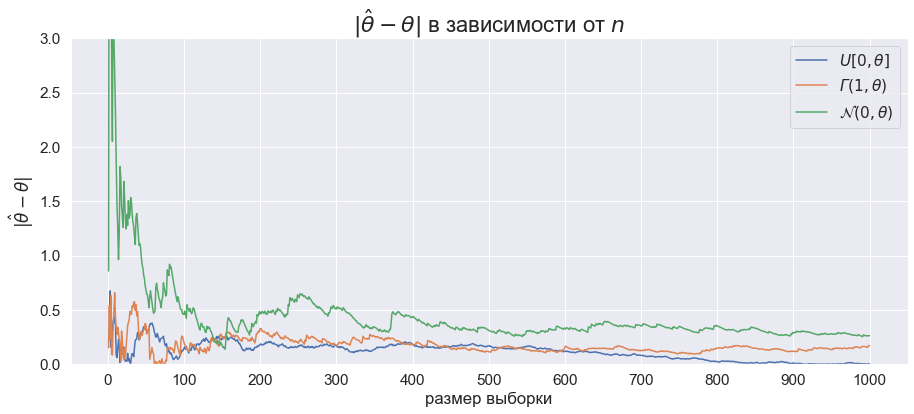

In [28]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=sequence, y=np.abs(uni_theta_hat - theta), label='$U[0, \\theta]$')
sns.lineplot(x=sequence, y=np.abs(gamma_theta_hat - theta), label='$Г(1, \\theta)$')
sns.lineplot(x=sequence, y=np.abs(norm_theta_hat - theta), label='$\\mathcal{N}(0, \\theta)$')
plt.ylim(0, 3)
plt.xticks(np.arange(0, 1001, 100))
plt.xlabel('размер выборки')
plt.ylabel('$|\\hat\\theta-\\theta|$')
plt.title('$|\\hat\\theta-\\theta|$ в зависимости от $n$', fontsize=22)
plt.show()

__Вывод:__ мы получили три сильно состоятельные, асимтотически-нормальные и состоятельные оценки. Все они сходятся со скоростью $\frac{1}{\sqrt{n}}$. Поэтому из графика даже видно, что модуль разности в итоге стремится к нулю.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [16]:
bootstrap_size = [10, 50, *list(range(100, 1001, 100))]
theta_variances = []
theta_means = []

for K in bootstrap_size:
    subsample = norm_sample[:K]
    random_indices = sps.randint.rvs(low=0, high=subsample.size, size=(K, K))
    bts_sample = subsample[random_indices]
    theta_hat = np.mean(np.square(bts_sample), axis=1)
    theta_mean = np.mean(theta_hat)
    theta_means.append(theta_mean)
    theta_variances.append(np.mean(np.square(theta_hat)) - np.square(theta_mean))

theta_means = np.array(theta_means)
theta_variances = np.array(theta_variances)

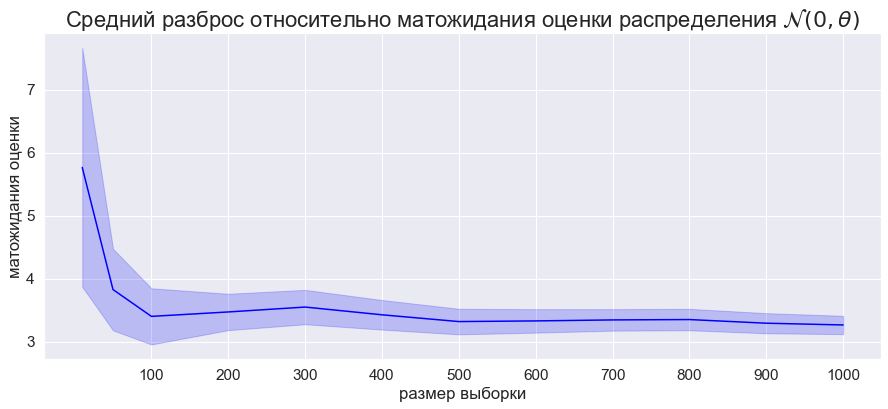

In [17]:
std_deviation = np.sqrt(theta_variances)

plt.figure(figsize=(15, 6))
sns.lineplot(x=bootstrap_size, y=theta_means, color='blue')
plt.fill_between(x=bootstrap_size, 
                 y1=theta_means - std_deviation, 
                 y2=theta_means + std_deviation, 
                 alpha=0.2, 
                 color='blue')
plt.xticks(np.arange(100, 1001, 100))
plt.ylabel("матожидания оценки")
plt.xlabel("размер выборки")
plt.title("Средний разброс относительно матожидания оценки распределения $\\mathcal{N}(0, \\theta)$", fontsize=22)
plt.show()

In [18]:
theta_variances = []
theta_means = []

for K in bootstrap_size:
    subsample = uni_sample[:K]
    random_indices = sps.randint.rvs(low=0, high=subsample.size, size=(K, K))
    bts_sample = subsample[random_indices]
    theta_hat = 2 * np.mean((bts_sample), axis=1)
    theta_mean = np.mean(theta_hat)
    theta_means.append(theta_mean)
    theta_variances.append(np.mean(np.square(theta_hat)) - np.square(theta_mean))

theta_means = np.array(theta_means)
theta_variances = np.array(theta_variances)

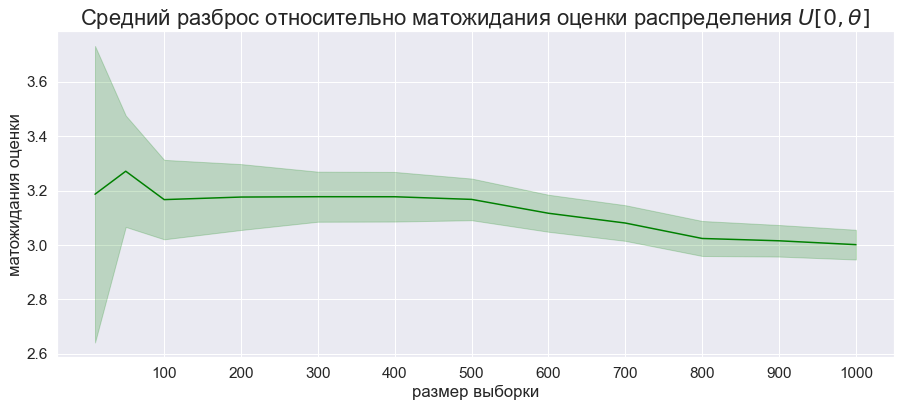

In [19]:
std_deviation = np.sqrt(theta_variances)

plt.figure(figsize=(15, 6))
sns.lineplot(x=bootstrap_size, y=theta_means, color='green')
plt.fill_between(x=bootstrap_size, 
                 y1=theta_means - std_deviation, 
                 y2=theta_means + std_deviation, 
                 alpha=0.2, 
                 color='green')
plt.xticks(np.arange(100, 1001, 100))
plt.ylabel("матожидания оценки")
plt.xlabel("размер выборки")
plt.title("Средний разброс относительно матожидания оценки распределения $U[0,\\theta]$", fontsize=22)
plt.show()

In [20]:
theta_variances = []
theta_means = []

for K in bootstrap_size:
    subsample = gamma_sample[:K]
    random_indices = sps.randint.rvs(low=0, high=subsample.size, size=(K, K))
    bts_sample = subsample[random_indices]
    theta_hat = np.mean(bts_sample, axis=1)
    theta_mean = np.mean(theta_hat)
    theta_means.append(theta_mean)
    theta_variances.append(np.mean(np.square(theta_hat)) - np.square(theta_mean))

theta_means = np.array(theta_means)
theta_variances = np.array(theta_variances)

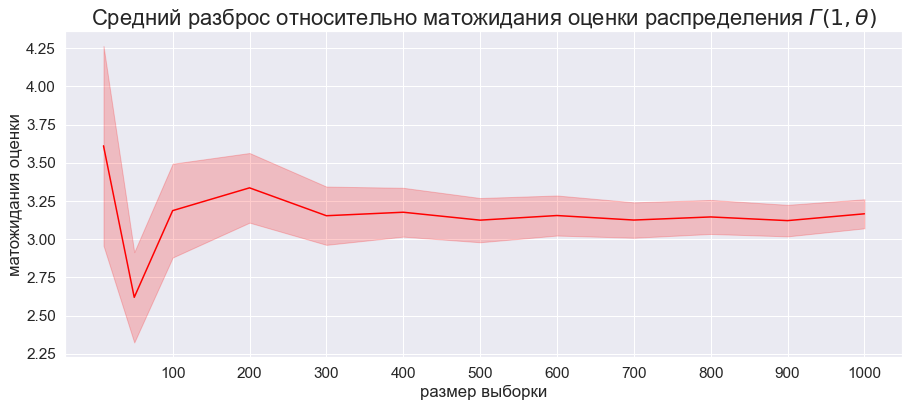

In [21]:
std_deviation = np.sqrt(theta_variances)

plt.figure(figsize=(15, 6))
sns.lineplot(x=bootstrap_size, y=theta_means, color='red')
plt.fill_between(x=bootstrap_size, 
                 y1=theta_means - std_deviation, 
                 y2=theta_means + std_deviation, 
                 alpha=0.2, 
                 color='red')
plt.xticks(np.arange(100, 1001, 100))
plt.ylabel("матожидания оценки")
plt.xlabel("размер выборки")
plt.title("Средний разброс относительно матожидания оценки распределения $Г(1,\\theta)$", fontsize=22)
plt.show()

__Вывод:__ можно увидеть, что с увеличением размера бустрепных выборок, $\hat\theta$ - средняя их оценок становится все ближе к реальному значеннию параметра, т.е. $\theta \in {\hat\theta \pm \sigma(\theta)}$, а закрашеная область все сужается, что означает, что отклонение в итоге стремится к нулю, т.е. оценка не сильно разлетается как и должно было получиться.